In [1]:
import pandas as pd
import numpy as np
import os  
print("文件列表：",os.listdir("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/3-teston-fuscc"))
data = pd.ExcelFile("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/3-teston-fuscc/Eembeded_FS/EmbededFS-results.xlsx")
sheet_names = data.sheet_names
print("列表名：",sheet_names )

文件列表： ['Embeded_FS', 'fs_pre_1921', 'split']
列表名： ['LR', 'SVM', 'KNN', 'NB', 'RF', 'STACK', 'RFFI']


In [2]:
# data = pd.read_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/test_label.csv")
# y = data.label
# print(y)
# data = data.drop(columns=['id','label'])

# scaler = StandardScaler()#因此选用StandardScaler进行归一化
# scaler.fit(data.values)


# X = pd.DataFrame(data = scaler.transform(data.values), columns=data.columns)
# X['label']=y



# outputpath = "C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/testZscore.csv"
# X.to_csv(outputpath,sep=',',index=False,header=True) 
# # df1是你想要输出的的DataFrame
# # index是否要索引，header是否要列名，True就是需要
# X.head()

In [3]:
# data = pd.read_excel("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group1/RFE.xlsx", sheet_name='g1rfegb12')
name = 'RF'
data = pd.read_excel("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/3-teston-fuscc/Embeded_FS/EmbededFS-results.xlsx", sheet_name=name)

data.keys()
train = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/3-teston-fuscc/split/Train-FS-ZSCORE-MI.csv")
test = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/3-teston-fuscc/split/InternalTest-FS-ZSCORE-MI.csv")
test1 = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/3-teston-fuscc/split/ExternalTest-FS-ZSCORE-MI.csv")
train=train[data.keys()]
train.shape
test=test[data.keys()]
test.shape
test1=test1[data.keys()]
test1.shape

train.to_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/3-teston-fuscc/split/Train-FS-ZSCORE-MI-RF.csv",index=None)
# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/trainZscore-RFERF5.csv",index=None)
# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/trainZscore-RFERF11.csv",index=None)


# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/testZscore-RFERF19.csv",index=None)
# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/testZscore-RFERF5.csv",index=None)
test.to_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/3-teston-fuscc/split/InternalTest-FS-ZSCORE-MI-RF.csv",index=None)


# test1.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/test1Zscore-RFERF19.csv",index=None)
# test1.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/test1Zscore-RFERF5.csv",index=None)
test1.to_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/3-teston-fuscc/split/ExternalTest-FS-ZSCORE-MI-RF.csv",index=None)



In [4]:
train.shape

(83, 20)

In [5]:
test.shape

(21, 20)

In [6]:
#%% load liabrary
import os
import numpy as np
import xlrd
import scipy.io as io
import pandas as pd
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn import svm
from sklearn.model_selection import cross_val_score,ShuffleSplit, train_test_split
from sklearn.linear_model import Lasso, Ridge, LassoCV,LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn import metrics
import itertools
import joblib
from scipy import stats
from sklearn import preprocessing
print("Import library done.\n")

Import library done.



In [7]:
# data = pd.read_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/test_label.csv")
# y = data.label
# print(y)
# data = data.drop(columns=['id','label'])

# scaler = StandardScaler()#因此选用StandardScaler进行归一化
# scaler.fit(data.values)


# X = pd.DataFrame(data = scaler.transform(data.values), columns=data.columns)
# X['label']=y



# outputpath = "C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/testZscore.csv"
# X.to_csv(outputpath,sep=',',index=False,header=True) 
# # df1是你想要输出的的DataFrame
# # index是否要索引，header是否要列名，True就是需要
# X.head()

In [8]:
# DIABETES PREDICTION MODEL

# CLASSIFICATION MODELS - HOLDOUT

'''
Steps to follow:
    - Load the saved dataset
    - General View
    - Modeling
        - Base models: LogisticRegression, GaussianNB, KNeighborsClassifier, SVC, MLPClassifier, DecisionTreeClassifier,
                       BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,
                       XGBClassifier, LGBMClassifier, CatBoostClassifier, NGBClassifier
    - Model Evaluation
    - Model Tuning
    - Model Results
'''

# Import dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)


# Load the preprocessed dataset
# diabetes_preprocessed = pd.read_csv('./diabetes_prepared.csv')

# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/trainZscore-RFERF17-1.csv",index=None)
# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/trainZscore-RFEGB8.csv",index=None)
# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/trainZscore-RFERF17-42.csv",index=None)

# diabetes_preprocessed = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group1/new-auc/train_rferf17.csv")
# diabetes_preprocessed = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group1/new-auc/train_rfegb5.csv")
pathdata="C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/3-teston-fuscc/split/Train-FS-ZSCORE-MI-RF.csv"
diabetes_preprocessed = pd.read_csv(pathdata)




# diabetes_preprocessed = pd.read_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/Results_HRFS01/catboost/train.csv")
df = diabetes_preprocessed.copy()
# df = df.drop(columns="id",axis=1)

## GENERAL VIEW

df.head()
df.shape
df.info()
df.columns
df.index
df.describe([0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 20 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   CT_wavelet2-LHL_glcm_ClusterShade                     83 non-null     float64
 1   CT_wavelet2-HHL_firstorder_Median                     83 non-null     float64
 2   CT_wavelet-LHH_glszm_SizeZoneNonUniformityNormalized  83 non-null     float64
 3   CT_wavelet-HLH_firstorder_Median                      83 non-null     float64
 4   CT_wavelet-HHH_gldm_DependenceEntropy                 83 non-null     float64
 5   PET_original_firstorder_10Percentile                  83 non-null     float64
 6   CT_wavelet2-LHH_firstorder_Skewness                   83 non-null     float64
 7   CT_wavelet2-LLL_firstorder_InterquartileRange         83 non-null     float64
 8   CT_lbp-3D-k_firstorder_90Percentile                   83 non-n

count   mean   std    min  \
CT_wavelet2-LHL_glcm_ClusterShade                  83.000 -0.000 1.006 -5.984   
CT_wavelet2-HHL_firstorder_Median                  83.000  0.000 1.006 -3.027   
CT_wavelet-LHH_glszm_SizeZoneNonUniformityNorma... 83.000 -0.000 1.006 -2.115   
CT_wavelet-HLH_firstorder_Median                   83.000 -0.000 1.006 -4.894   
CT_wavelet-HHH_gldm_DependenceEntropy              83.000 -0.000 1.006 -2.384   
PET_original_firstorder_10Percentile               83.000  0.000 1.006 -1.506   
CT_wavelet2-LHH_firstorder_Skewness                83.000 -0.000 1.006 -3.172   
CT_wavelet2-LLL_firstorder_InterquartileRange      83.000 -0.000 1.006 -1.906   
CT_lbp-3D-k_firstorder_90Percentile                83.000  0.000 1.006 -1.778   
CT_wavelet2-HHH_firstorder_Median                  83.000 -0.000 1.006 -3.271   
CT_wavelet2-HLL_firstorder_Skewness                83.000 -0.000 1.006 -3.183   
CT_lbp-3D-k_firstorder_Kurtosis                    83.000 -0.000 1.006 -1.750   
CT_wavelet-LHH_glcm_ClusterShade                   83.000 -0.000 1.006 -2.702   
CT_wavelet2-LHL_firstorder_Mean                    83.000 -0.000 1.006 -5.330   
CT_wavelet-LHH_firstorder_Mean                     83.000 -0.000 1.006 -3.108   
CT_wavelet-HLH_firstorder_Skewness                 83.000 -0.000 1.006 -4.296   
CT_wavelet-HLL_glcm_ClusterShade                   83.000 -0.000 1.006 -3.058   
CT_wavelet2-HHL_firstorder_Mean                    83.000 -0.000 1.006 -2.577   
CT_wavelet2-HLH_firstorder_Skewness                83.000  0.000 1.006 -2.648   
label                                              83.000  0.494 0.503  0.000   

                                                      10%    25%    50%   75%  \
CT_wavelet2-LHL_glcm_ClusterShade                  -0.598 -0.230  0.045 0.231   
CT_wavelet2-HHL_firstorder_Median                  -0.735 -0.338 -0.117 0.119   
CT_wavelet-LHH_glszm_SizeZoneNonUniformityNorma... -1.284 -0.843  0.176 0.794   
CT_wavelet-HLH_firstorder_Median                   -0.561 -0.168  0.004 0.264   
CT_wavelet-HHH_gldm_DependenceEntropy              -1.201 -0.689  0.175 0.572   
PET_original_firstorder_10Percentile               -1.083 -0.626 -0.148 0.424   
CT_wavelet2-LHH_firstorder_Skewness                -0.994 -0.330  0.110 0.473   
CT_wavelet2-LLL_firstorder_InterquartileRange      -1.470 -0.678 -0.001 0.736   
CT_lbp-3D-k_firstorder_90Percentile                -1.180 -0.598 -0.154 0.348   
CT_wavelet2-HHH_firstorder_Median                  -0.709 -0.310 -0.075 0.157   
CT_wavelet2-HLL_firstorder_Skewness                -1.033 -0.392  0.079 0.438   
CT_lbp-3D-k_firstorder_Kurtosis                    -0.808 -0.608 -0.314 0.448   
CT_wavelet-LHH_glcm_ClusterShade                   -0.648 -0.057  0.070 0.140   
CT_wavelet2-LHL_firstorder_Mean                    -0.636 -0.340 -0.039 0.217   
CT_wavelet-LHH_firstorder_Mean                     -1.109 -0.325  0.004 0.249   
CT_wavelet-HLH_firstorder_Skewness                 -0.815 -0.170  0.142 0.479   
CT_wavelet-HLL_glcm_ClusterShade                   -1.287 -0.320  0.096 0.413   
CT_wavelet2-HHL_firstorder_Mean                    -0.984 -0.370 -0.100 0.220   
CT_wavelet2-HLH_firstorder_Skewness                -0.959 -0.471 -0.047 0.337   
label                                               0.000  0.000  0.000 1.000   

                                                     90%   95%   99%   max  
CT_wavelet2-LHL_glcm_ClusterShade                  0.511 0.849 2.802 4.795  
CT_wavelet2-HHL_firstorder_Median                  0.755 2.238 3.352 4.831  
CT_wavelet-LHH_glszm_SizeZoneNonUniformityNorma... 1.120 1.451 1.924 2.023  
CT_wavelet-HLH_firstorder_Median                   0.829 1.398 2.520 3.180  
CT_wavelet-HHH_gldm_DependenceEntropy              1.175 1.718 2.083 2.755  
PET_original_firstorder_10Percentile               1.239 2.036 2.970 3.678  
CT_wavelet2-LHH_firstorder_Skewness                1.088 1.222 2.627 2.737  
CT_wavelet2-LLL_firstorder_Inter

In [9]:
# Check for missing values
df.isnull().values.any()
df.isnull().sum().sort_values(ascending=False)


CT_wavelet2-LHL_glcm_ClusterShade                       0
CT_wavelet2-HHL_firstorder_Median                       0
CT_wavelet2-HLH_firstorder_Skewness                     0
CT_wavelet2-HHL_firstorder_Mean                         0
CT_wavelet-HLL_glcm_ClusterShade                        0
CT_wavelet-HLH_firstorder_Skewness                      0
CT_wavelet-LHH_firstorder_Mean                          0
CT_wavelet2-LHL_firstorder_Mean                         0
CT_wavelet-LHH_glcm_ClusterShade                        0
CT_lbp-3D-k_firstorder_Kurtosis                         0
CT_wavelet2-HLL_firstorder_Skewness                     0
CT_wavelet2-HHH_firstorder_Median                       0
CT_lbp-3D-k_firstorder_90Percentile                     0
CT_wavelet2-LLL_firstorder_InterquartileRange           0
CT_wavelet2-LHH_firstorder_Skewness                     0
PET_original_firstorder_10Percentile                    0
CT_wavelet-HHH_gldm_DependenceEntropy                   0
CT_wavelet-HLH

In [10]:

# pathdata="C:/Users/zuoya/Desktop/EJR/2023-383CASES-01-CLINICS.csv"
# diabetes_preprocessed = pd.read_csv(pathdata)




# # diabetes_preprocessed = pd.read_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/Results_HRFS01/catboost/train.csv")
# df = diabetes_preprocessed.copy()

In [11]:
X_train = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/3-teston-fuscc/split/Train-FS-ZSCORE-MI-RF.csv")
y_train = X_train['label']
X_train = X_train.drop(labels=['label'], axis=1)

X_test = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/3-teston-fuscc/split/InternalTest-FS-ZSCORE-MI-RF.csv")
y_test = X_test['label']
X_test = X_test.drop(labels=['label'], axis=1)

In [12]:
# # MODELING


# # Define dependent and independent variables
# y = df["label"]
# X = df.drop(["label"], axis=1)

# # y = df["Outcome"]
# # X = df.drop(["Outcome"], axis=1)

# # Split the dataset into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=520)

In [13]:
# X_train.to_csv("C:/Users/zuoya/Desktop/EJR/xtrain-2023-383CASES-01-CLINICS.csv")

In [14]:
# X_test.to_csv("C:/Users/zuoya/Desktop/EJR/xtest-2023-383CASES-01-CLINICS.csv")

In [15]:
# y_train.to_csv("C:/Users/zuoya/Desktop/EJR/ytrain-2023-383CASES-01-CLINICS.csv")

In [16]:
# y_test.to_csv("C:/Users/zuoya/Desktop/EJR/ytest-2023-383CASES-01-CLINICS.csv")

In [17]:
# Evaluate each model in turn by looking at train and test errors and scores
from sklearn.metrics import roc_auc_score
def evaluate_classification_model_holdout(models):
    # # Split the dataset into train and test sets
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123456)

    # Define lists to track names and results for models
    names = []
    train_accuracy_results = []
    test_accuracy_results = []

    print('################ Accuracy scores for test set for the models: ################\n')
    for name, model in models:
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

#         train_accuracy_result = accuracy_score(y_train, y_train_pred)
#         test_accuracy_result = accuracy_score(y_test, y_test_pred)
#         train_accuracy_results.append(train_accuracy_result)
#         test_accuracy_results.append(test_accuracy_result)
        train_accuracy_result = roc_auc_score(y_train, y_train_pred)
        test_accuracy_result = roc_auc_score(y_test, y_test_pred)
        train_accuracy_results.append(train_accuracy_result)
        test_accuracy_results.append(test_accuracy_result)

        names.append(name)
        msg = "%s: %f" % (name, test_accuracy_result)
        print(msg)

    print('\n################ Train and test results for the model: ################\n')
    data_result = pd.DataFrame({'models': names,
                                'accuracy_train': train_accuracy_results,
                                'accuracy_test': test_accuracy_results})
    print(data_result)

    # Plot the results
    plt.figure(figsize=(15, 12))
    sns.barplot(x='accuracy_test', y='models', data=data_result.sort_values(by="accuracy_test", ascending=False), color="r")
    plt.xlabel('AUC Scores')
    plt.ylabel('Models')
    plt.title('AUC Scores For Test Set')
    plt.show()

In [18]:
# Define a function to plot feature_importances
def plot_feature_importances(tuned_model):
    feature_importances = pd.DataFrame({'Importance': tuned_model.feature_importances_ * 100, 'Feature': X_train.columns})
    plt.figure()
    sns.barplot(x="Importance", y="Feature", data=feature_importances.sort_values(by="Importance", ascending=False))
    plt.title('Feature Importance') # TODO tuned_model.__name__
    plt.show()


In [19]:
# Function to plot confusion_matrix
def plot_confusion_matrix(model, X_test, y_test, normalize=True):
    plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues, normalize=normalize)
    plt.figure(figsize=(15, 15))
    plt.show()

In [20]:
# Function to plot confusion_matrix
def plot_confusion_matrix_yb(model):
    # # Split the dataset into train and test sets
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123456)
    model_cm = ConfusionMatrix(model, percent=True, class_names = ["EGFR E19", "EGFR E21"], cmap='Blues')
    model_cm.fit(X_train, y_train)
    model_cm.score(X_test, y_test)
    model_cm.show();

In [21]:
# Function to plot classification_report by using yellowbrick
def plot_classification_report_yb(model):
    # # Split the dataset into train and test sets
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123456)
    visualizer = ClassificationReport(model, classes=["EGFR Wild", "EGFR Mutated"], support=True, cmap='Blues')
    visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
    visualizer.score(X_test, y_test)  # Evaluate the model on the test data
    visualizer.poof()
    # visualizer.show();

In [22]:
# Funtion to plot ROC-AUC Curve
def plot_roc_auc_curve(model):
    model_roc_auc = roc_auc_score(y_test, model.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    plt.figure()
    plt.plot(fpr, tpr, label='AUC (area = %0.4f)' % model_roc_auc)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(model,' Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [23]:
# Funtion to plot ROC-AUC Curve by using yellowbrick
def plot_roc_auc_curve_yb(model):
    # # Split the dataset into train and test sets
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123456)
    visualizer = ROCAUC(model,class_names = ["EGFR E19", "EGFR E21"])
    visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
    visualizer.score(X_test, y_test)  # Evaluate the model on the test data
    visualizer.show();  # Finalize and show the figure

In [24]:
# Function to plot prediction errors
def plot_class_prediction_error_yb(model):
    # # Split the dataset into train and test sets
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123456)
    # Instantiate the classification model and visualizer
    visualizer = ClassPredictionError(model, class_names = ["EGFR E19", "EGFR E21"], cmap='Blues')
    # Fit the training data to the visualizer
    visualizer.fit(X_train, y_train)
    # Evaluate the model on the test data
    visualizer.score(X_test, y_test)
    # Draw visualization
    visualizer.show();

In [25]:
# Function to plot learning curves
def plot_learning_curve(model_tuned):
    # Create the learning curve visualizer
    cv = StratifiedKFold(n_splits=12)
    sizes = np.linspace(0.3, 1.0, 10)
    # Instantiate the classification model and visualizer
    visualizer = LearningCurve(model_tuned, cv=cv, scoring='accuracy', train_sizes=sizes, n_jobs=4)
    visualizer.fit(X, y)  # Fit the data to the visualizer
    visualizer.show()  # Finalize and render the figure

In [26]:
# Function to report results quickly
def report_results_quickly(model):
    fig, axes = plt.subplots(2, 2,figsize=(15, 9))
    model = model
    visualgrid = [FeatureImportances(model, ax=axes[0][0]),
                  ConfusionMatrix(model, ax=axes[0][1], cmap='Blues'),
                  ClassificationReport(model, ax=axes[1][0], cmap='Blues'),
                  ROCAUC(model, ax=axes[1][1])]
    for viz in visualgrid:
        viz.fit(X_train, y_train)
        viz.score(X_test, y_test)
        viz.finalize()
    plt.show()

In [27]:
# Function to plot all the results
def plot_results(model):
    plot_confusion_matrix_yb(model)
    plot_classification_report_yb(model)
    plot_roc_auc_curve_yb(model)
    plot_class_prediction_error_yb(model)


In [28]:
def Save_to_Csv(data, file_name, Save_format = 'csv', Save_type = 'col'):
    # data
    # 输入为一个字典，格式： { '列名称': 数据,....} 
    # 列名即为CSV中数据对应的列名， 数据为一个列表
    
    # file_name 存储文件的名字
    # Save_format 为存储类型， 默认csv格式， 可改为 excel
    # Save_type 存储类型 默认按列存储， 否则按行存储
    
    # 默认存储在当前路径下
    
    import pandas as pd
    import numpy as np
    
    Name = []
    times = 0
 
    if Save_type == 'col':
        for name, List in data.items():
            Name.append(name)
            if times == 0:
                Data = np.array(List).reshape(-1,1)
            else:
                Data = np.hstack((Data, np.array(List).reshape(-1,1)))
                
            times += 1
            
        Pd_data = pd.DataFrame(columns=Name, data=Data) 
        
    else:
        for name, List in data.items():
            Name.append(name)
            if times == 0:
                Data = np.array(List)
            else:
                Data = np.vstack((Data, np.array(List)))
        
            times += 1
    
        Pd_data = pd.DataFrame(index=Name, data=Data)  
    
    if Save_format == 'csv':
        Pd_data.to_csv('./'+ file_name +'.csv',encoding='utf-8')
    else:
        Pd_data.to_excel('./'+ file_name +'.xls',encoding='utf-8')

In [29]:
# # MODELING


# # Define dependent and independent variables
# y = df["label"]
# X = df.drop(["label"], axis=1)

# # y = df["Outcome"]
# # X = df.drop(["Outcome"], axis=1)

# # Split the dataset into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=520)

In [30]:
# See the results for base models

base_models = [('LogisticRegression', LogisticRegression()),
               ('Naive Bayes', GaussianNB()),
               ('KNN', KNeighborsClassifier()),
               ('SVM', SVC()),
               ('ANN', MLPClassifier()),
               ('CART', DecisionTreeClassifier()),
               ('BaggedTrees', BaggingClassifier()),
               ('RF', RandomForestClassifier()),
               ('AdaBoost', AdaBoostClassifier()),
               ('GBM', GradientBoostingClassifier()),
               ("XGBoost", XGBClassifier()),
               ("LightGBM", LGBMClassifier()),
               ("CatBoost", CatBoostClassifier(verbose=False)),
               ("NGBoost", NGBClassifier(verbose=False))]

################ Accuracy scores for test set for the models: ################

LogisticRegression: 0.572727
Naive Bayes: 0.568182
KNN: 0.468182
SVM: 0.522727
ANN: 0.522727
CART: 0.622727
BaggedTrees: 0.436364
RF: 0.568182
AdaBoost: 0.472727
GBM: 0.663636
XGBoost: 0.522727
[LightGBM] [Info] Number of positive: 41, number of negative: 42
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000071 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 558
[LightGBM] [Info] Number of data points in the train set: 83, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.493976 -> initscore=-0.024098
[LightGBM] [Info] Start training from score -0.024098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warni

CatBoost: 0.663636
NGBoost: 0.663636

################ Train and test results for the model: ################

                models  accuracy_train  accuracy_test
0   LogisticRegression           0.662          0.573
1          Naive Bayes           0.623          0.568
2                  KNN           0.664          0.468
3                  SVM           0.832          0.523
4                  ANN           1.000          0.523
5                 CART           1.000          0.623
6          BaggedTrees           0.952          0.436
7                   RF           1.000          0.568
8             AdaBoost           1.000          0.473
9                  GBM           1.000          0.664
10             XGBoost           1.000          0.523
11            LightGBM           0.988          0.568
12            CatBoost           1.000          0.664
13             NGBoost           0.988          0.664


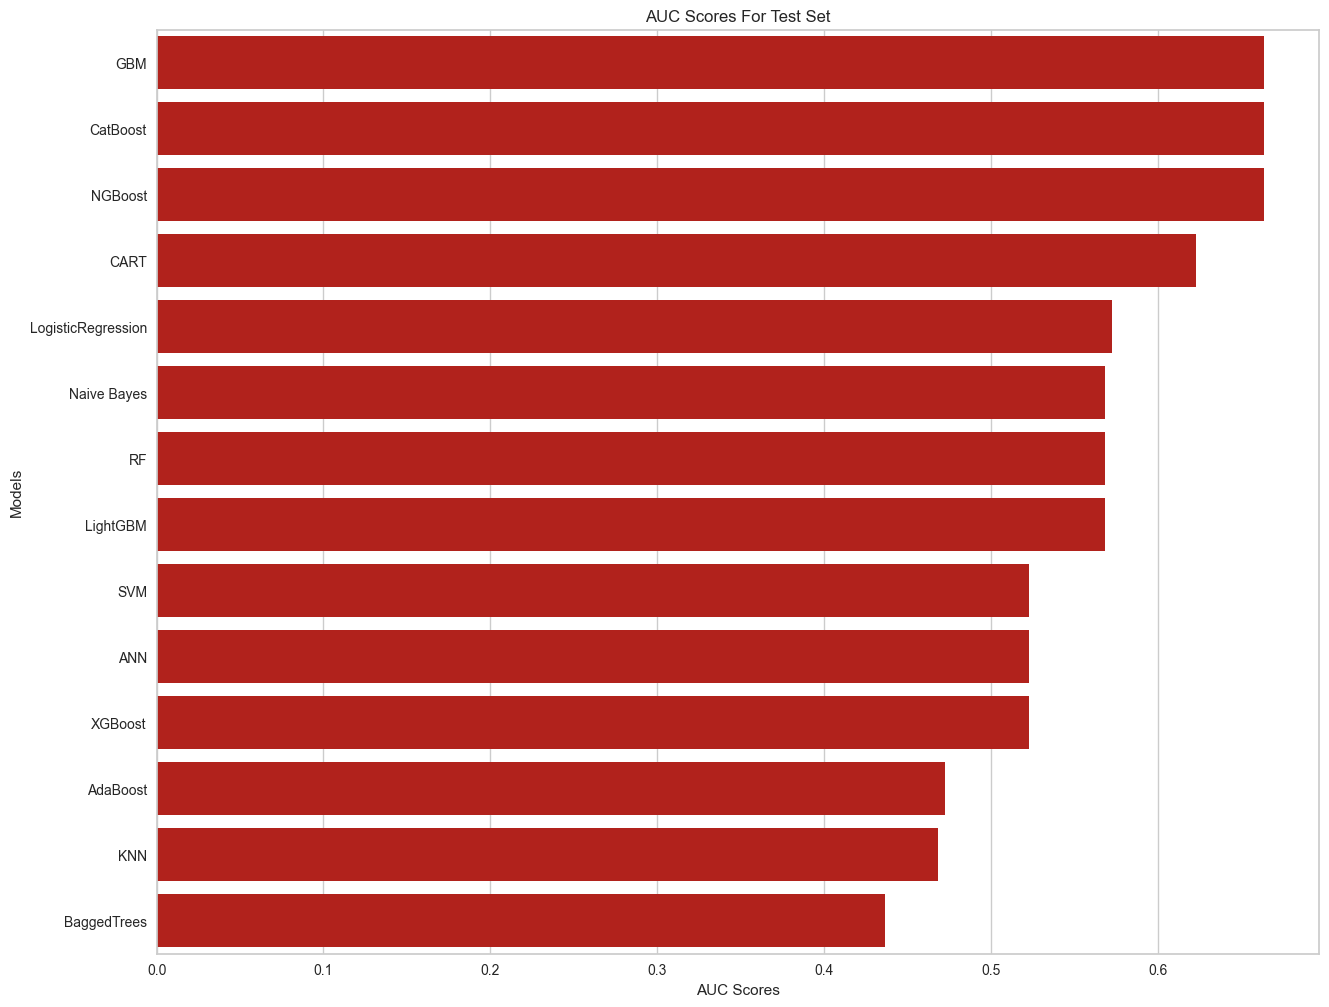

In [31]:
evaluate_classification_model_holdout(base_models)

################ Accuracy scores for test set for the models: ################

LogisticRegression: 0.572727
Naive Bayes: 0.568182
KNN: 0.468182
SVM: 0.522727
ANN: 0.568182
CART: 0.572727
BaggedTrees: 0.418182
RF: 0.713636
AdaBoost: 0.472727
GBM: 0.663636
XGBoost: 0.522727
[LightGBM] [Info] Number of positive: 41, number of negative: 42
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000044 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 558
[LightGBM] [Info] Number of data points in the train set: 83, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.493976 -> initscore=-0.024098
[LightGBM] [Info] Start training from score -0.024098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warni

CatBoost: 0.663636
NGBoost: 0.663636

################ Train and test results for the model: ################

                models  accuracy_train  accuracy_test
0   LogisticRegression           0.662          0.573
1          Naive Bayes           0.623          0.568
2                  KNN           0.664          0.468
3                  SVM           0.832          0.523
4                  ANN           0.976          0.568
5                 CART           1.000          0.573
6          BaggedTrees           1.000          0.418
7                   RF           1.000          0.714
8             AdaBoost           1.000          0.473
9                  GBM           1.000          0.664
10             XGBoost           1.000          0.523
11            LightGBM           0.988          0.568
12            CatBoost           1.000          0.664
13             NGBoost           0.988          0.664


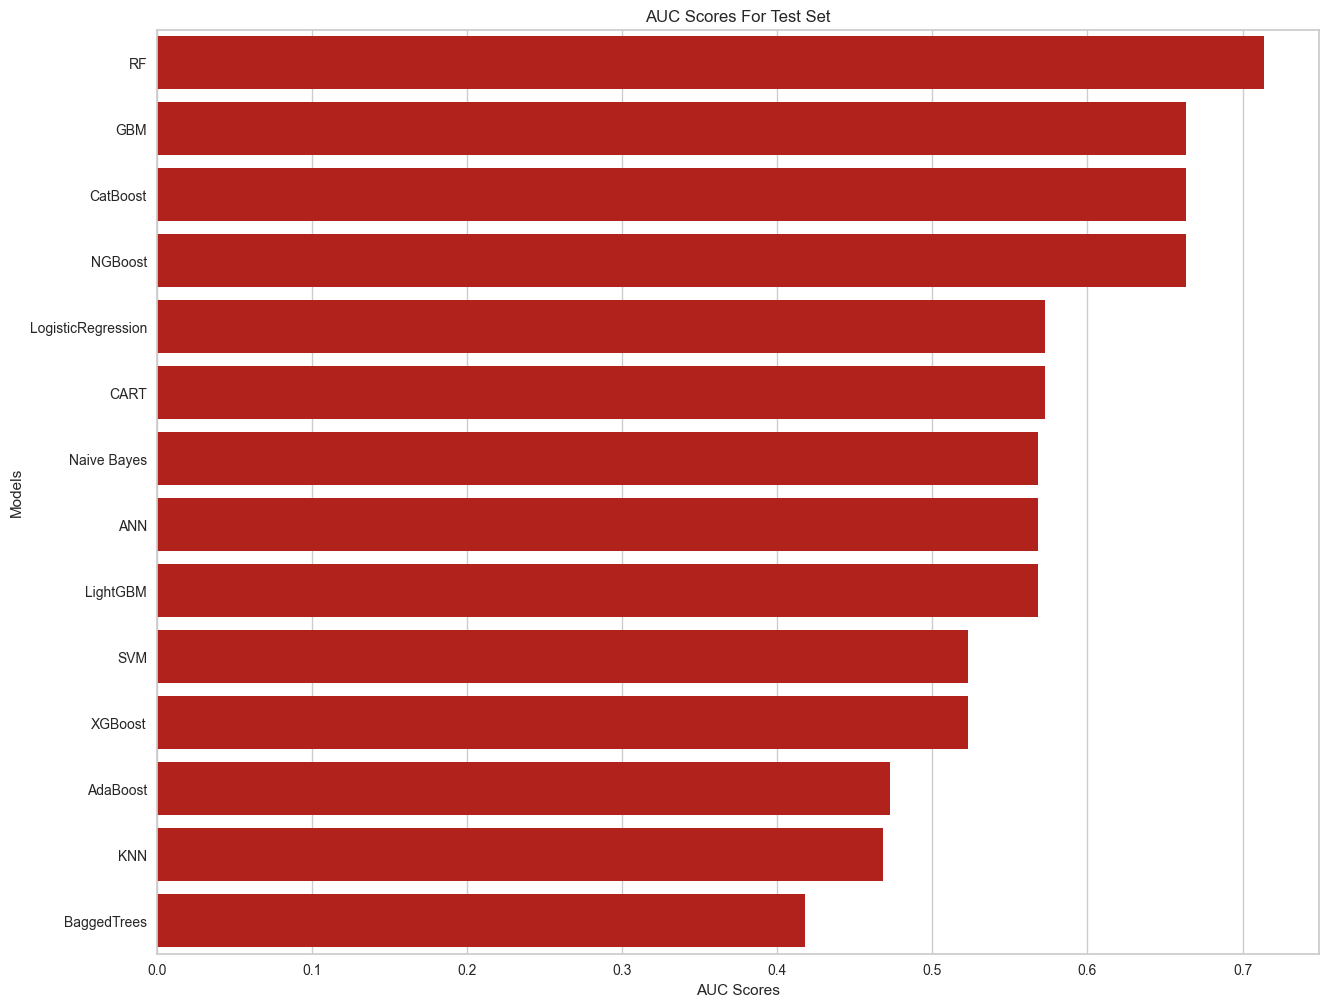

In [32]:
evaluate_classification_model_holdout(base_models)
# LogisticRegression: 0.618243
# Naive Bayes: 0.563707
# KNN: 0.605212
# SVM: 0.563707
# ANN: 0.569015
# CART: 0.542954
# BaggedTrees: 0.663127
# RF: 0.698842
# AdaBoost: 0.645270
# GBM: 0.708012
# XGBoost: 0.685811
# LightGBM: 0.663127
# CatBoost: 0.658301
# NGBoost: 0.662645   422


In [33]:
# For some distance-based models, we need to scale the features in order to
# increase the speed and the performance/accuracy level of the model.
# We can also see the effect of scaling type by changing the sclaer function.
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

################ Accuracy scores for test set for the models: ################

GaussianNB: 0.568182

################ Train and test results for the model: ################

       models  accuracy_train  accuracy_test
0  GaussianNB           0.623          0.568


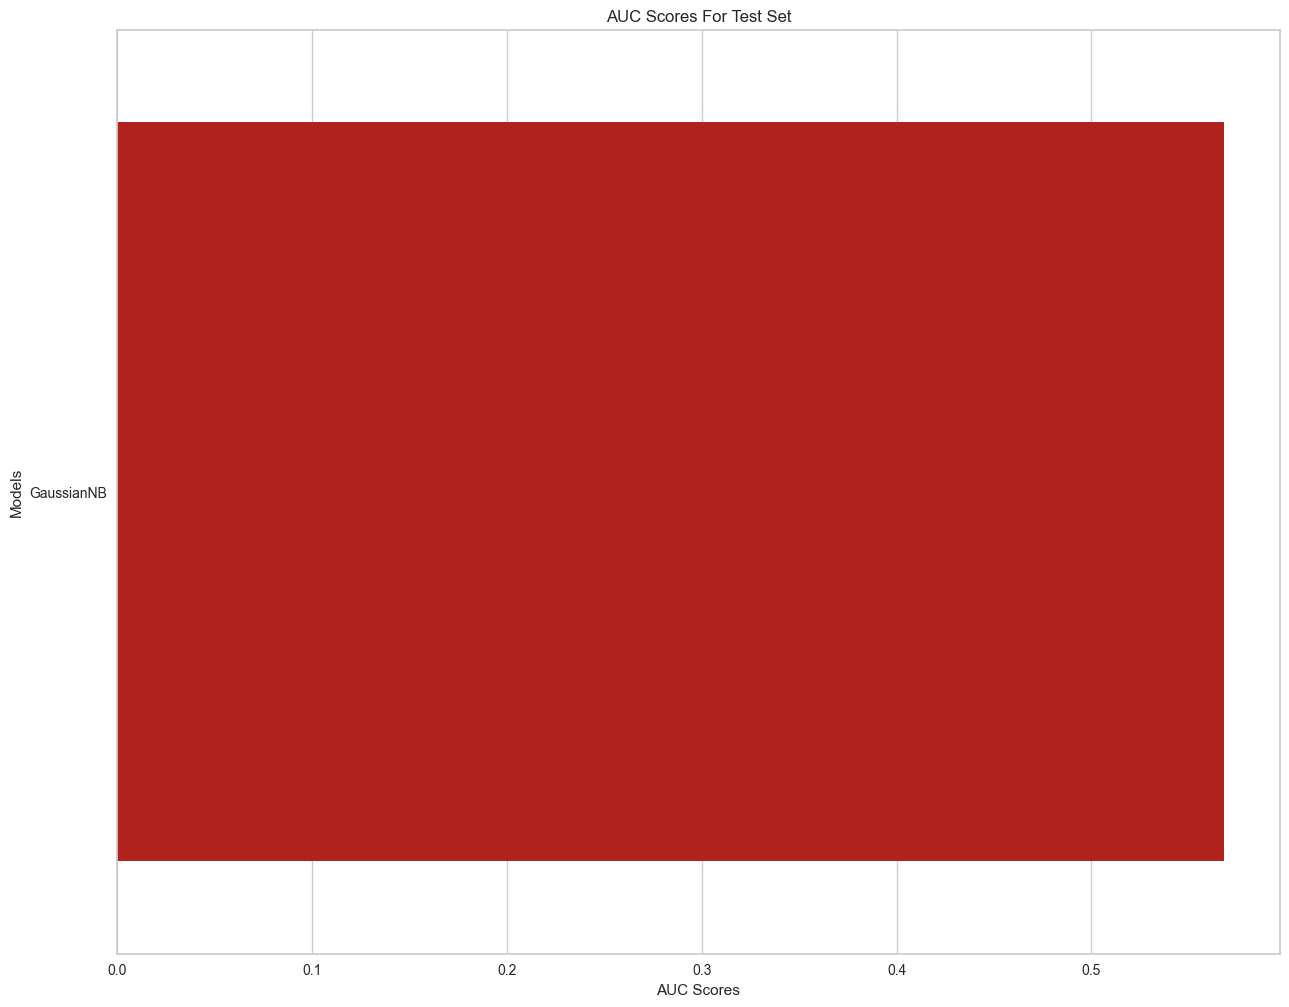

In [34]:
# LogisticRegression with make_pipeline
GNBreg = make_pipeline(MinMaxScaler(), GaussianNB())
evaluate_classification_model_holdout([('GaussianNB', GNBreg)]) # 0.805 instead of  0.805195

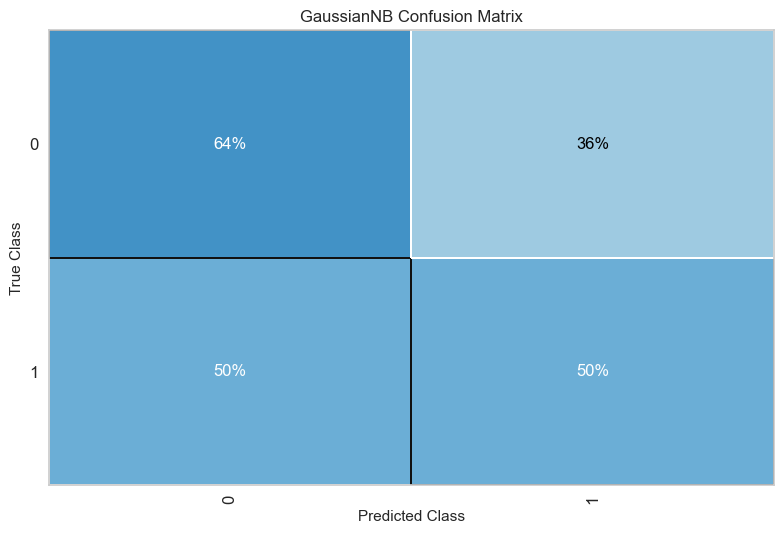

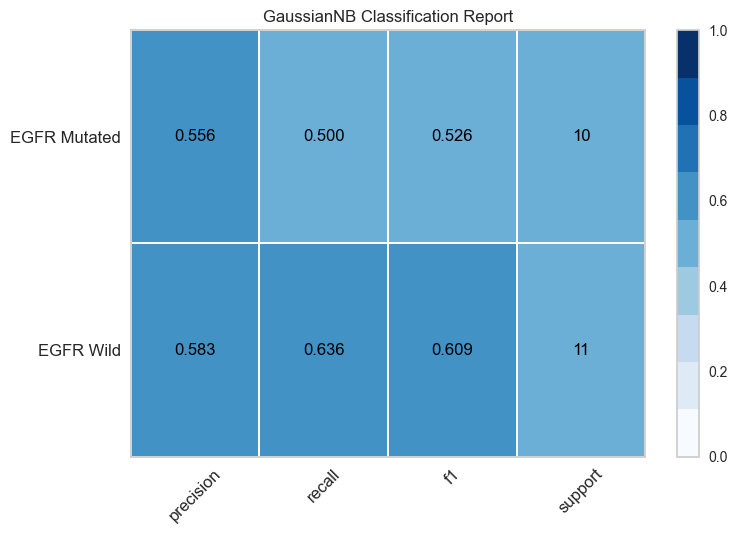

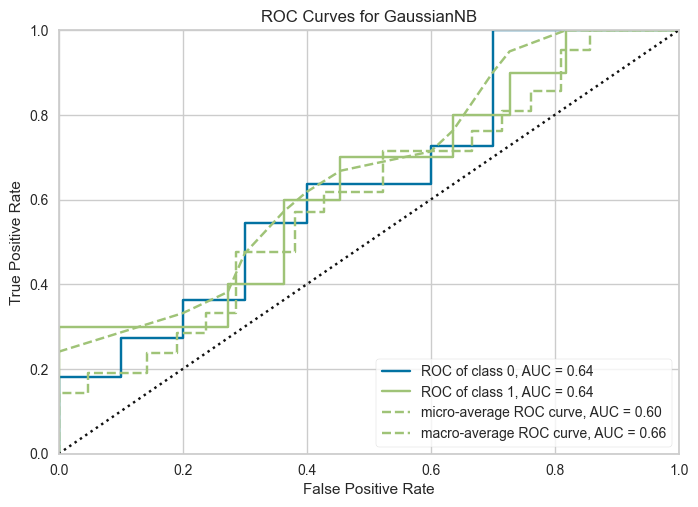

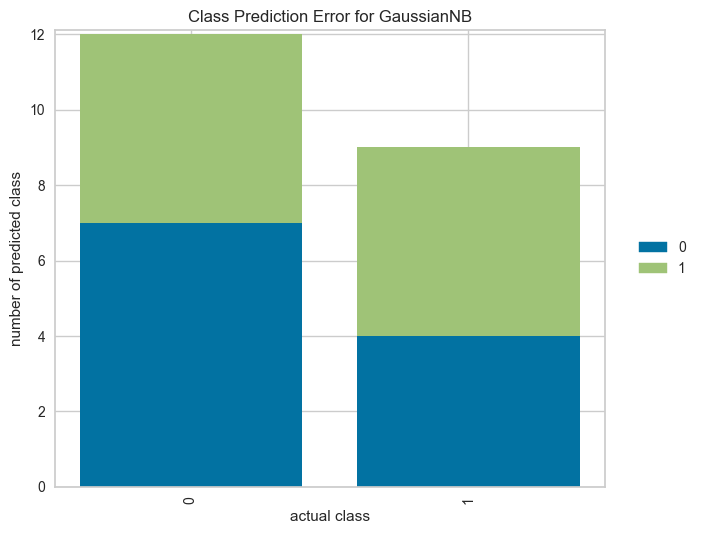

NameError: name 'X' is not defined

In [35]:
# plot_feature_importances(GNBreg)
plot_results(GNBreg)
# report_results_quickly(GNBreg)
plot_learning_curve(GNBreg)

In [ ]:
# LogisticRegression with make_pipeline
KNNreg = make_pipeline(MinMaxScaler(), KNeighborsClassifier())
evaluate_classification_model_holdout([('KNN', KNNreg)]) # 0.805 instead of  0.805195

In [ ]:
# plot_feature_importances(KNNreg)
plot_results(KNNreg)
# report_results_quickly(KNNreg)
plot_learning_curve(KNNreg)

################ Accuracy scores for test set for the models: ################

MLP: 0.622727

################ Train and test results for the model: ################

  models  accuracy_train  accuracy_test
0    MLP           0.770          0.623


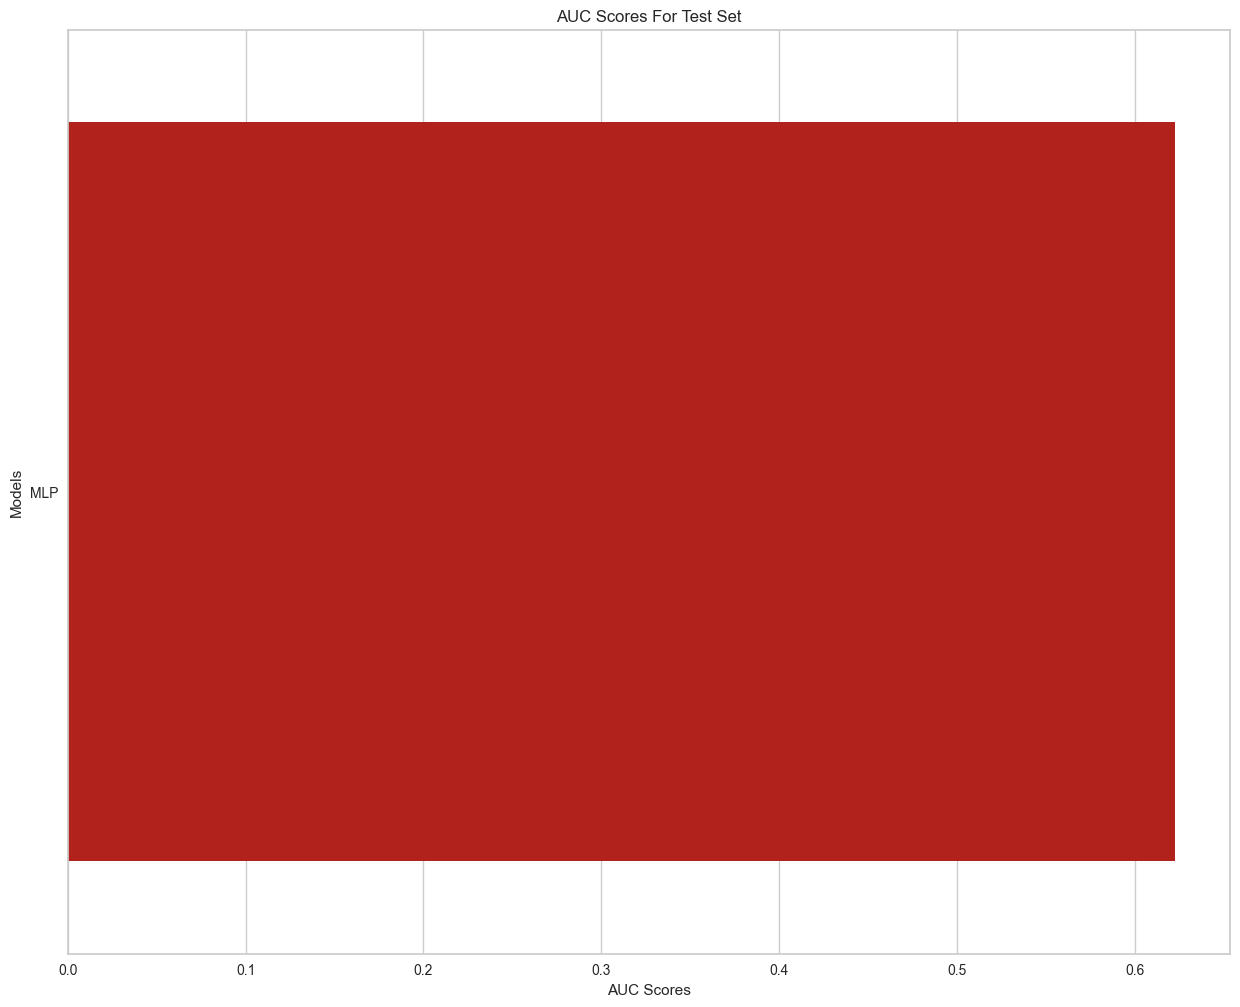

In [36]:
# LogisticRegression with make_pipeline
MLPreg = make_pipeline(MinMaxScaler(), MLPClassifier())
evaluate_classification_model_holdout([('MLP', MLPreg)]) # 0.805 instead of  0.805195

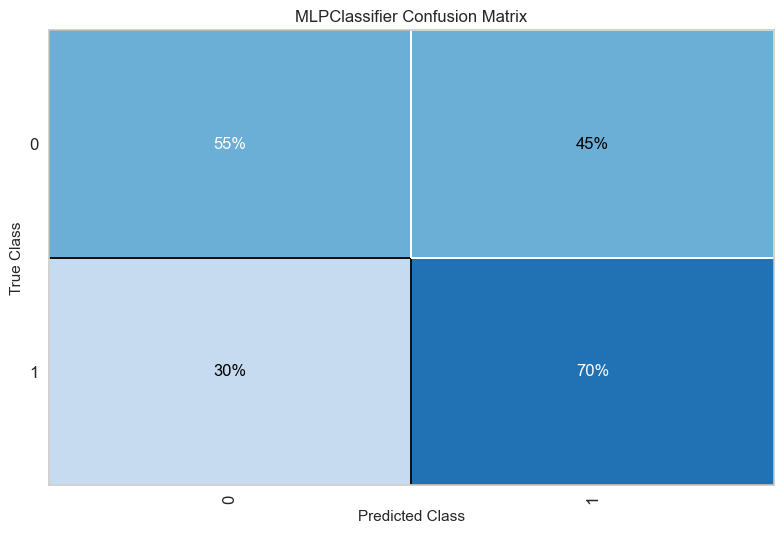

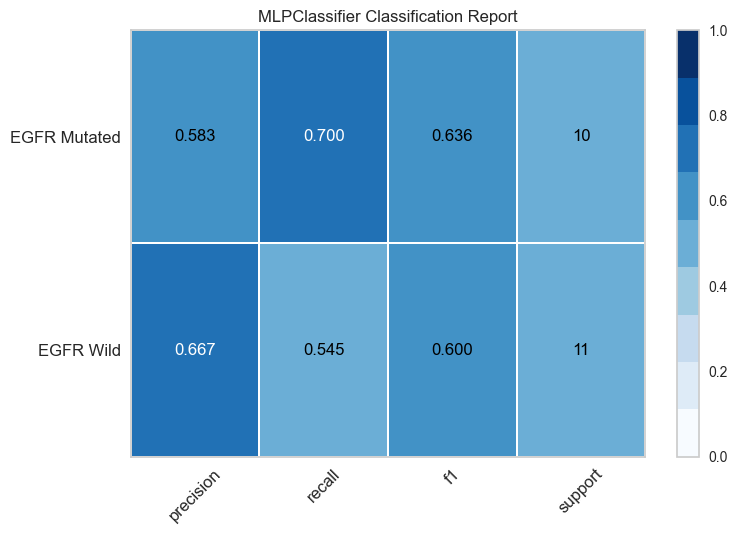

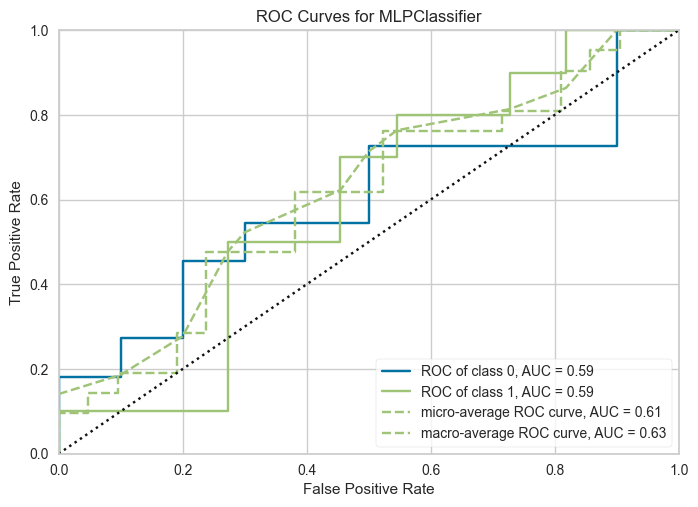

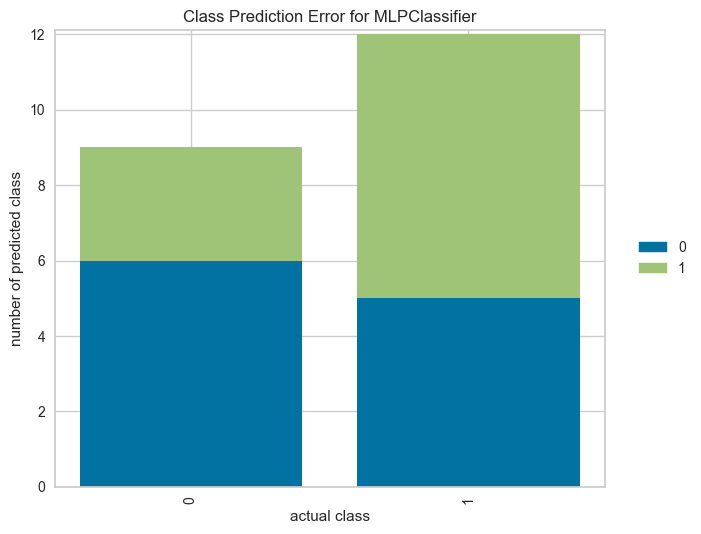

NameError: name 'X' is not defined

In [37]:
# plot_feature_importances(MLPreg)
plot_results(MLPreg)
# report_results_quickly(MLPreg)
plot_learning_curve(MLPreg)

################ Accuracy scores for test set for the models: ################

DT: 0.622727

################ Train and test results for the model: ################

  models  accuracy_train  accuracy_test
0     DT           1.000          0.623


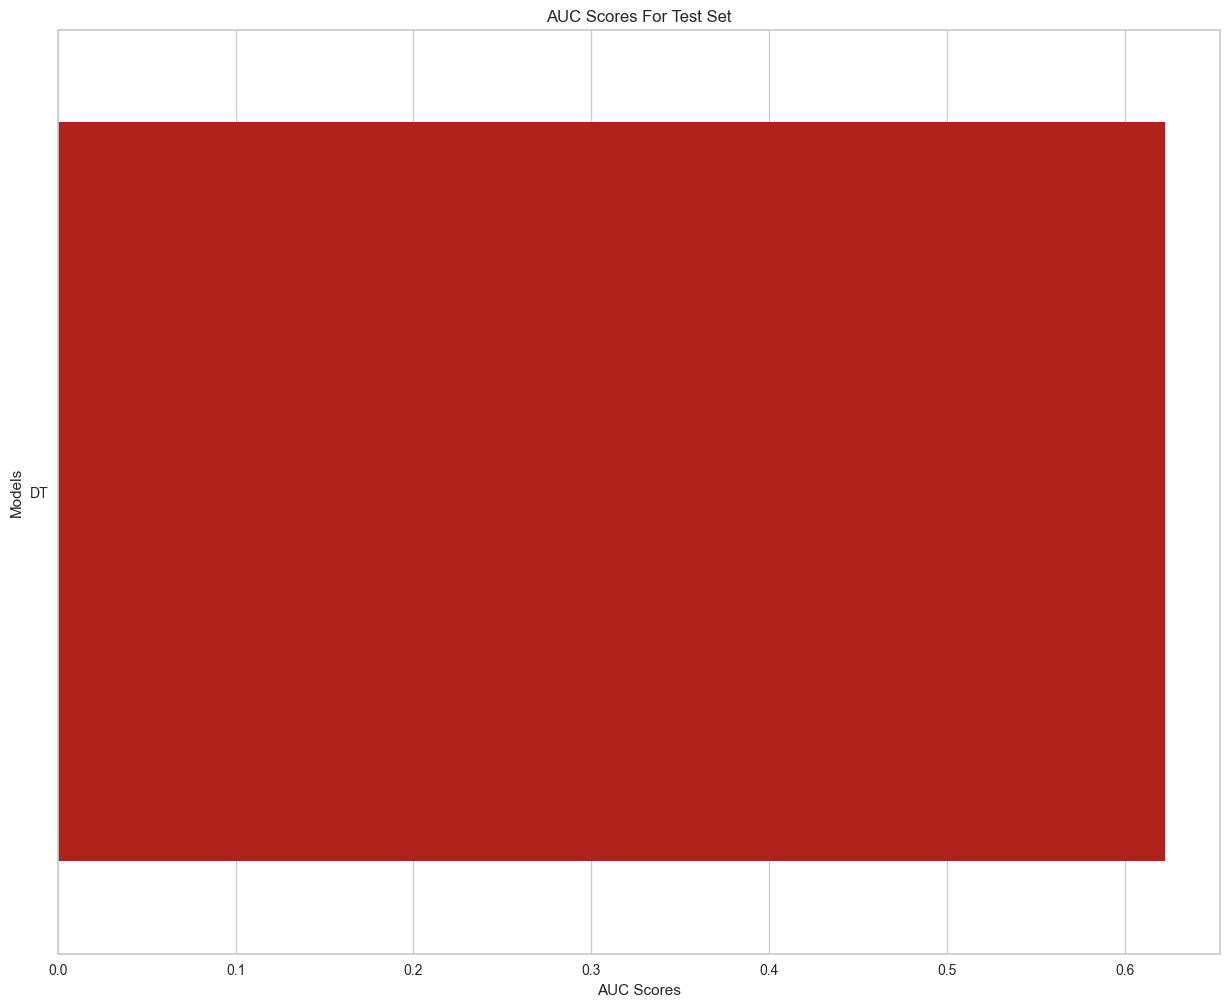

In [38]:
# LogisticRegression with make_pipeline
DTreg = make_pipeline(MinMaxScaler(), DecisionTreeClassifier())
evaluate_classification_model_holdout([('DT', DTreg)]) # 0.805 instead of  0.805195

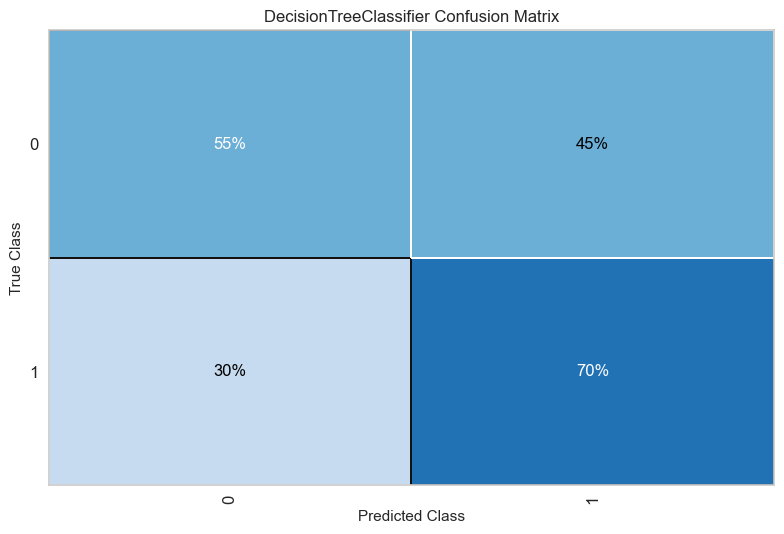

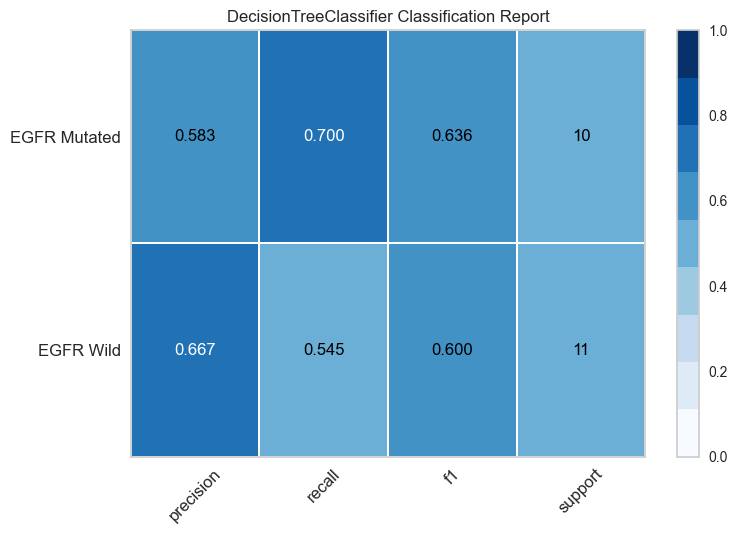

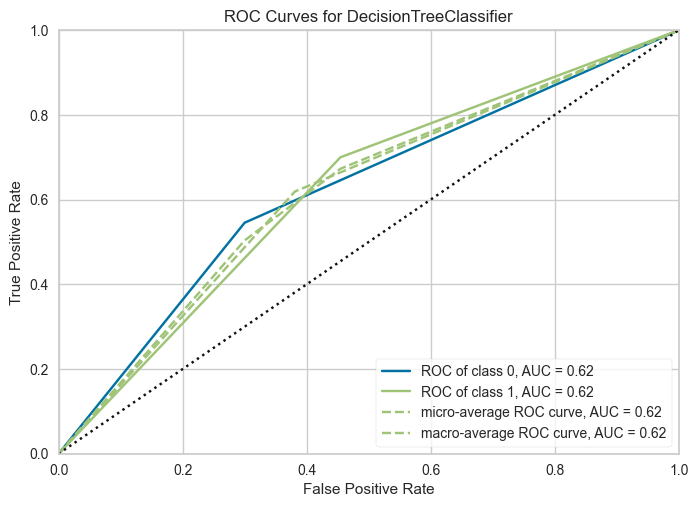

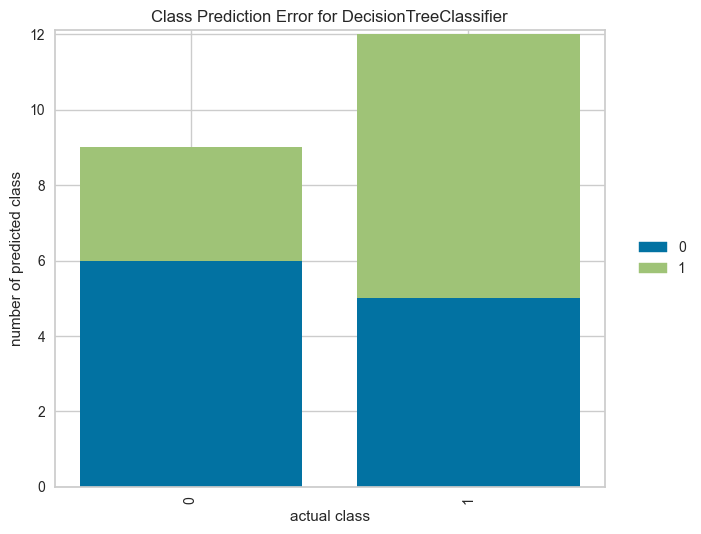

NameError: name 'X' is not defined

In [39]:
# plot_feature_importances(DTreg)
plot_results(DTreg)
# report_results_quickly(DTreg)
plot_learning_curve(DTreg)

################ Accuracy scores for test set for the models: ################

BC: 0.609091

################ Train and test results for the model: ################

  models  accuracy_train  accuracy_test
0     BC           1.000          0.609


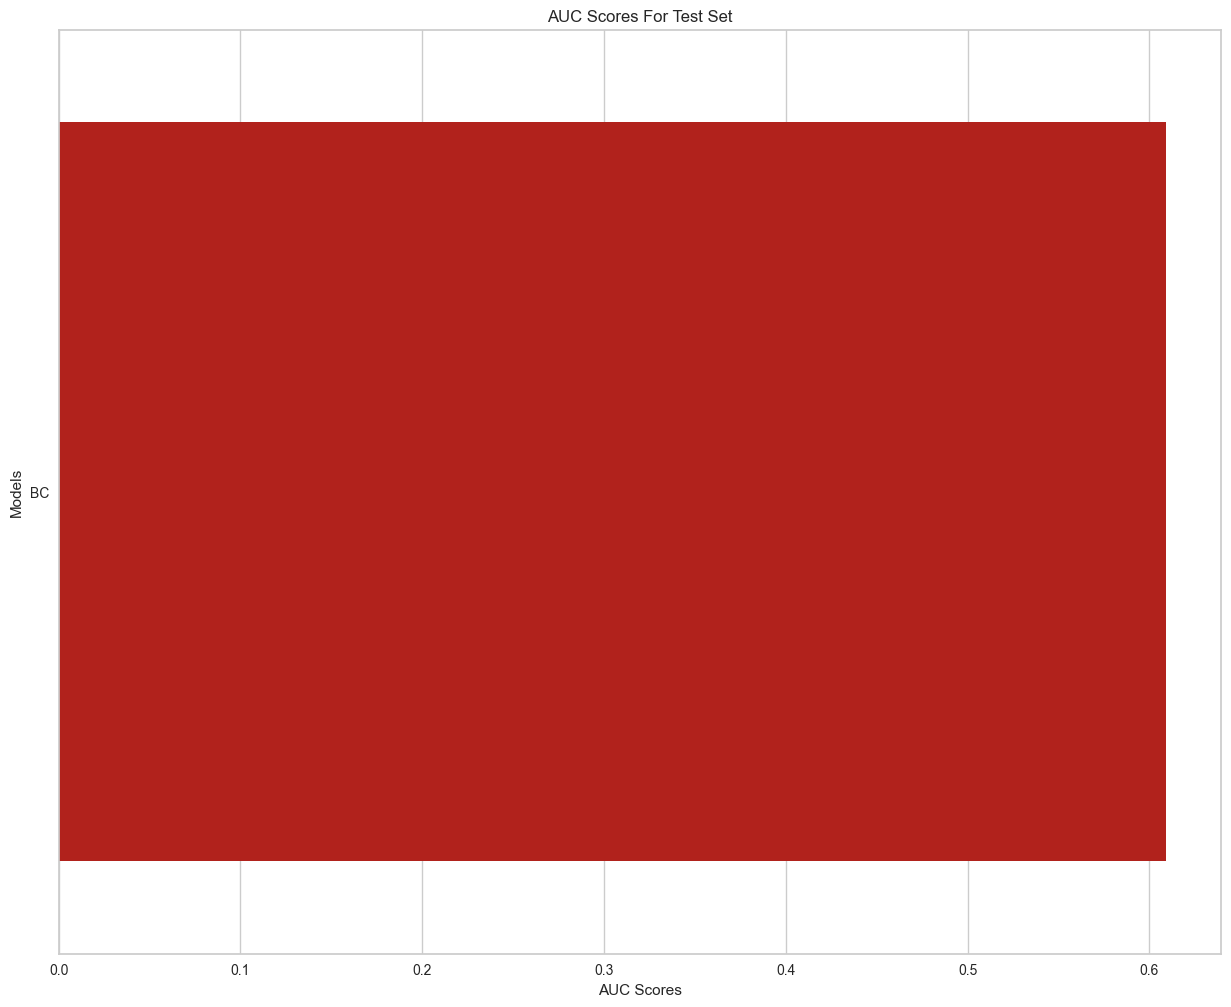

In [45]:
# LogisticRegression with make_pipeline
BCreg = make_pipeline(MinMaxScaler(), BaggingClassifier())
evaluate_classification_model_holdout([('BC', BCreg)]) # 0.805 instead of  0.805195

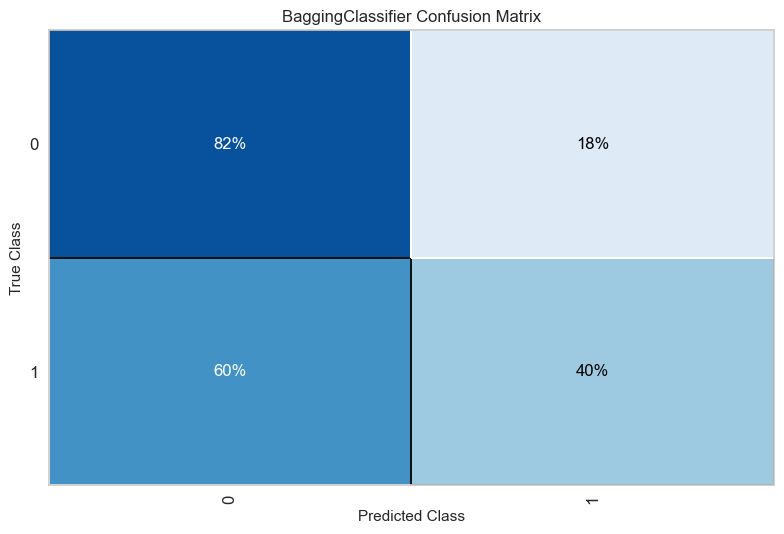

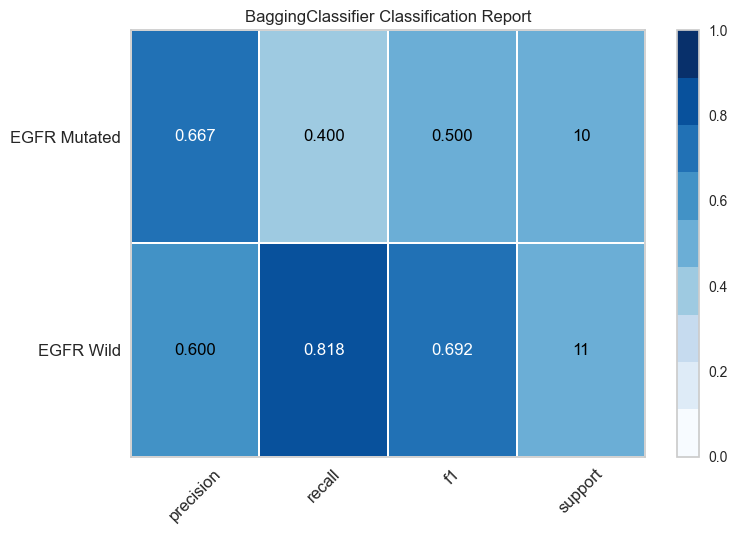

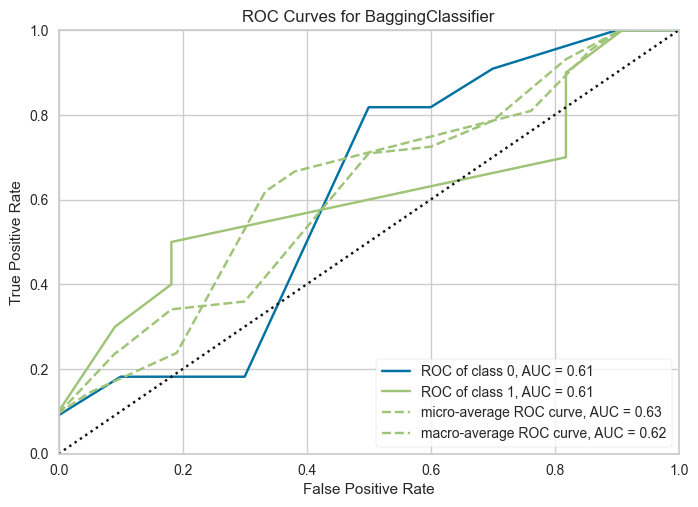

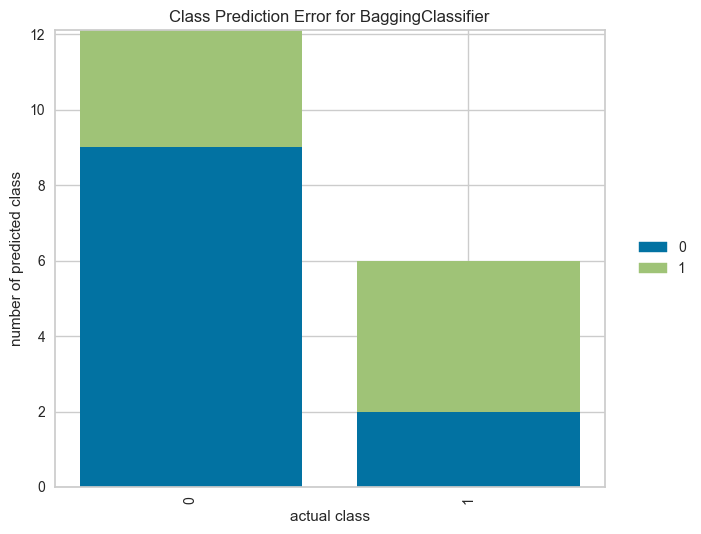

NameError: name 'X' is not defined

In [46]:
# plot_feature_importances(BCreg)
plot_results(BCreg)
# report_results_quickly(BCreg)
plot_learning_curve(BCreg)

################ Accuracy scores for test set for the models: ################

GBM: 0.618182

################ Train and test results for the model: ################

  models  accuracy_train  accuracy_test
0    GBM           1.000          0.618


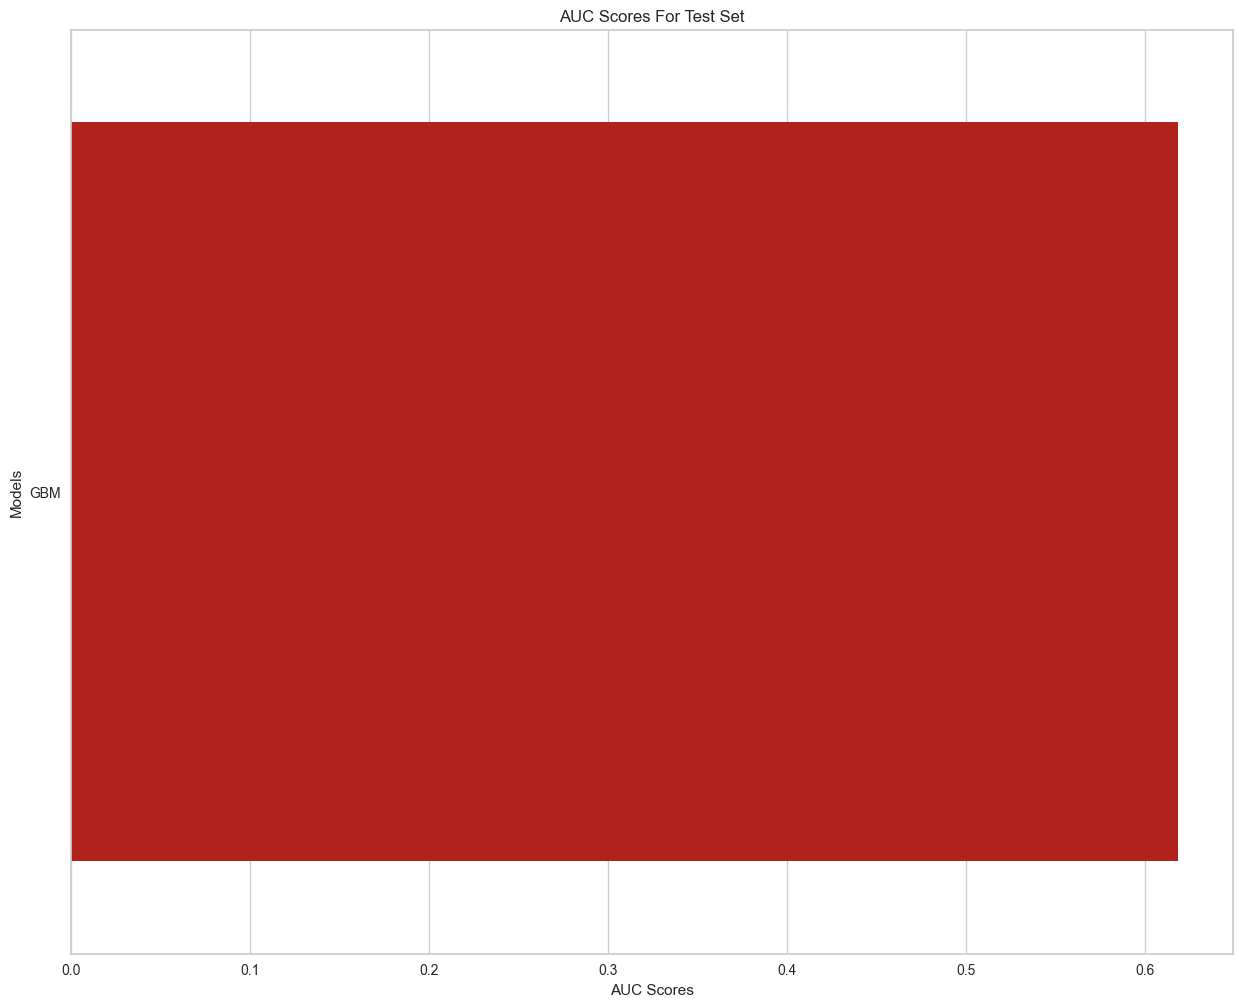

In [41]:
# LogisticRegression with make_pipeline
GBMreg = make_pipeline(MinMaxScaler(), GradientBoostingClassifier())
evaluate_classification_model_holdout([('GBM', GBMreg)]) # 0.805 instead of  0.805195

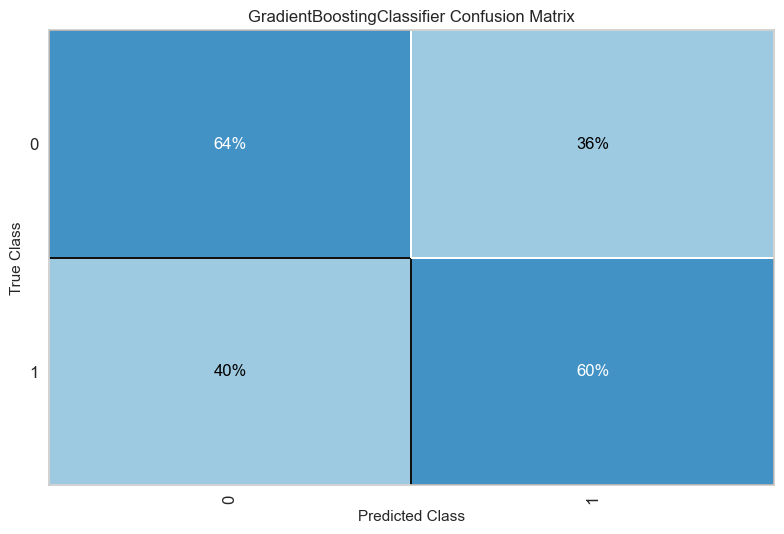

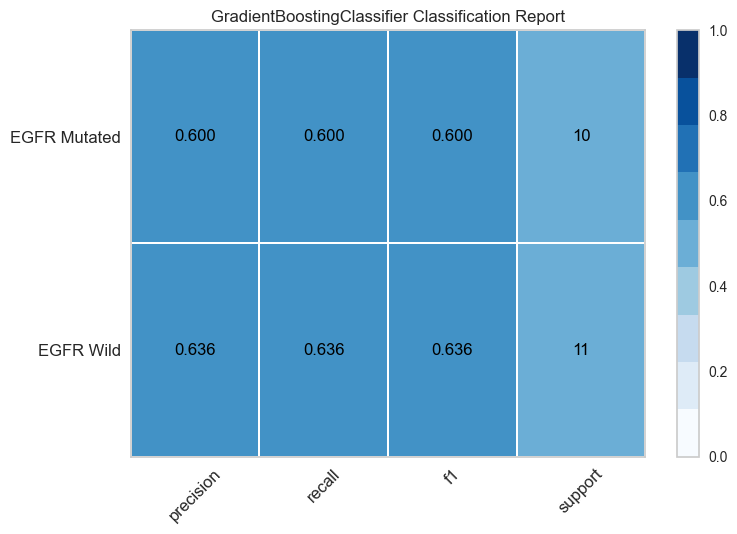

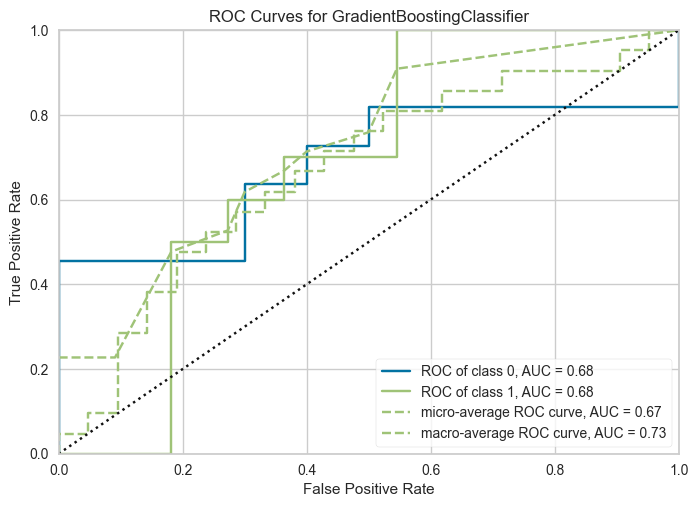

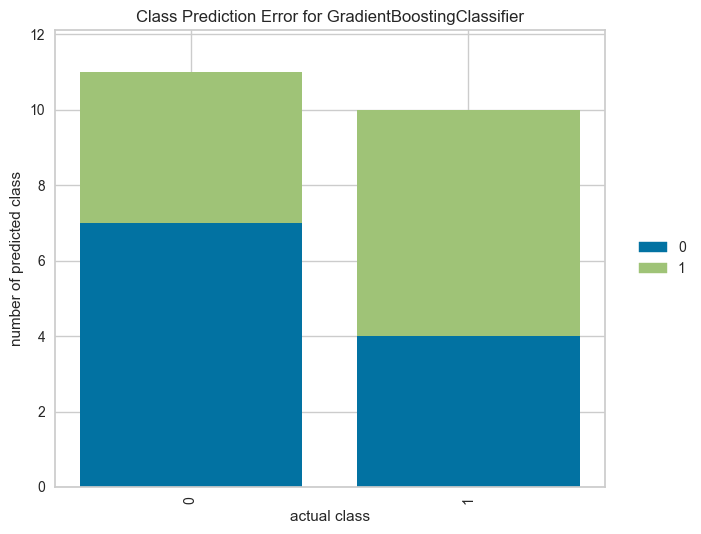

NameError: name 'X' is not defined

In [42]:
# plot_feature_importances(GBMreg)
plot_results(GBMreg)
# report_results_quickly(GBMreg)
plot_learning_curve(GBMreg)

################ Accuracy scores for test set for the models: ################

AB: 0.472727

################ Train and test results for the model: ################

  models  accuracy_train  accuracy_test
0     AB           1.000          0.473


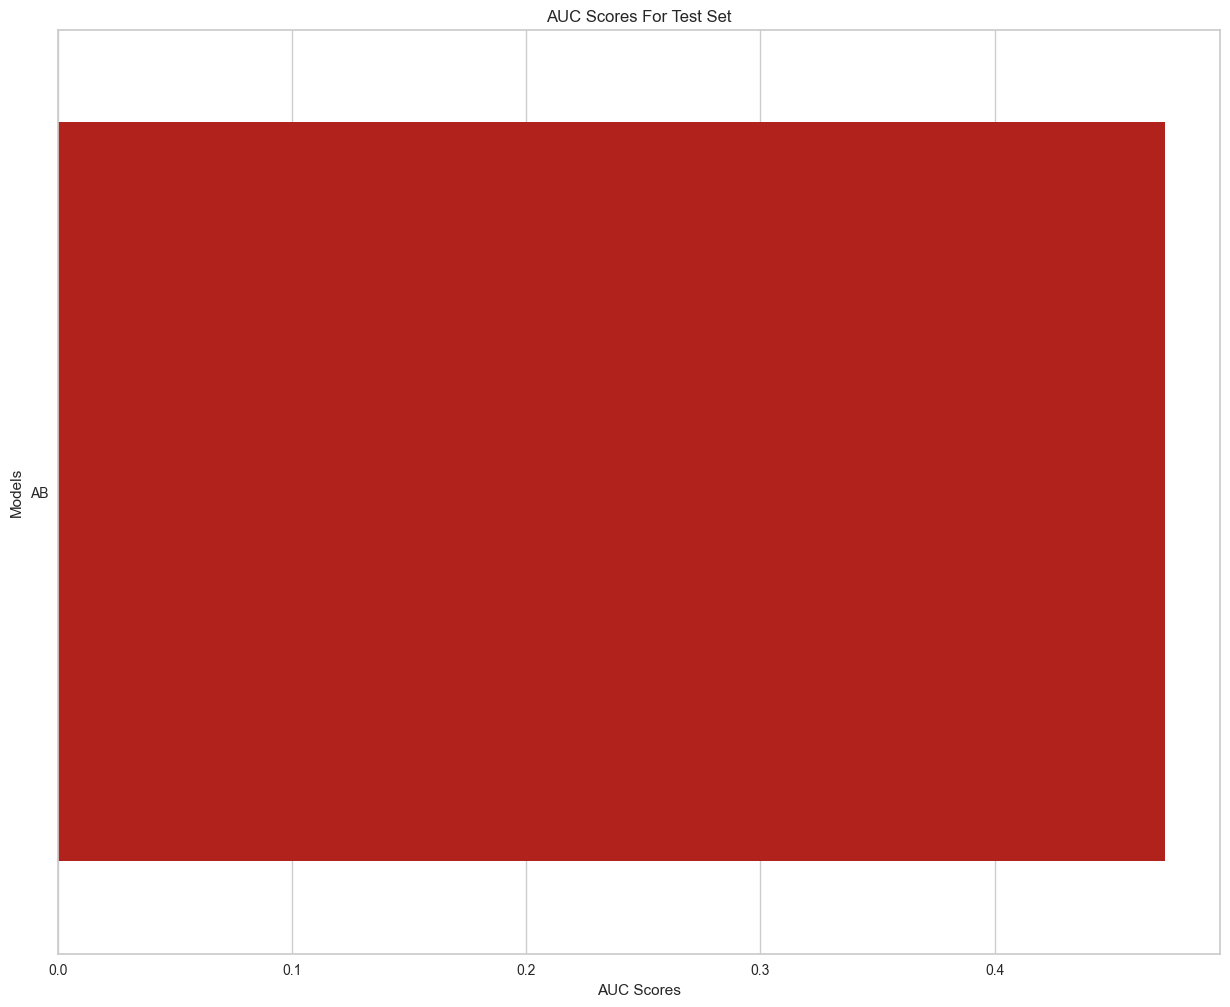

In [43]:
# LogisticRegression with make_pipeline
ABreg = make_pipeline(MinMaxScaler(), AdaBoostClassifier())
evaluate_classification_model_holdout([('AB', ABreg)]) # 0.805 instead of  0.805195

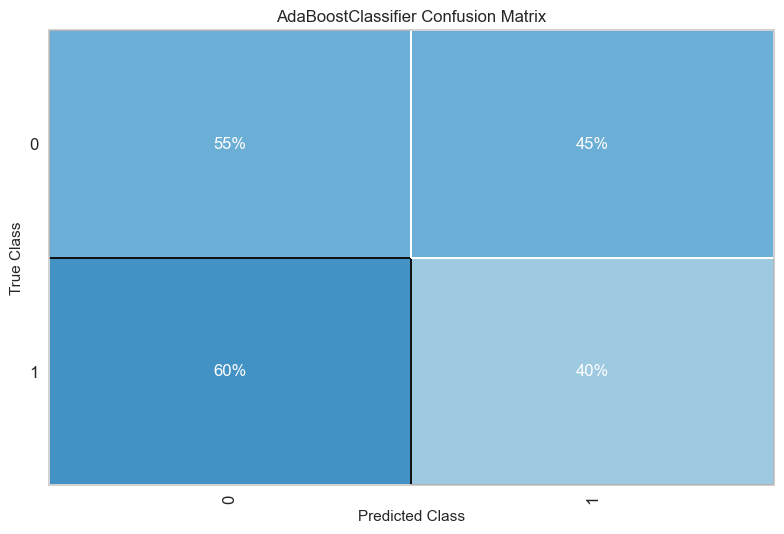

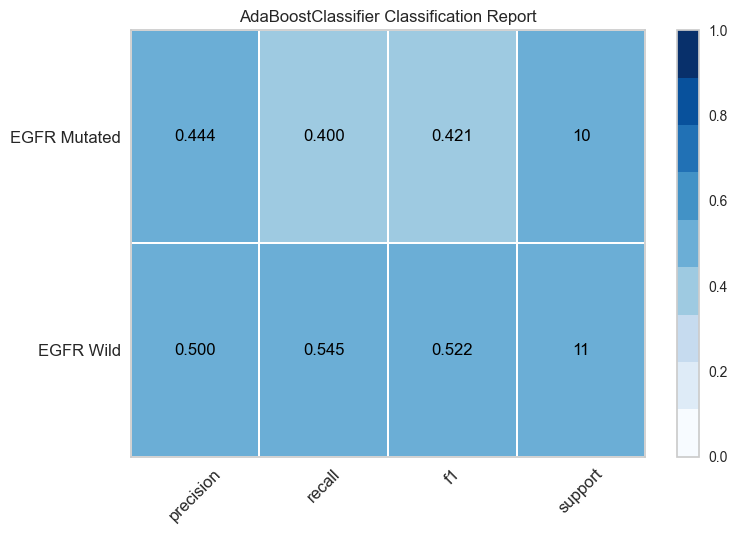

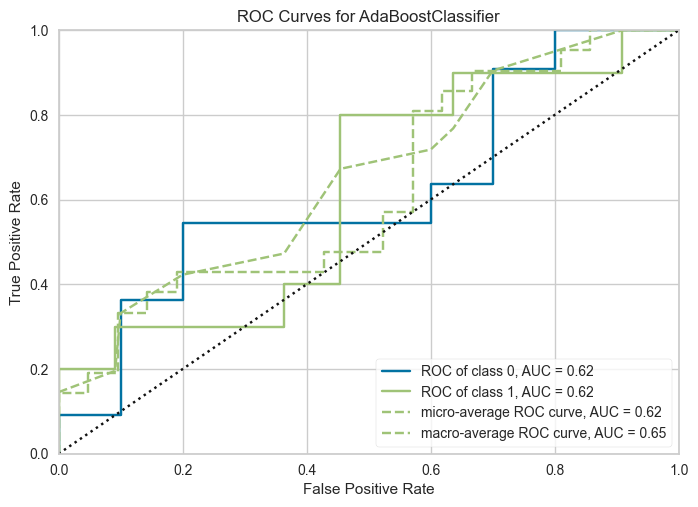

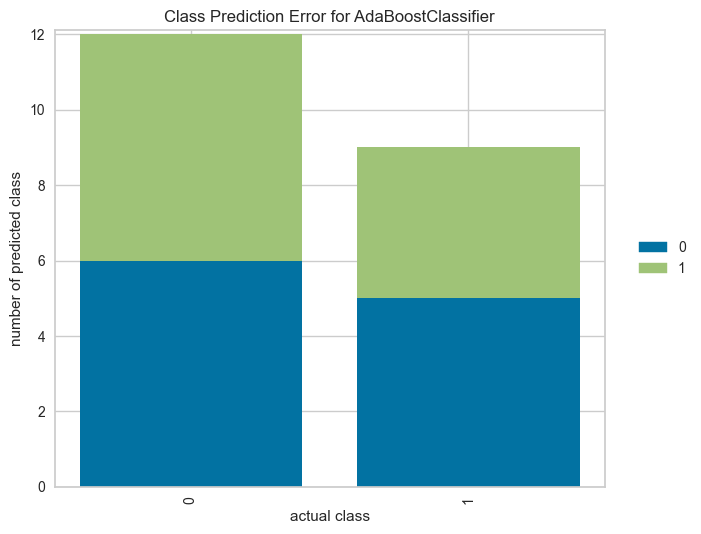

NameError: name 'X' is not defined

In [47]:
# plot_feature_importances(ABreg)
plot_results(ABreg)
# report_results_quickly(ABreg)
plot_learning_curve(ABreg)

################ Accuracy scores for test set for the models: ################

NGBClassifier: 0.663636

################ Train and test results for the model: ################

          models  accuracy_train  accuracy_test
0  NGBClassifier           0.988          0.664


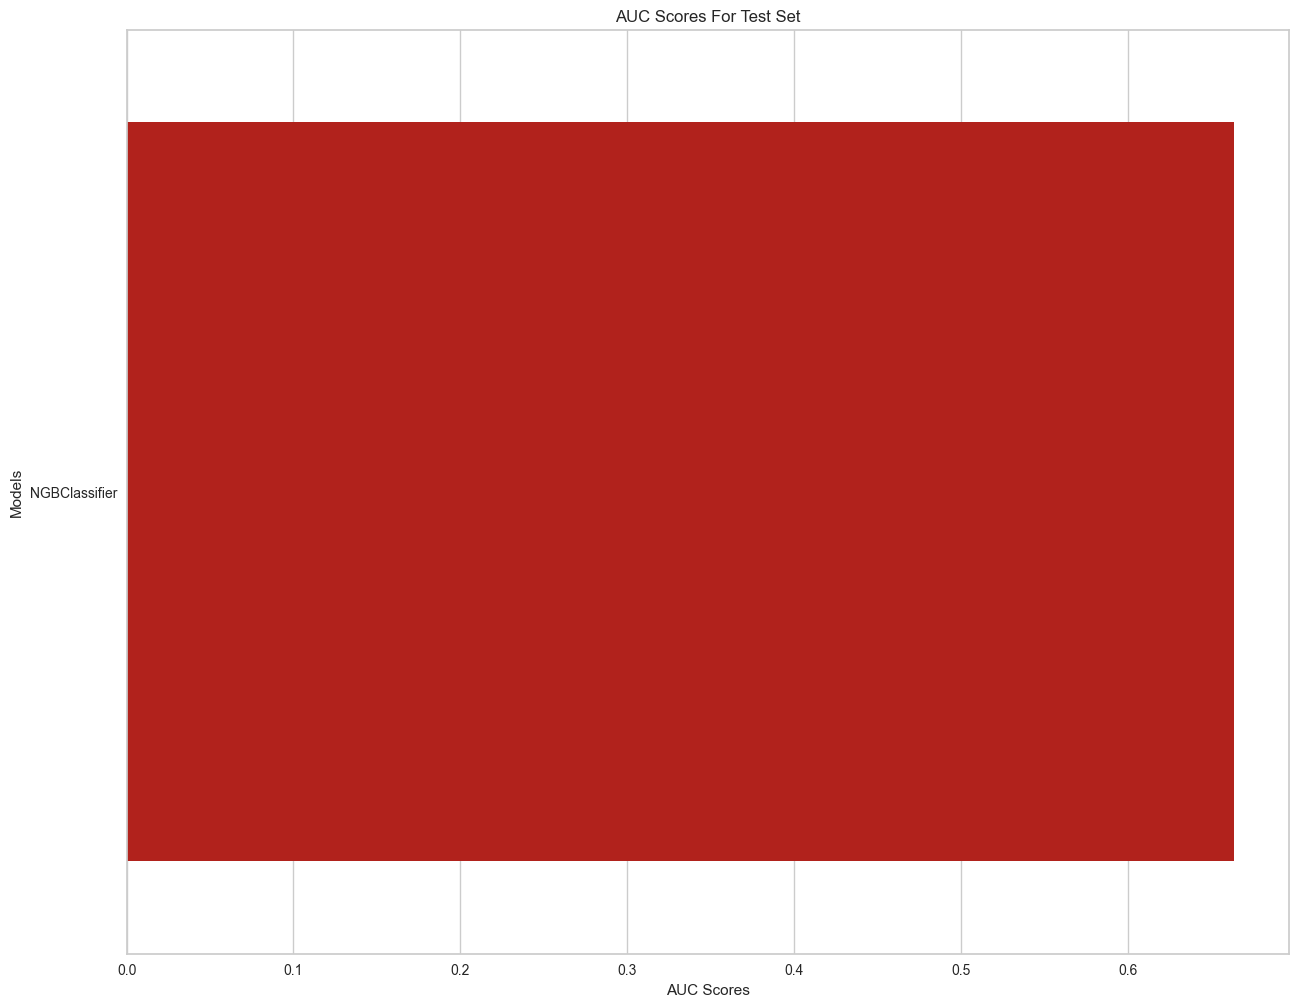

In [48]:
# LogisticRegression with make_pipeline
ngbreg = make_pipeline(MinMaxScaler(), NGBClassifier(verbose=False))
evaluate_classification_model_holdout([('NGBClassifier', ngbreg)]) # 0.805 instead of  0.805195

In [49]:
# plot_feature_importances(ngbreg)
# plot_results(ngbreg)
# report_results_quickly(ngbreg)
# plot_learning_curve(ngbreg)

################ Accuracy scores for test set for the models: ################

KNN: 0.527273

################ Train and test results for the model: ################

  models  accuracy_train  accuracy_test
0    KNN           0.675          0.527


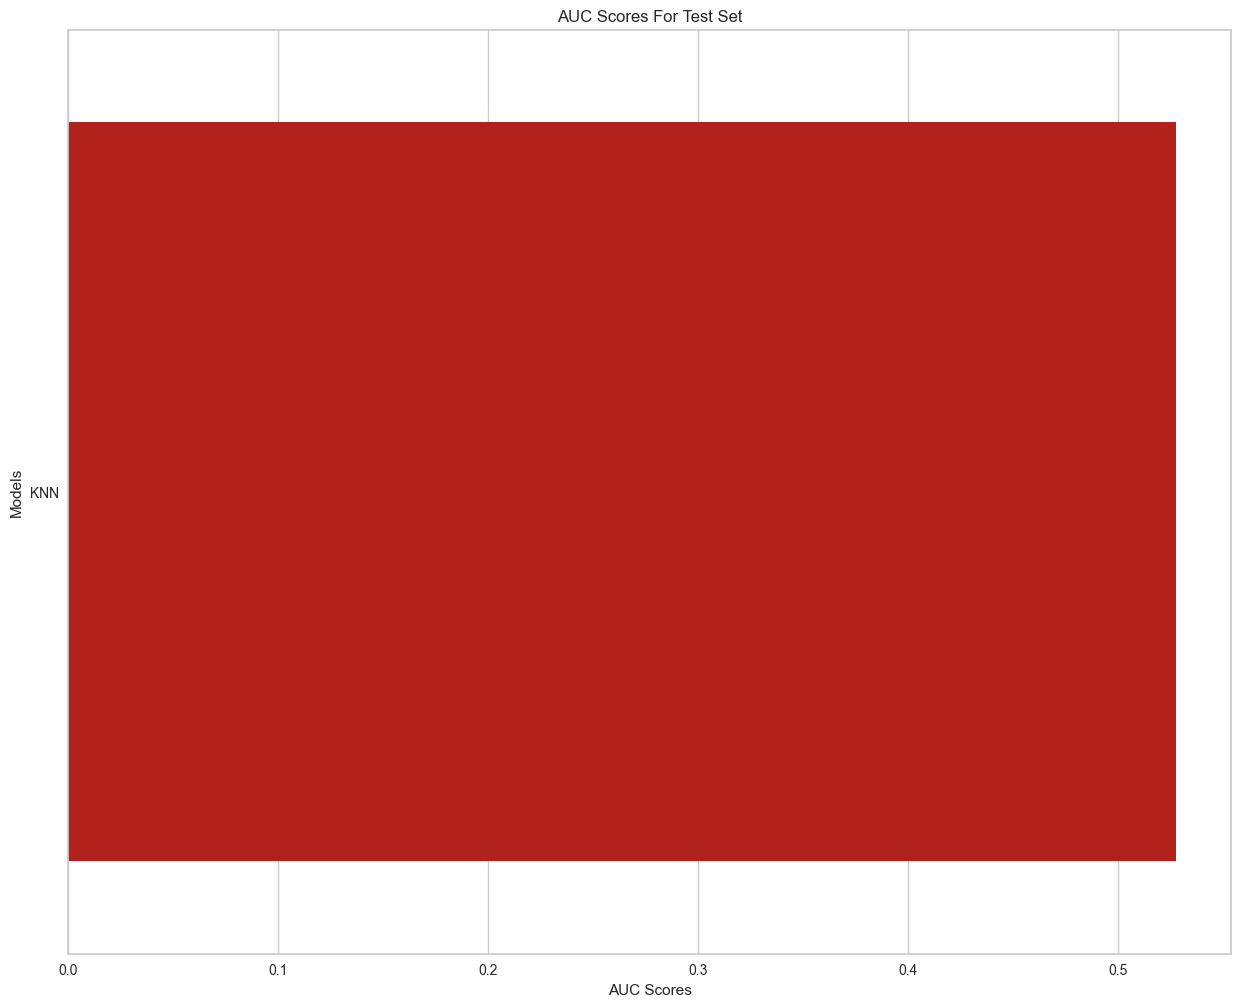

In [50]:
# KNN with make_pipeline
knn = make_pipeline(RobustScaler(), KNeighborsClassifier())
evaluate_classification_model_holdout([('KNN', knn)]) # 0.857 instead of 0.850649

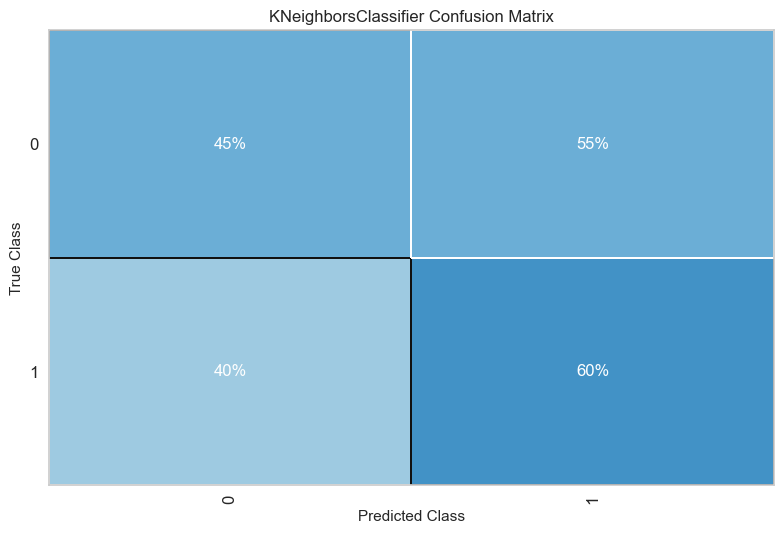

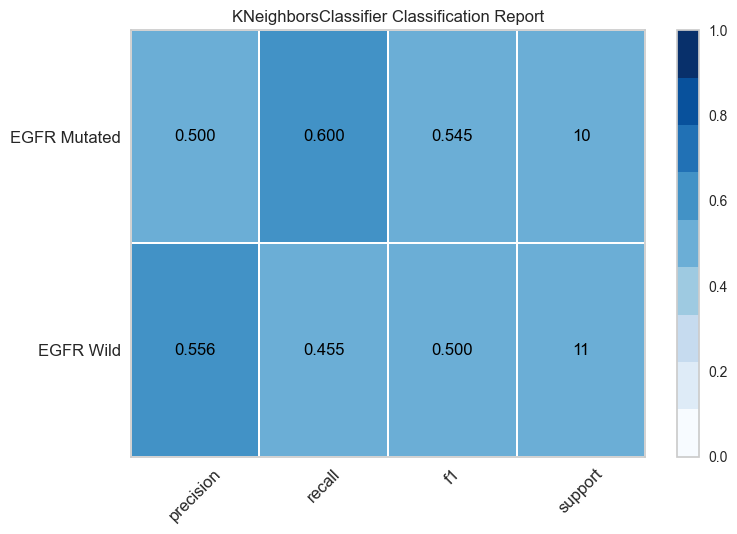

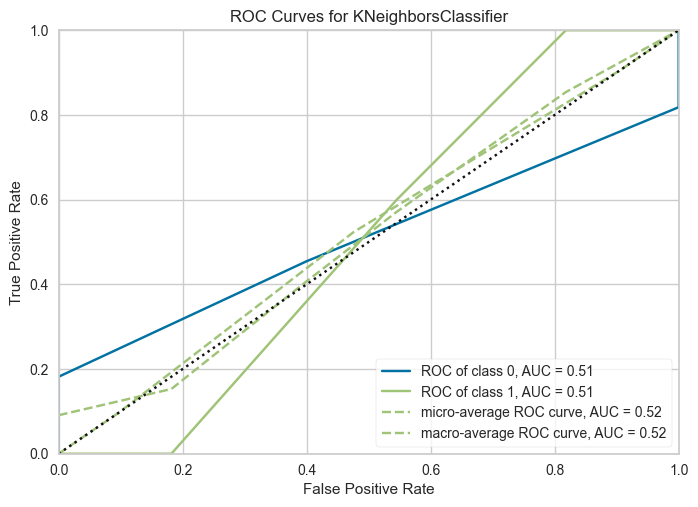

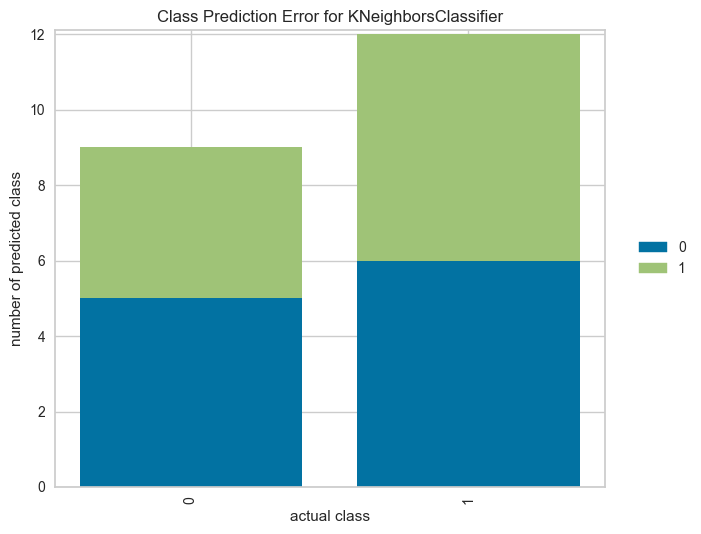

NameError: name 'X' is not defined

In [51]:
# plot_feature_importances(knn)
plot_results(knn)
# report_results_quickly(knn)
plot_learning_curve(knn)

################ Accuracy scores for test set for the models: ################

SVM: 0.527273

################ Train and test results for the model: ################

  models  accuracy_train  accuracy_test
0    SVM           0.782          0.527


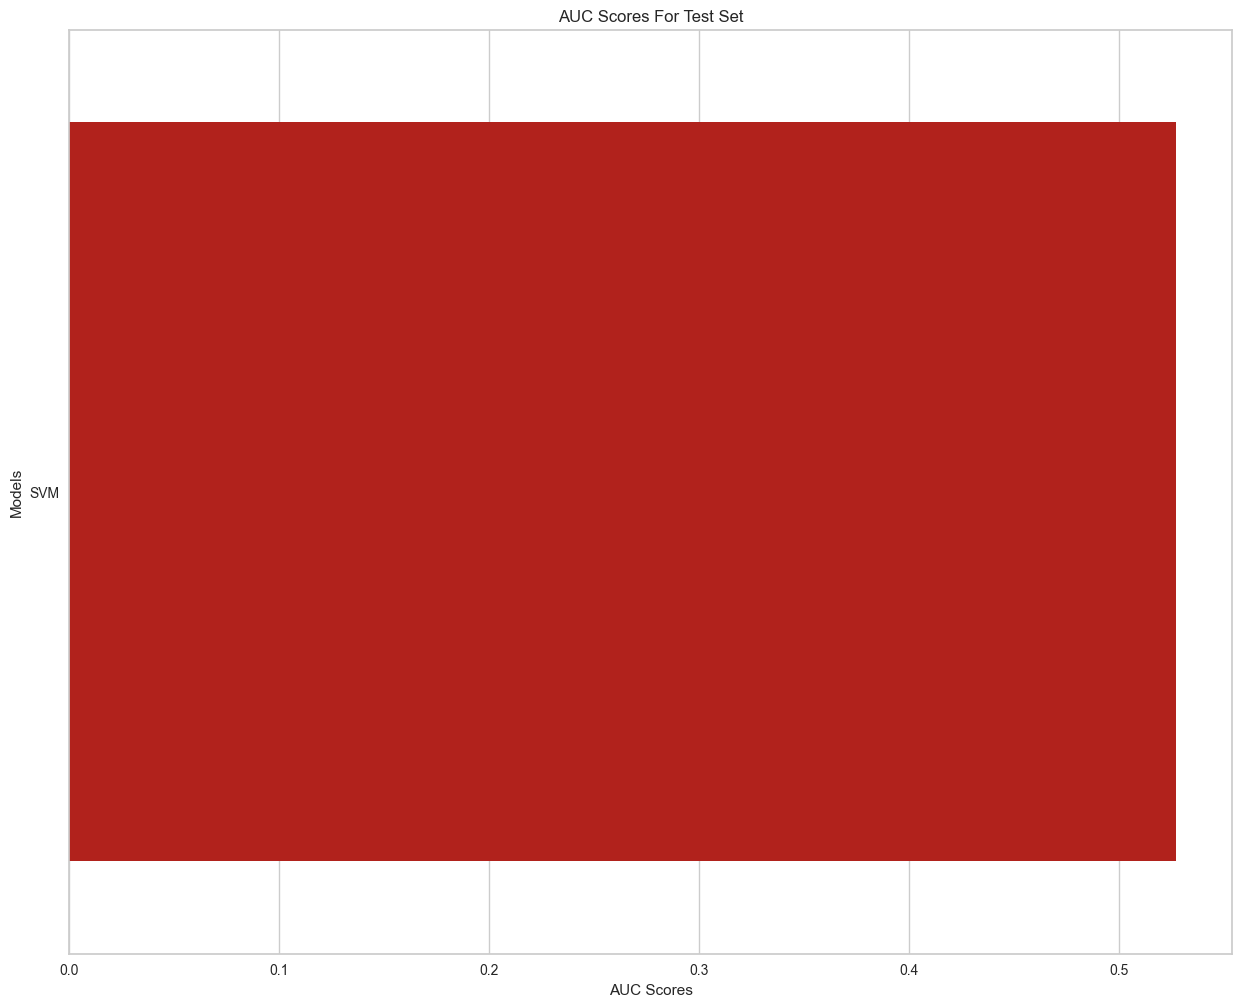

In [52]:
# SVC with make_pipeline
svc = make_pipeline(RobustScaler(), SVC())
evaluate_classification_model_holdout([('SVM', svc)]) # 0.864 instead of 0.837662

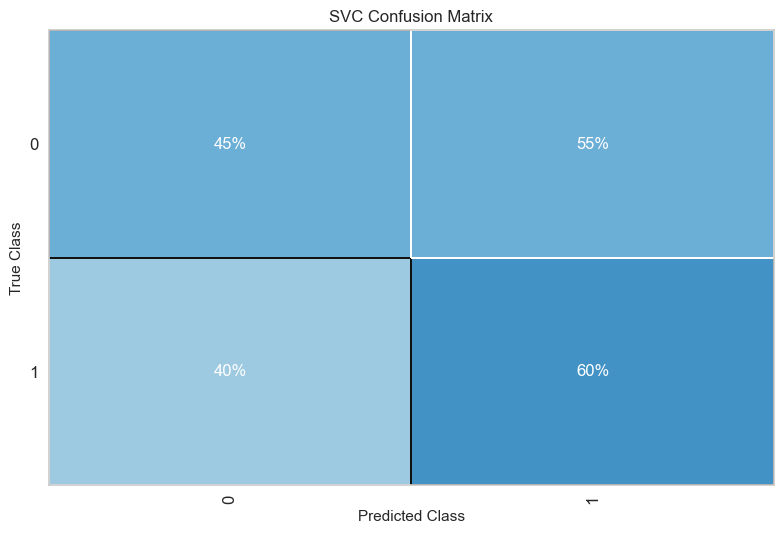

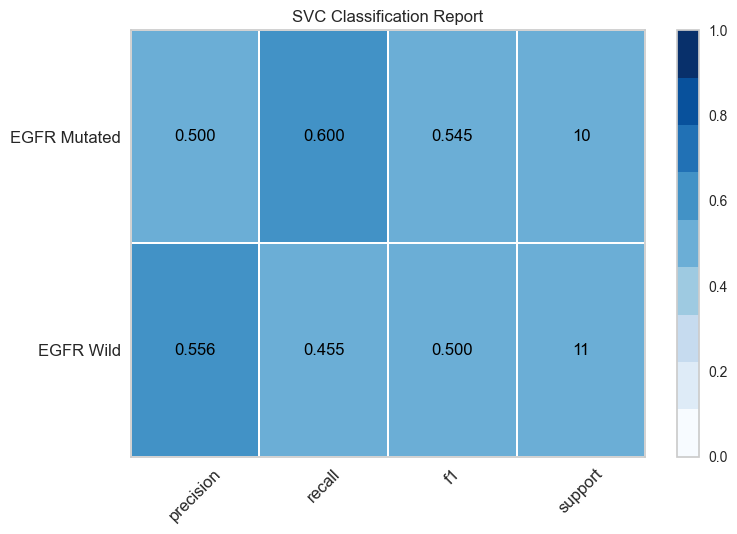

ModelError: no curves will be drawn; set binary=True.

In [53]:
# plot_feature_importances(svc)
plot_results(svc)
# report_results_quickly(svc)
plot_learning_curve(svc)

################ Accuracy scores for test set for the models: ################

ANN: 0.572727

################ Train and test results for the model: ################

  models  accuracy_train  accuracy_test
0    ANN           0.988          0.573


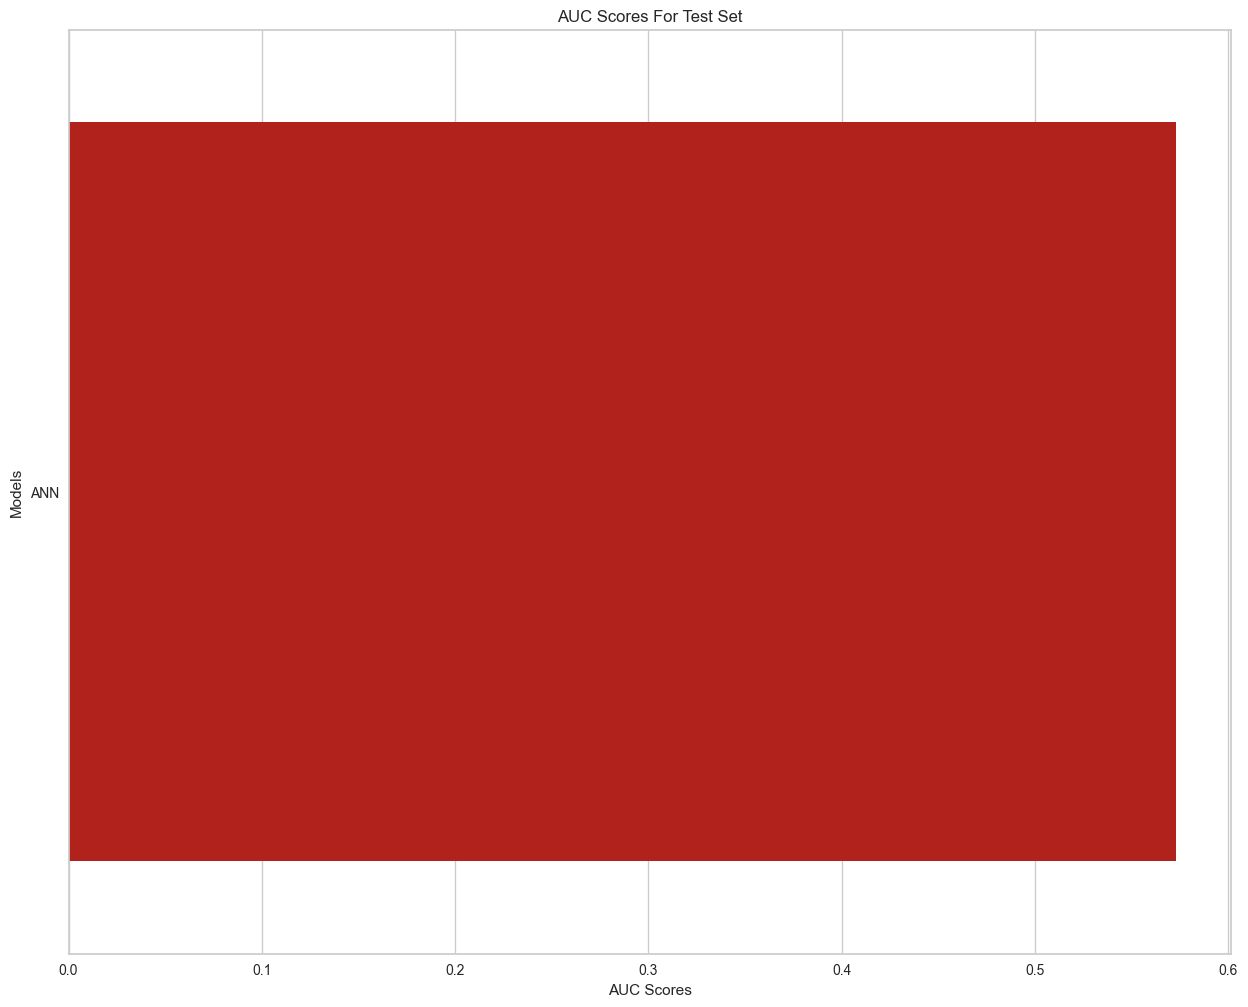

In [54]:
# ANN with make_pipeline
ann = make_pipeline(StandardScaler(), MLPClassifier())
evaluate_classification_model_holdout([('ANN', ann)]) # 0.857 instead of 0.850649

In [55]:
# MODEL TUNING

'''
Models to be tuned:
    - LogisticRegression
    - RandomForestClassifier
    -SVM
    - LightGBMClassifier
    - XGBClassifier
'''

# LogisticRegression # 0.805195

logreg_model = LogisticRegression(random_state=42)
logreg_params = {'penalty': ['l1', 'l2'],
                 'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25]}
logreg_cv_model = GridSearchCV(logreg_model, logreg_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
logreg_cv_model.best_params_ # {'C': 1, 'penalty': 'l2'}

Fitting 10 folds for each of 16 candidates, totalling 160 fits


C:\Users\ASUS\anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\envs\tf\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\ASUS\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py", line 1169, in fit
    solver = _check_solver(self.sol

{'C': 0.001, 'penalty': 'l2'}

In [56]:
# Final Model
logreg_tuned = LogisticRegression(**logreg_cv_model.best_params_).fit(X_train, y_train)
y_pred = logreg_tuned.predict(X_test)
# accuracy_score(y_test, y_pred) # 0.8051948051948052
roc_auc_score(y_test, y_pred)

0.4590909090909091

In [57]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-LR-RF', Save_format = 'csv',Save_type = 'col')

In [58]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-LR-RF.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR E19", "EGFR E21"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.50      0.82      0.62        11
    EGFR E21       0.33      0.10      0.15        10

    accuracy                           0.48        21
   macro avg       0.42      0.46      0.39        21
weighted avg       0.42      0.48      0.40        21

precision 0.3333333333333333 accuracy 0.47619047619047616 recall 0.1 auc 0.4590909090909091


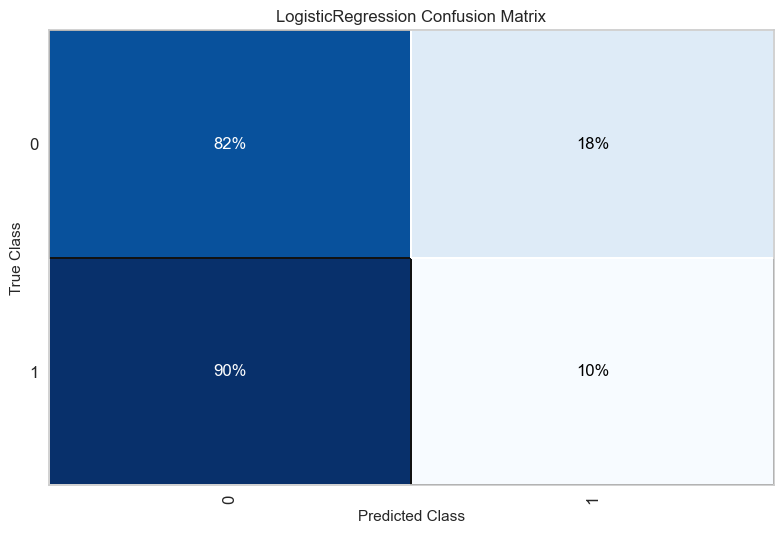

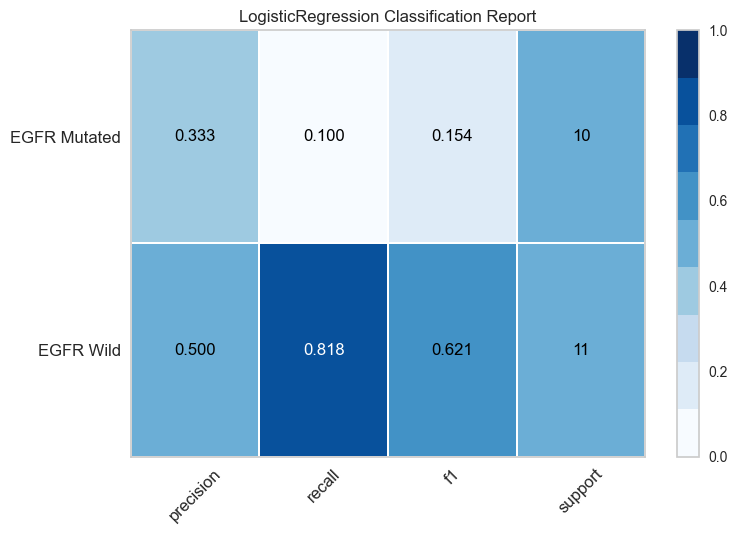

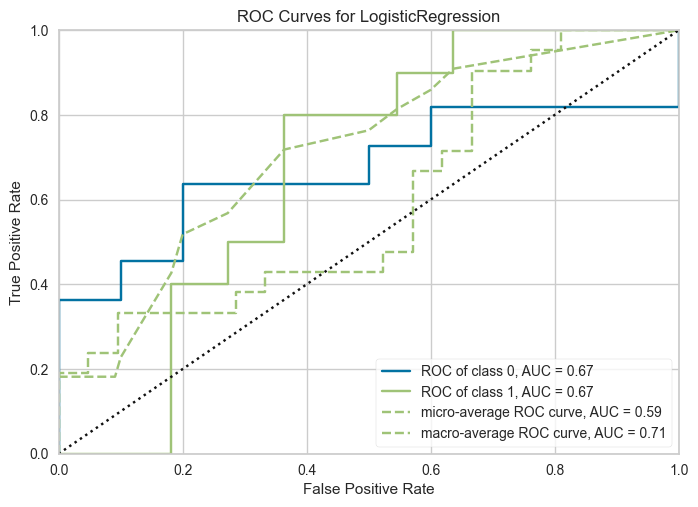

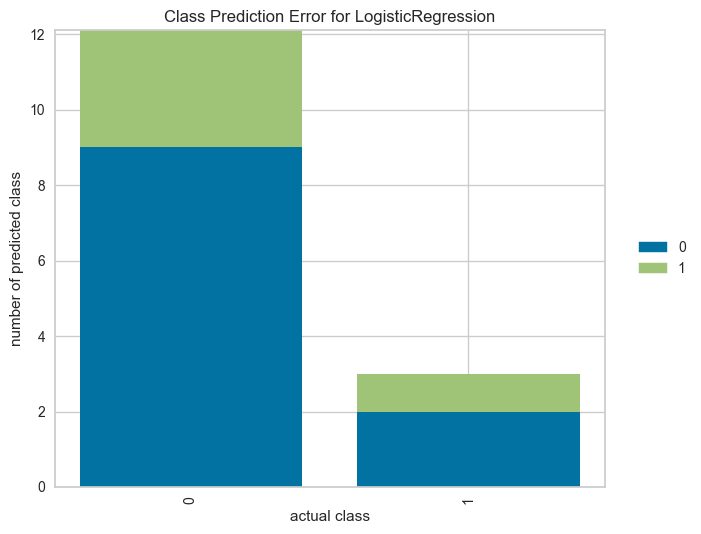

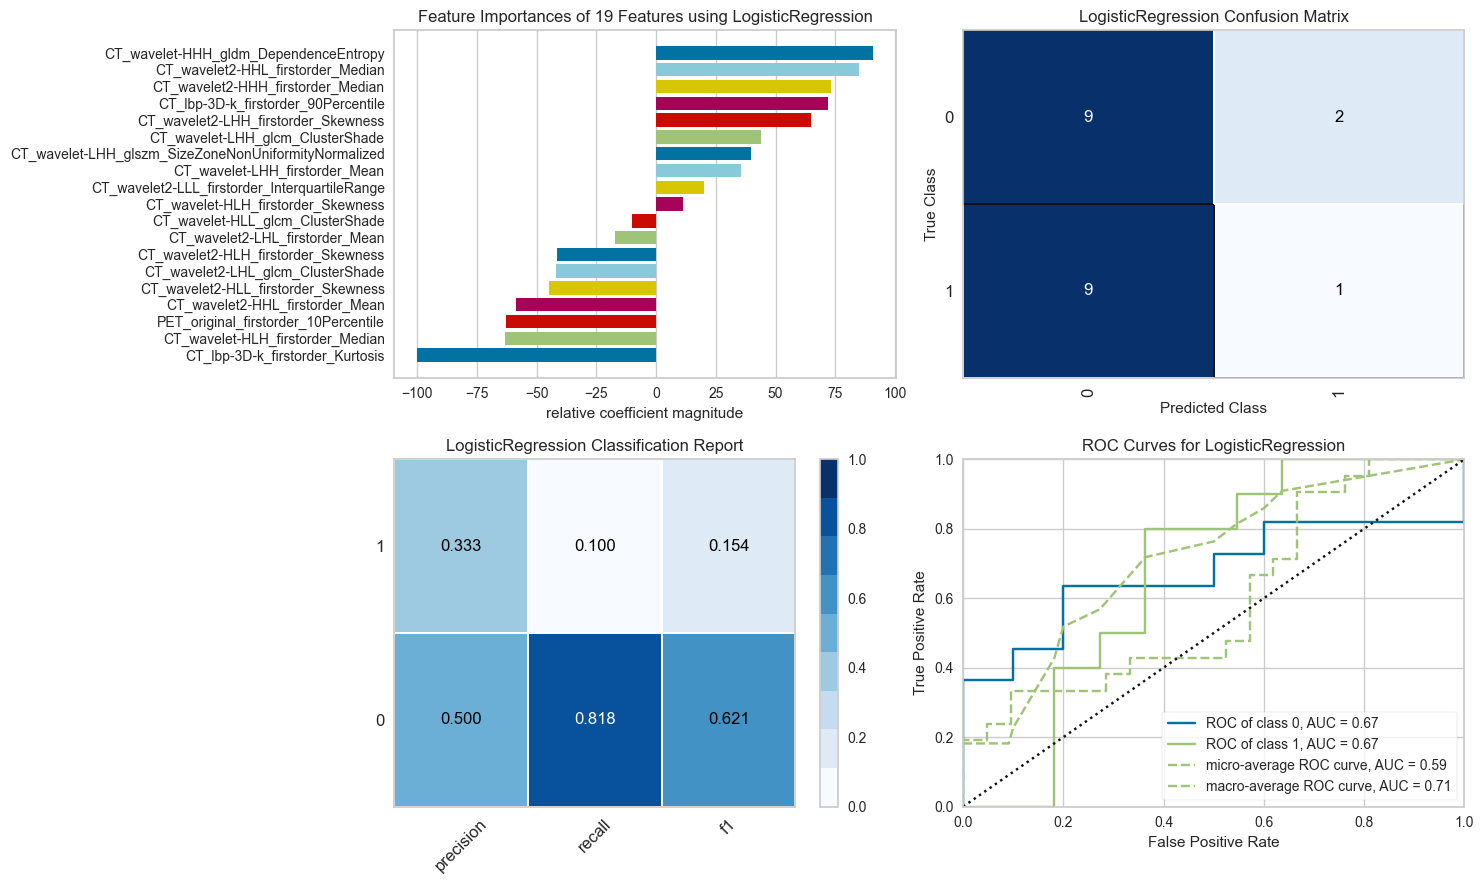

NameError: name 'X' is not defined

In [59]:
# Visualization of Results
# plot_feature_importances(logreg_tuned)
plot_results(logreg_tuned)
report_results_quickly(logreg_tuned)
plot_learning_curve(logreg_tuned)


In [60]:
# RandomForestClassifier # 0.876623

rf_model = RandomForestClassifier(random_state=42)
rf_params = {"n_estimators": [500, 800,1000,2000,3000,5000],
             "min_samples_split": [2, 5,7,8,9, 10,15,20, 30],
             "max_depth": [1,2,3,4, 5, 8, None]}

rf_cv_model = GridSearchCV(rf_model, rf_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
rf_cv_model.best_params_ # {'max_depth': None, 'min_samples_split': 7, 'n_estimators': 200}

Fitting 10 folds for each of 378 candidates, totalling 3780 fits


{'max_depth': 2, 'min_samples_split': 2, 'n_estimators': 500}

In [62]:
rf_cv_model.best_params_   #0.6425000000000001   {'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 10}

{'max_depth': 2, 'min_samples_split': 2, 'n_estimators': 500}

In [63]:
# Final Model
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix
rf_tuned = RandomForestClassifier(**rf_cv_model.best_params_).fit(X_train, y_train)
y_pred = rf_tuned.predict(X_test)
# accuracy_score(y_test, y_pred) # 0.8831168831168831
roc_auc_score(y_test, y_pred)

0.6136363636363635

In [64]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-RF-RF73', Save_format = 'csv',Save_type = 'col')

In [66]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-RF-RF73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR E19", "EGFR E21"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.62      0.73      0.67        11
    EGFR E21       0.62      0.50      0.56        10

    accuracy                           0.62        21
   macro avg       0.62      0.61      0.61        21
weighted avg       0.62      0.62      0.61        21

precision 0.625 accuracy 0.6190476190476191 recall 0.5 auc 0.6136363636363635


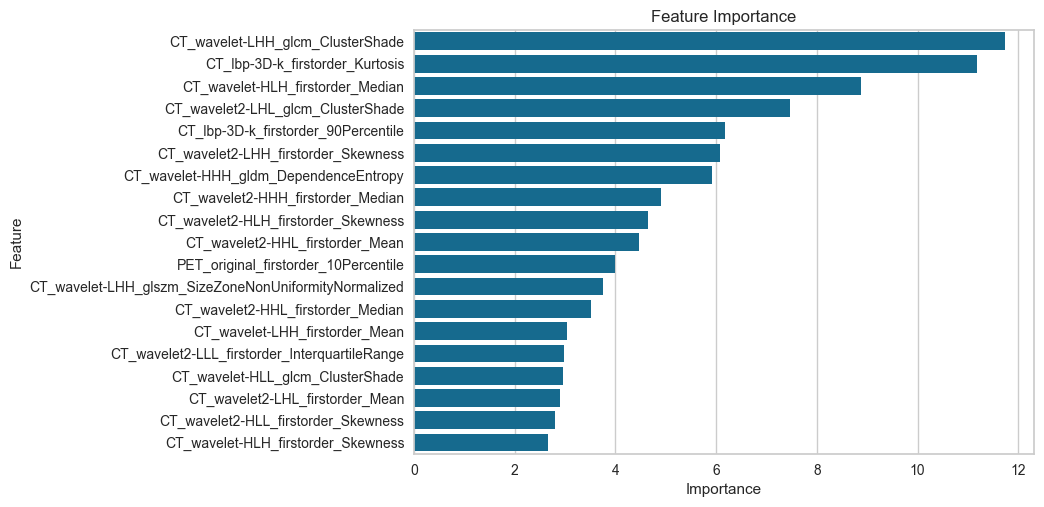

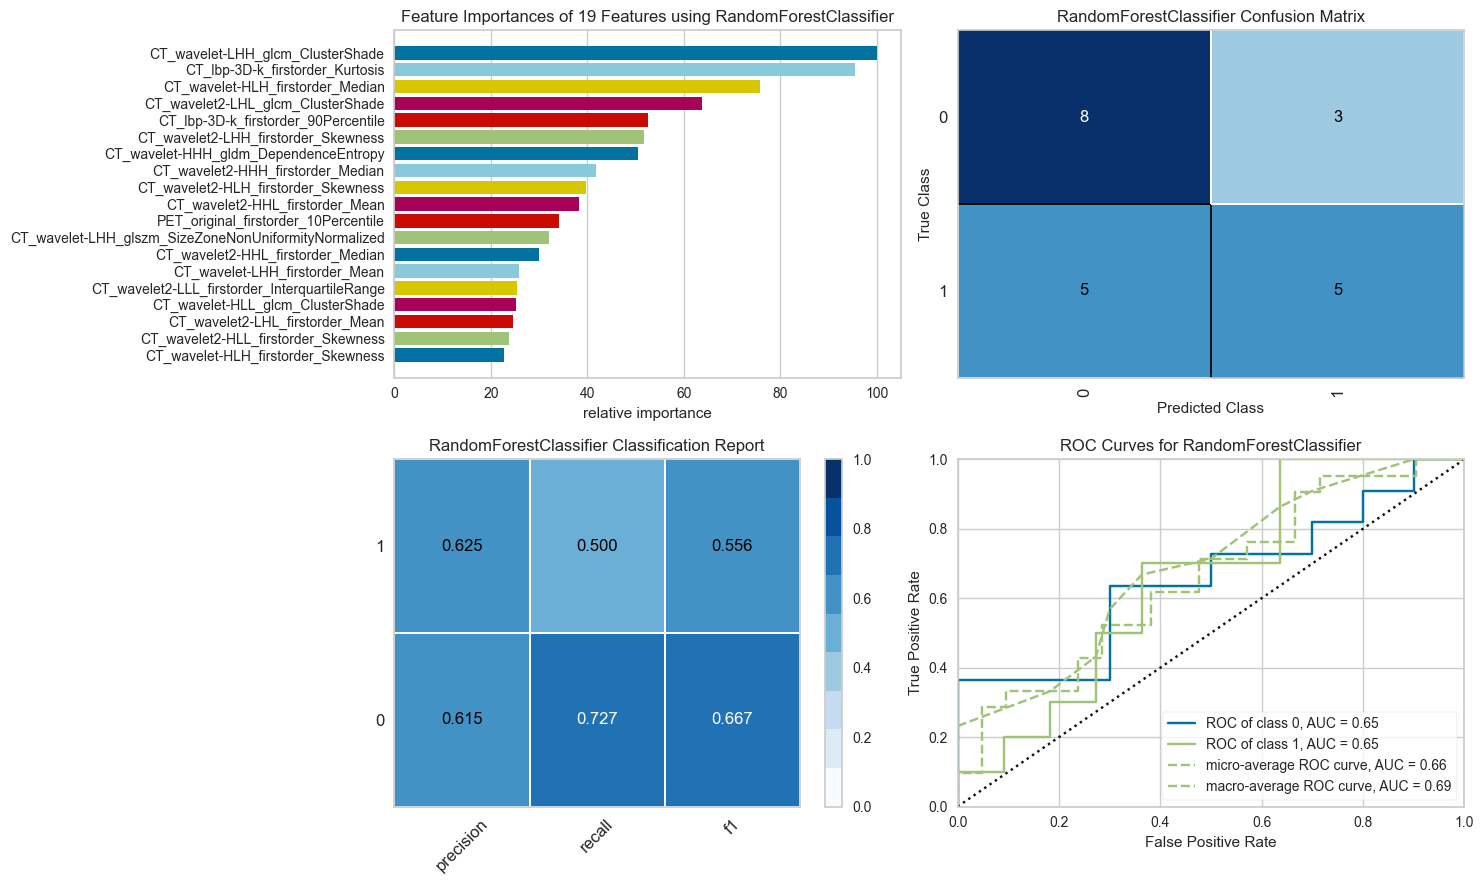

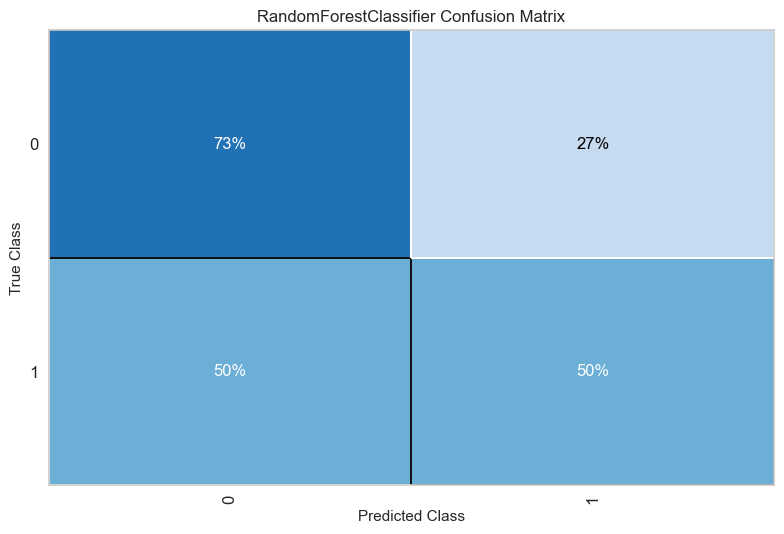

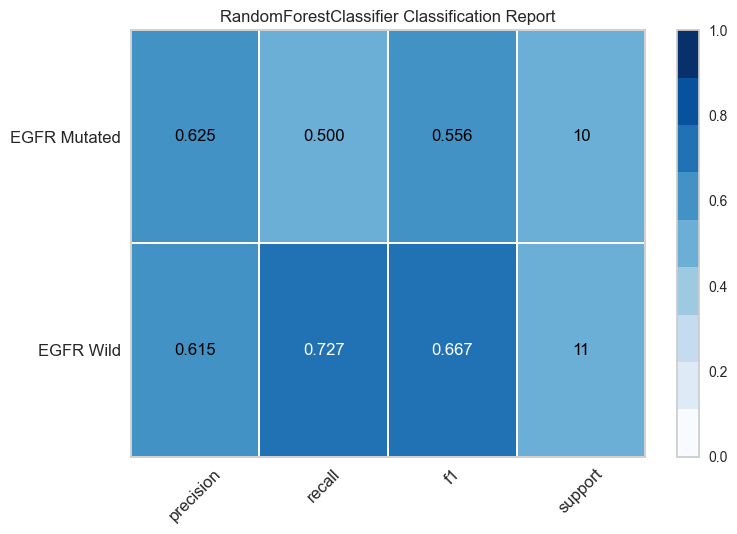

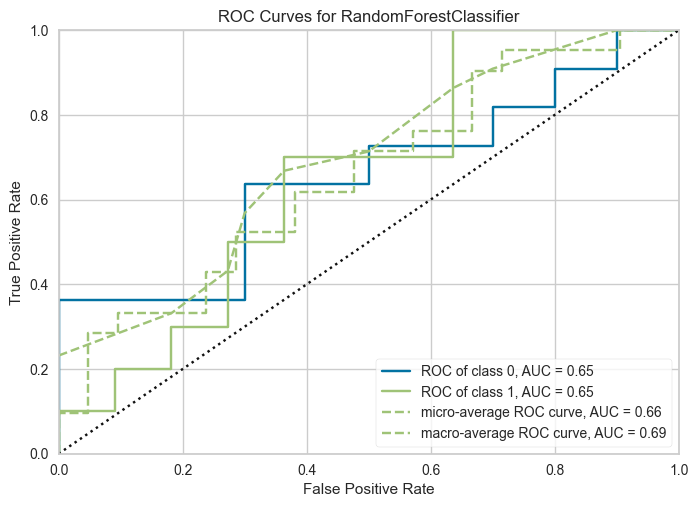

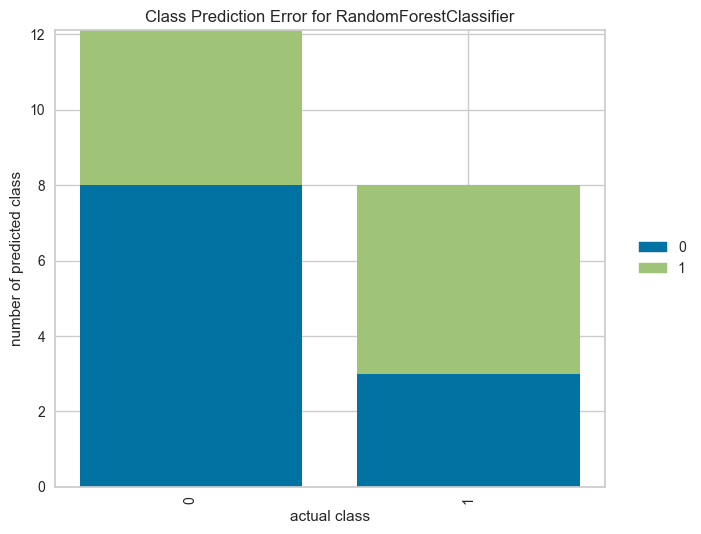

NameError: name 'X' is not defined

In [67]:
# Visualization of Results --> Feature Importances
plot_feature_importances(rf_tuned)
report_results_quickly(rf_tuned)
plot_results(rf_tuned)
plot_learning_curve(rf_tuned)

In [68]:
# CatBoostClassifier # 0.883117

from yellowbrick.contrib.wrapper import wrap
cb_model = CatBoostClassifier()
                                        
cb_params = {
#     'depth': [1,2,3,4, 6, 10],
          'learning_rate' : [0.01,0.03,0.05,0.15,0.1,0.3],
#          'l2_leaf_reg': [1,4,9],
         'iterations': [200,300,500,800,1200,2000,3000],
          'early_stopping_rounds':[2000,3000],
#              'subsample':[0.5,1.0],
             'max_depth':[1,3,5,6,8,10, None]
#              'n_estimators':[1000,3000,5000] 
#           'task_type':['GPU'],
#           'loss_function':['Binary'],
          
         }
# {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5000, 'subsample': 0.5}

cb_cv_model = GridSearchCV(cb_model, cb_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
cb_cv_model.best_params_ # {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.9}


Fitting 10 folds for each of 588 candidates, totalling 5880 fits
0:	learn: 0.6861351	total: 2.49ms	remaining: 4.97s
1:	learn: 0.6796787	total: 7.35ms	remaining: 7.34s
2:	learn: 0.6634577	total: 8.78ms	remaining: 5.84s
3:	learn: 0.6556909	total: 10.2ms	remaining: 5.07s
4:	learn: 0.6527526	total: 11.7ms	remaining: 4.68s
5:	learn: 0.6459921	total: 13.2ms	remaining: 4.38s
6:	learn: 0.6365234	total: 14.6ms	remaining: 4.16s
7:	learn: 0.6245720	total: 16.1ms	remaining: 4.01s
8:	learn: 0.6212954	total: 17.6ms	remaining: 3.89s
9:	learn: 0.6162824	total: 19ms	remaining: 3.78s
10:	learn: 0.6107380	total: 21.4ms	remaining: 3.87s
11:	learn: 0.6094533	total: 22.8ms	remaining: 3.78s
12:	learn: 0.6073016	total: 24.1ms	remaining: 3.69s
13:	learn: 0.6019409	total: 25.5ms	remaining: 3.62s
14:	learn: 0.5975674	total: 27ms	remaining: 3.58s
15:	learn: 0.5905038	total: 29.4ms	remaining: 3.64s
16:	learn: 0.5868936	total: 30.9ms	remaining: 3.61s
17:	learn: 0.5847509	total: 32.3ms	remaining: 3.56s
18:	learn: 0.

246:	learn: 0.1993480	total: 355ms	remaining: 2.52s
247:	learn: 0.1986724	total: 356ms	remaining: 2.52s
248:	learn: 0.1979387	total: 358ms	remaining: 2.52s
249:	learn: 0.1971562	total: 359ms	remaining: 2.52s
250:	learn: 0.1964796	total: 361ms	remaining: 2.51s
251:	learn: 0.1955760	total: 362ms	remaining: 2.51s
252:	learn: 0.1947379	total: 364ms	remaining: 2.51s
253:	learn: 0.1941655	total: 365ms	remaining: 2.51s
254:	learn: 0.1939233	total: 366ms	remaining: 2.51s
255:	learn: 0.1936811	total: 368ms	remaining: 2.51s
256:	learn: 0.1930366	total: 370ms	remaining: 2.51s
257:	learn: 0.1923277	total: 371ms	remaining: 2.5s
258:	learn: 0.1915275	total: 372ms	remaining: 2.5s
259:	learn: 0.1909208	total: 374ms	remaining: 2.5s
260:	learn: 0.1902492	total: 375ms	remaining: 2.5s
261:	learn: 0.1896345	total: 376ms	remaining: 2.5s
262:	learn: 0.1888867	total: 378ms	remaining: 2.49s
263:	learn: 0.1882190	total: 379ms	remaining: 2.49s
264:	learn: 0.1874309	total: 380ms	remaining: 2.49s
265:	learn: 0.186

508:	learn: 0.0953338	total: 720ms	remaining: 2.11s
509:	learn: 0.0952623	total: 722ms	remaining: 2.11s
510:	learn: 0.0950941	total: 723ms	remaining: 2.11s
511:	learn: 0.0950277	total: 725ms	remaining: 2.11s
512:	learn: 0.0947490	total: 726ms	remaining: 2.1s
513:	learn: 0.0944530	total: 728ms	remaining: 2.1s
514:	learn: 0.0942910	total: 729ms	remaining: 2.1s
515:	learn: 0.0940394	total: 731ms	remaining: 2.1s
516:	learn: 0.0937303	total: 732ms	remaining: 2.1s
517:	learn: 0.0934390	total: 733ms	remaining: 2.1s
518:	learn: 0.0931423	total: 735ms	remaining: 2.1s
519:	learn: 0.0929098	total: 736ms	remaining: 2.1s
520:	learn: 0.0926419	total: 738ms	remaining: 2.09s
521:	learn: 0.0924331	total: 739ms	remaining: 2.09s
522:	learn: 0.0920998	total: 741ms	remaining: 2.09s
523:	learn: 0.0918015	total: 742ms	remaining: 2.09s
524:	learn: 0.0915194	total: 743ms	remaining: 2.09s
525:	learn: 0.0912723	total: 745ms	remaining: 2.09s
526:	learn: 0.0910606	total: 746ms	remaining: 2.08s
527:	learn: 0.090768

754:	learn: 0.0575357	total: 1.08s	remaining: 1.79s
755:	learn: 0.0574827	total: 1.09s	remaining: 1.79s
756:	learn: 0.0573263	total: 1.09s	remaining: 1.79s
757:	learn: 0.0572999	total: 1.09s	remaining: 1.79s
758:	learn: 0.0572316	total: 1.09s	remaining: 1.78s
759:	learn: 0.0572064	total: 1.09s	remaining: 1.78s
760:	learn: 0.0571809	total: 1.09s	remaining: 1.78s
761:	learn: 0.0571559	total: 1.1s	remaining: 1.78s
762:	learn: 0.0570470	total: 1.1s	remaining: 1.78s
763:	learn: 0.0568874	total: 1.1s	remaining: 1.78s
764:	learn: 0.0567334	total: 1.1s	remaining: 1.78s
765:	learn: 0.0565638	total: 1.1s	remaining: 1.78s
766:	learn: 0.0565379	total: 1.1s	remaining: 1.77s
767:	learn: 0.0565125	total: 1.1s	remaining: 1.77s
768:	learn: 0.0564870	total: 1.11s	remaining: 1.77s
769:	learn: 0.0563870	total: 1.11s	remaining: 1.77s
770:	learn: 0.0562677	total: 1.11s	remaining: 1.77s
771:	learn: 0.0562183	total: 1.11s	remaining: 1.77s
772:	learn: 0.0561512	total: 1.11s	remaining: 1.77s
773:	learn: 0.05598

1009:	learn: 0.0375754	total: 1.45s	remaining: 1.42s
1010:	learn: 0.0375632	total: 1.45s	remaining: 1.42s
1011:	learn: 0.0375297	total: 1.46s	remaining: 1.42s
1012:	learn: 0.0374453	total: 1.46s	remaining: 1.42s
1013:	learn: 0.0374333	total: 1.46s	remaining: 1.42s
1014:	learn: 0.0373372	total: 1.46s	remaining: 1.42s
1015:	learn: 0.0372417	total: 1.46s	remaining: 1.41s
1016:	learn: 0.0371784	total: 1.46s	remaining: 1.41s
1017:	learn: 0.0371353	total: 1.46s	remaining: 1.41s
1018:	learn: 0.0370427	total: 1.47s	remaining: 1.41s
1019:	learn: 0.0369625	total: 1.47s	remaining: 1.41s
1020:	learn: 0.0368664	total: 1.47s	remaining: 1.41s
1021:	learn: 0.0367666	total: 1.47s	remaining: 1.41s
1022:	learn: 0.0367170	total: 1.47s	remaining: 1.4s
1023:	learn: 0.0366423	total: 1.47s	remaining: 1.4s
1024:	learn: 0.0366097	total: 1.47s	remaining: 1.4s
1025:	learn: 0.0365154	total: 1.48s	remaining: 1.4s
1026:	learn: 0.0364256	total: 1.48s	remaining: 1.4s
1027:	learn: 0.0363753	total: 1.48s	remaining: 1.4s

1264:	learn: 0.0272241	total: 1.82s	remaining: 1.06s
1265:	learn: 0.0271956	total: 1.82s	remaining: 1.06s
1266:	learn: 0.0271893	total: 1.82s	remaining: 1.05s
1267:	learn: 0.0271831	total: 1.82s	remaining: 1.05s
1268:	learn: 0.0271177	total: 1.82s	remaining: 1.05s
1269:	learn: 0.0270569	total: 1.83s	remaining: 1.05s
1270:	learn: 0.0269893	total: 1.83s	remaining: 1.05s
1271:	learn: 0.0269211	total: 1.83s	remaining: 1.05s
1272:	learn: 0.0268716	total: 1.83s	remaining: 1.05s
1273:	learn: 0.0268286	total: 1.83s	remaining: 1.04s
1274:	learn: 0.0268219	total: 1.83s	remaining: 1.04s
1275:	learn: 0.0267548	total: 1.83s	remaining: 1.04s
1276:	learn: 0.0267370	total: 1.84s	remaining: 1.04s
1277:	learn: 0.0267308	total: 1.84s	remaining: 1.04s
1278:	learn: 0.0267160	total: 1.84s	remaining: 1.04s
1279:	learn: 0.0267016	total: 1.84s	remaining: 1.03s
1280:	learn: 0.0266838	total: 1.84s	remaining: 1.03s
1281:	learn: 0.0266776	total: 1.84s	remaining: 1.03s
1282:	learn: 0.0266713	total: 1.84s	remaining:

1523:	learn: 0.0210181	total: 2.18s	remaining: 682ms
1524:	learn: 0.0209786	total: 2.19s	remaining: 681ms
1525:	learn: 0.0209665	total: 2.19s	remaining: 679ms
1526:	learn: 0.0209173	total: 2.19s	remaining: 678ms
1527:	learn: 0.0208789	total: 2.19s	remaining: 676ms
1528:	learn: 0.0208593	total: 2.19s	remaining: 675ms
1529:	learn: 0.0208426	total: 2.19s	remaining: 674ms
1530:	learn: 0.0208299	total: 2.19s	remaining: 672ms
1531:	learn: 0.0208006	total: 2.19s	remaining: 671ms
1532:	learn: 0.0207928	total: 2.2s	remaining: 669ms
1533:	learn: 0.0207463	total: 2.2s	remaining: 668ms
1534:	learn: 0.0207359	total: 2.2s	remaining: 666ms
1535:	learn: 0.0207324	total: 2.2s	remaining: 665ms
1536:	learn: 0.0206849	total: 2.2s	remaining: 664ms
1537:	learn: 0.0206637	total: 2.2s	remaining: 662ms
1538:	learn: 0.0206566	total: 2.21s	remaining: 661ms
1539:	learn: 0.0206223	total: 2.21s	remaining: 659ms
1540:	learn: 0.0206033	total: 2.21s	remaining: 658ms
1541:	learn: 0.0205882	total: 2.21s	remaining: 656ms

1698:	learn: 0.0205400	total: 2.36s	remaining: 418ms
1699:	learn: 0.0205400	total: 2.36s	remaining: 417ms
1700:	learn: 0.0205400	total: 2.36s	remaining: 415ms
1701:	learn: 0.0205400	total: 2.36s	remaining: 414ms
1702:	learn: 0.0205400	total: 2.37s	remaining: 413ms
1703:	learn: 0.0205400	total: 2.37s	remaining: 411ms
1704:	learn: 0.0205400	total: 2.37s	remaining: 410ms
1705:	learn: 0.0205400	total: 2.37s	remaining: 408ms
1706:	learn: 0.0205400	total: 2.37s	remaining: 407ms
1707:	learn: 0.0205400	total: 2.37s	remaining: 405ms
1708:	learn: 0.0205400	total: 2.37s	remaining: 404ms
1709:	learn: 0.0205400	total: 2.37s	remaining: 402ms
1710:	learn: 0.0205400	total: 2.37s	remaining: 401ms
1711:	learn: 0.0205400	total: 2.37s	remaining: 399ms
1712:	learn: 0.0205400	total: 2.38s	remaining: 398ms
1713:	learn: 0.0205400	total: 2.38s	remaining: 397ms
1714:	learn: 0.0205400	total: 2.38s	remaining: 395ms
1715:	learn: 0.0205400	total: 2.38s	remaining: 394ms
1716:	learn: 0.0205400	total: 2.38s	remaining:

1875:	learn: 0.0205400	total: 2.53s	remaining: 168ms
1876:	learn: 0.0205400	total: 2.54s	remaining: 166ms
1877:	learn: 0.0205400	total: 2.54s	remaining: 165ms
1878:	learn: 0.0205400	total: 2.54s	remaining: 163ms
1879:	learn: 0.0205400	total: 2.54s	remaining: 162ms
1880:	learn: 0.0205400	total: 2.54s	remaining: 161ms
1881:	learn: 0.0205400	total: 2.54s	remaining: 159ms
1882:	learn: 0.0205400	total: 2.54s	remaining: 158ms
1883:	learn: 0.0205400	total: 2.54s	remaining: 157ms
1884:	learn: 0.0205400	total: 2.54s	remaining: 155ms
1885:	learn: 0.0205400	total: 2.54s	remaining: 154ms
1886:	learn: 0.0205400	total: 2.55s	remaining: 153ms
1887:	learn: 0.0205400	total: 2.55s	remaining: 151ms
1888:	learn: 0.0205400	total: 2.55s	remaining: 150ms
1889:	learn: 0.0205400	total: 2.55s	remaining: 148ms
1890:	learn: 0.0205400	total: 2.55s	remaining: 147ms
1891:	learn: 0.0205400	total: 2.55s	remaining: 146ms
1892:	learn: 0.0205400	total: 2.55s	remaining: 144ms
1893:	learn: 0.0205400	total: 2.55s	remaining:

{'early_stopping_rounds': 2000,
 'iterations': 2000,
 'learning_rate': 0.1,
 'max_depth': 1}

In [69]:
# Final Model
cb_tuned = CatBoostClassifier(**cb_cv_model.best_params_).fit(X_train, y_train,use_best_model=True)

y_pred = cb_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766

You should provide test set for use best model. use_best_model parameter has been switched to false value.


0:	learn: 0.6861351	total: 1.46ms	remaining: 2.91s
1:	learn: 0.6796787	total: 2.75ms	remaining: 2.75s
2:	learn: 0.6634577	total: 4.5ms	remaining: 3s
3:	learn: 0.6556909	total: 5.61ms	remaining: 2.8s
4:	learn: 0.6527526	total: 6.67ms	remaining: 2.66s
5:	learn: 0.6459921	total: 7.71ms	remaining: 2.56s
6:	learn: 0.6365234	total: 8.73ms	remaining: 2.48s
7:	learn: 0.6245720	total: 9.73ms	remaining: 2.42s
8:	learn: 0.6212954	total: 10.6ms	remaining: 2.35s
9:	learn: 0.6162824	total: 11.6ms	remaining: 2.3s
10:	learn: 0.6107380	total: 12.6ms	remaining: 2.28s
11:	learn: 0.6094533	total: 13.6ms	remaining: 2.25s
12:	learn: 0.6073016	total: 14.6ms	remaining: 2.23s
13:	learn: 0.6019409	total: 15.6ms	remaining: 2.21s
14:	learn: 0.5975674	total: 16.5ms	remaining: 2.19s
15:	learn: 0.5905038	total: 17.6ms	remaining: 2.19s
16:	learn: 0.5868936	total: 18.8ms	remaining: 2.19s
17:	learn: 0.5847509	total: 19.9ms	remaining: 2.19s
18:	learn: 0.5795521	total: 20.9ms	remaining: 2.18s
19:	learn: 0.5738637	total: 

177:	learn: 0.2524120	total: 185ms	remaining: 1.89s
178:	learn: 0.2512415	total: 186ms	remaining: 1.89s
179:	learn: 0.2501576	total: 187ms	remaining: 1.89s
180:	learn: 0.2488825	total: 188ms	remaining: 1.89s
181:	learn: 0.2482038	total: 189ms	remaining: 1.89s
182:	learn: 0.2472909	total: 190ms	remaining: 1.89s
183:	learn: 0.2462246	total: 191ms	remaining: 1.89s
184:	learn: 0.2454101	total: 192ms	remaining: 1.89s
185:	learn: 0.2450420	total: 193ms	remaining: 1.89s
186:	learn: 0.2439994	total: 194ms	remaining: 1.88s
187:	learn: 0.2428849	total: 195ms	remaining: 1.88s
188:	learn: 0.2419113	total: 196ms	remaining: 1.88s
189:	learn: 0.2409841	total: 197ms	remaining: 1.88s
190:	learn: 0.2397896	total: 198ms	remaining: 1.88s
191:	learn: 0.2390041	total: 199ms	remaining: 1.88s
192:	learn: 0.2386489	total: 200ms	remaining: 1.88s
193:	learn: 0.2377768	total: 201ms	remaining: 1.88s
194:	learn: 0.2367660	total: 202ms	remaining: 1.87s
195:	learn: 0.2361626	total: 204ms	remaining: 1.87s
196:	learn: 

360:	learn: 0.1407499	total: 377ms	remaining: 1.71s
361:	learn: 0.1406145	total: 379ms	remaining: 1.71s
362:	learn: 0.1401842	total: 380ms	remaining: 1.71s
363:	learn: 0.1396525	total: 381ms	remaining: 1.71s
364:	learn: 0.1391161	total: 382ms	remaining: 1.71s
365:	learn: 0.1386490	total: 383ms	remaining: 1.71s
366:	learn: 0.1381858	total: 384ms	remaining: 1.71s
367:	learn: 0.1380543	total: 385ms	remaining: 1.71s
368:	learn: 0.1378194	total: 386ms	remaining: 1.71s
369:	learn: 0.1373164	total: 387ms	remaining: 1.7s
370:	learn: 0.1369197	total: 388ms	remaining: 1.7s
371:	learn: 0.1364216	total: 389ms	remaining: 1.7s
372:	learn: 0.1359609	total: 390ms	remaining: 1.7s
373:	learn: 0.1354129	total: 391ms	remaining: 1.7s
374:	learn: 0.1352846	total: 392ms	remaining: 1.7s
375:	learn: 0.1351600	total: 393ms	remaining: 1.7s
376:	learn: 0.1348662	total: 394ms	remaining: 1.7s
377:	learn: 0.1346460	total: 395ms	remaining: 1.7s
378:	learn: 0.1341824	total: 396ms	remaining: 1.7s
379:	learn: 0.1337255	

537:	learn: 0.0888284	total: 558ms	remaining: 1.52s
538:	learn: 0.0885759	total: 560ms	remaining: 1.52s
539:	learn: 0.0884689	total: 561ms	remaining: 1.51s
540:	learn: 0.0880955	total: 562ms	remaining: 1.51s
541:	learn: 0.0879482	total: 563ms	remaining: 1.51s
542:	learn: 0.0877630	total: 564ms	remaining: 1.51s
543:	learn: 0.0875092	total: 565ms	remaining: 1.51s
544:	learn: 0.0872439	total: 566ms	remaining: 1.51s
545:	learn: 0.0870326	total: 567ms	remaining: 1.51s
546:	learn: 0.0869758	total: 568ms	remaining: 1.51s
547:	learn: 0.0866813	total: 569ms	remaining: 1.51s
548:	learn: 0.0864299	total: 570ms	remaining: 1.51s
549:	learn: 0.0863742	total: 571ms	remaining: 1.51s
550:	learn: 0.0863197	total: 572ms	remaining: 1.5s
551:	learn: 0.0860874	total: 574ms	remaining: 1.5s
552:	learn: 0.0858206	total: 575ms	remaining: 1.5s
553:	learn: 0.0855742	total: 576ms	remaining: 1.5s
554:	learn: 0.0853426	total: 577ms	remaining: 1.5s
555:	learn: 0.0851609	total: 578ms	remaining: 1.5s
556:	learn: 0.0849

722:	learn: 0.0610573	total: 752ms	remaining: 1.33s
723:	learn: 0.0610265	total: 753ms	remaining: 1.33s
724:	learn: 0.0608554	total: 754ms	remaining: 1.33s
725:	learn: 0.0606851	total: 755ms	remaining: 1.32s
726:	learn: 0.0606226	total: 756ms	remaining: 1.32s
727:	learn: 0.0604841	total: 757ms	remaining: 1.32s
728:	learn: 0.0604536	total: 758ms	remaining: 1.32s
729:	learn: 0.0603917	total: 759ms	remaining: 1.32s
730:	learn: 0.0603631	total: 760ms	remaining: 1.32s
731:	learn: 0.0603092	total: 761ms	remaining: 1.32s
732:	learn: 0.0601193	total: 763ms	remaining: 1.32s
733:	learn: 0.0599347	total: 764ms	remaining: 1.32s
734:	learn: 0.0597619	total: 765ms	remaining: 1.31s
735:	learn: 0.0597097	total: 766ms	remaining: 1.31s
736:	learn: 0.0595182	total: 767ms	remaining: 1.31s
737:	learn: 0.0594893	total: 768ms	remaining: 1.31s
738:	learn: 0.0594127	total: 769ms	remaining: 1.31s
739:	learn: 0.0592448	total: 770ms	remaining: 1.31s
740:	learn: 0.0590806	total: 771ms	remaining: 1.31s
741:	learn: 

904:	learn: 0.0446092	total: 935ms	remaining: 1.13s
905:	learn: 0.0445928	total: 937ms	remaining: 1.13s
906:	learn: 0.0445341	total: 938ms	remaining: 1.13s
907:	learn: 0.0445181	total: 939ms	remaining: 1.13s
908:	learn: 0.0445031	total: 940ms	remaining: 1.13s
909:	learn: 0.0443833	total: 940ms	remaining: 1.13s
910:	learn: 0.0442535	total: 941ms	remaining: 1.13s
911:	learn: 0.0442107	total: 942ms	remaining: 1.12s
912:	learn: 0.0441959	total: 943ms	remaining: 1.12s
913:	learn: 0.0441812	total: 944ms	remaining: 1.12s
914:	learn: 0.0441004	total: 945ms	remaining: 1.12s
915:	learn: 0.0440441	total: 946ms	remaining: 1.12s
916:	learn: 0.0440292	total: 947ms	remaining: 1.12s
917:	learn: 0.0439132	total: 948ms	remaining: 1.12s
918:	learn: 0.0437967	total: 949ms	remaining: 1.12s
919:	learn: 0.0436776	total: 950ms	remaining: 1.11s
920:	learn: 0.0435582	total: 951ms	remaining: 1.11s
921:	learn: 0.0434735	total: 952ms	remaining: 1.11s
922:	learn: 0.0434583	total: 953ms	remaining: 1.11s
923:	learn: 

1079:	learn: 0.0341689	total: 1.12s	remaining: 951ms
1080:	learn: 0.0340781	total: 1.12s	remaining: 950ms
1081:	learn: 0.0340220	total: 1.12s	remaining: 949ms
1082:	learn: 0.0340105	total: 1.12s	remaining: 948ms
1083:	learn: 0.0339997	total: 1.12s	remaining: 947ms
1084:	learn: 0.0339801	total: 1.12s	remaining: 946ms
1085:	learn: 0.0339698	total: 1.12s	remaining: 945ms
1086:	learn: 0.0339417	total: 1.12s	remaining: 944ms
1087:	learn: 0.0339317	total: 1.12s	remaining: 943ms
1088:	learn: 0.0338523	total: 1.13s	remaining: 942ms
1089:	learn: 0.0338159	total: 1.13s	remaining: 941ms
1090:	learn: 0.0337283	total: 1.13s	remaining: 940ms
1091:	learn: 0.0337035	total: 1.13s	remaining: 939ms
1092:	learn: 0.0336124	total: 1.13s	remaining: 937ms
1093:	learn: 0.0335337	total: 1.13s	remaining: 936ms
1094:	learn: 0.0334452	total: 1.13s	remaining: 935ms
1095:	learn: 0.0334257	total: 1.13s	remaining: 934ms
1096:	learn: 0.0334072	total: 1.13s	remaining: 933ms
1097:	learn: 0.0333200	total: 1.13s	remaining:

1278:	learn: 0.0267160	total: 1.31s	remaining: 741ms
1279:	learn: 0.0267016	total: 1.31s	remaining: 740ms
1280:	learn: 0.0266838	total: 1.32s	remaining: 739ms
1281:	learn: 0.0266776	total: 1.32s	remaining: 738ms
1282:	learn: 0.0266713	total: 1.32s	remaining: 737ms
1283:	learn: 0.0266650	total: 1.32s	remaining: 736ms
1284:	learn: 0.0266593	total: 1.32s	remaining: 735ms
1285:	learn: 0.0266210	total: 1.32s	remaining: 734ms
1286:	learn: 0.0266150	total: 1.32s	remaining: 732ms
1287:	learn: 0.0265491	total: 1.32s	remaining: 731ms
1288:	learn: 0.0264927	total: 1.32s	remaining: 730ms
1289:	learn: 0.0264791	total: 1.32s	remaining: 729ms
1290:	learn: 0.0264558	total: 1.33s	remaining: 728ms
1291:	learn: 0.0263947	total: 1.33s	remaining: 727ms
1292:	learn: 0.0263915	total: 1.33s	remaining: 726ms
1293:	learn: 0.0263744	total: 1.33s	remaining: 725ms
1294:	learn: 0.0263685	total: 1.33s	remaining: 724ms
1295:	learn: 0.0263626	total: 1.33s	remaining: 723ms
1296:	learn: 0.0263567	total: 1.33s	remaining:

1470:	learn: 0.0220298	total: 1.5s	remaining: 540ms
1471:	learn: 0.0219878	total: 1.5s	remaining: 539ms
1472:	learn: 0.0219750	total: 1.5s	remaining: 538ms
1473:	learn: 0.0219748	total: 1.5s	remaining: 537ms
1474:	learn: 0.0219710	total: 1.51s	remaining: 536ms
1475:	learn: 0.0219178	total: 1.51s	remaining: 535ms
1476:	learn: 0.0218898	total: 1.51s	remaining: 534ms
1477:	learn: 0.0218855	total: 1.51s	remaining: 533ms
1478:	learn: 0.0218695	total: 1.51s	remaining: 532ms
1479:	learn: 0.0218655	total: 1.51s	remaining: 531ms
1480:	learn: 0.0218618	total: 1.51s	remaining: 530ms
1481:	learn: 0.0218578	total: 1.51s	remaining: 529ms
1482:	learn: 0.0218332	total: 1.51s	remaining: 528ms
1483:	learn: 0.0218213	total: 1.51s	remaining: 527ms
1484:	learn: 0.0218175	total: 1.52s	remaining: 526ms
1485:	learn: 0.0218133	total: 1.52s	remaining: 525ms
1486:	learn: 0.0218107	total: 1.52s	remaining: 524ms
1487:	learn: 0.0218070	total: 1.52s	remaining: 523ms
1488:	learn: 0.0217786	total: 1.52s	remaining: 522

1712:	learn: 0.0205400	total: 1.69s	remaining: 282ms
1713:	learn: 0.0205400	total: 1.69s	remaining: 281ms
1714:	learn: 0.0205400	total: 1.69s	remaining: 280ms
1715:	learn: 0.0205400	total: 1.69s	remaining: 279ms
1716:	learn: 0.0205400	total: 1.69s	remaining: 278ms
1717:	learn: 0.0205400	total: 1.69s	remaining: 277ms
1718:	learn: 0.0205400	total: 1.69s	remaining: 276ms
1719:	learn: 0.0205400	total: 1.69s	remaining: 275ms
1720:	learn: 0.0205400	total: 1.69s	remaining: 274ms
1721:	learn: 0.0205400	total: 1.69s	remaining: 273ms
1722:	learn: 0.0205400	total: 1.69s	remaining: 272ms
1723:	learn: 0.0205400	total: 1.69s	remaining: 271ms
1724:	learn: 0.0205400	total: 1.69s	remaining: 270ms
1725:	learn: 0.0205400	total: 1.69s	remaining: 269ms
1726:	learn: 0.0205400	total: 1.69s	remaining: 268ms
1727:	learn: 0.0205400	total: 1.7s	remaining: 267ms
1728:	learn: 0.0205400	total: 1.7s	remaining: 266ms
1729:	learn: 0.0205400	total: 1.7s	remaining: 265ms
1730:	learn: 0.0205400	total: 1.7s	remaining: 264

1997:	learn: 0.0205400	total: 1.87s	remaining: 1.87ms
1998:	learn: 0.0205400	total: 1.87s	remaining: 937us
1999:	learn: 0.0205400	total: 1.87s	remaining: 0us


0.6666666666666666

In [70]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(cb_tuned)
shap_values = explainer.shap_values(X_train)

# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [71]:
# shap.dependence_plot(y_train, shap_values, X_train)

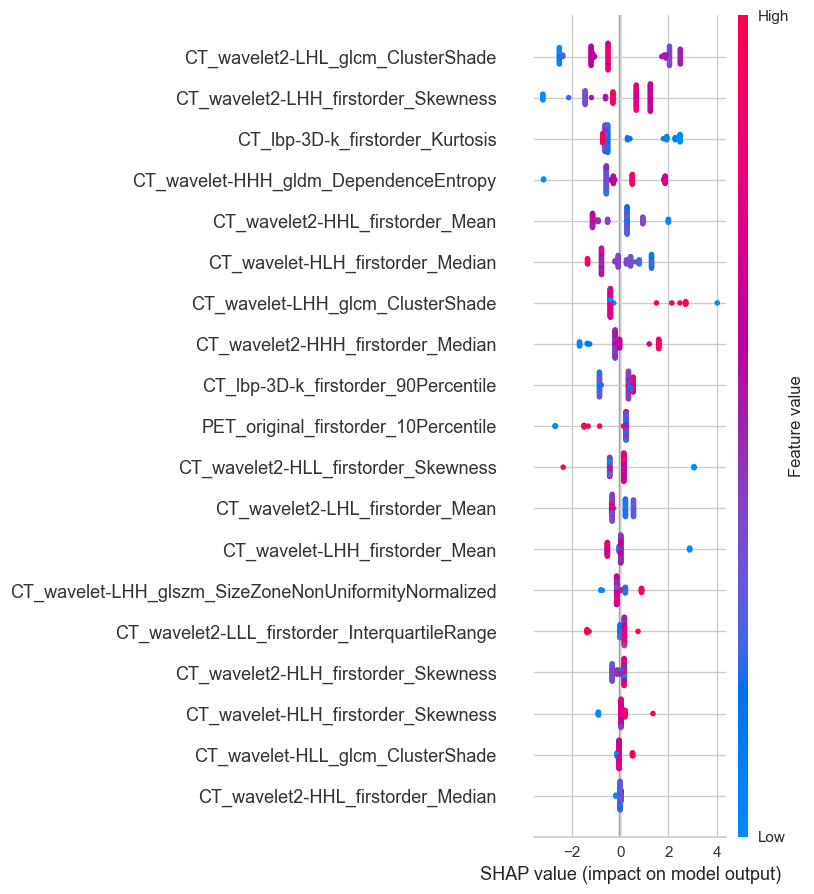

In [72]:

shap.summary_plot(shap_values, X_train)

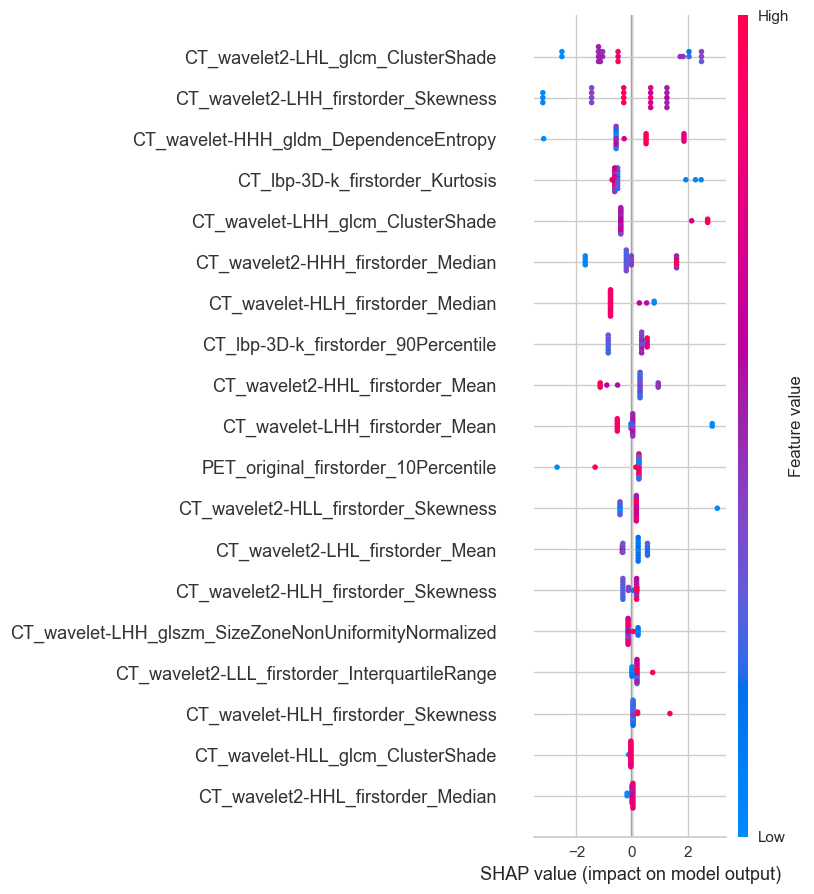

In [73]:
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [74]:
import shap
explainer = shap.TreeExplainer(cb_tuned)
shap_values = explainer.shap_values(X_test)

# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

In [75]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca--RF-CBC73', Save_format = 'csv',Save_type = 'col')

In [76]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca--RF-CBC73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR E19", "EGFR E21"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.67      0.73      0.70        11
    EGFR E21       0.67      0.60      0.63        10

    accuracy                           0.67        21
   macro avg       0.67      0.66      0.66        21
weighted avg       0.67      0.67      0.67        21

precision 0.6666666666666666 accuracy 0.6666666666666666 recall 0.6 auc 0.6636363636363637


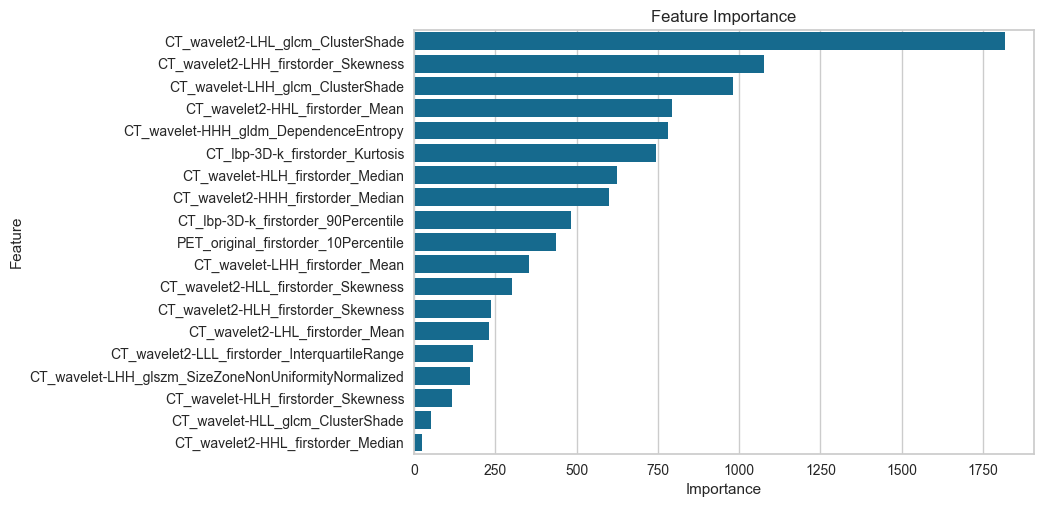

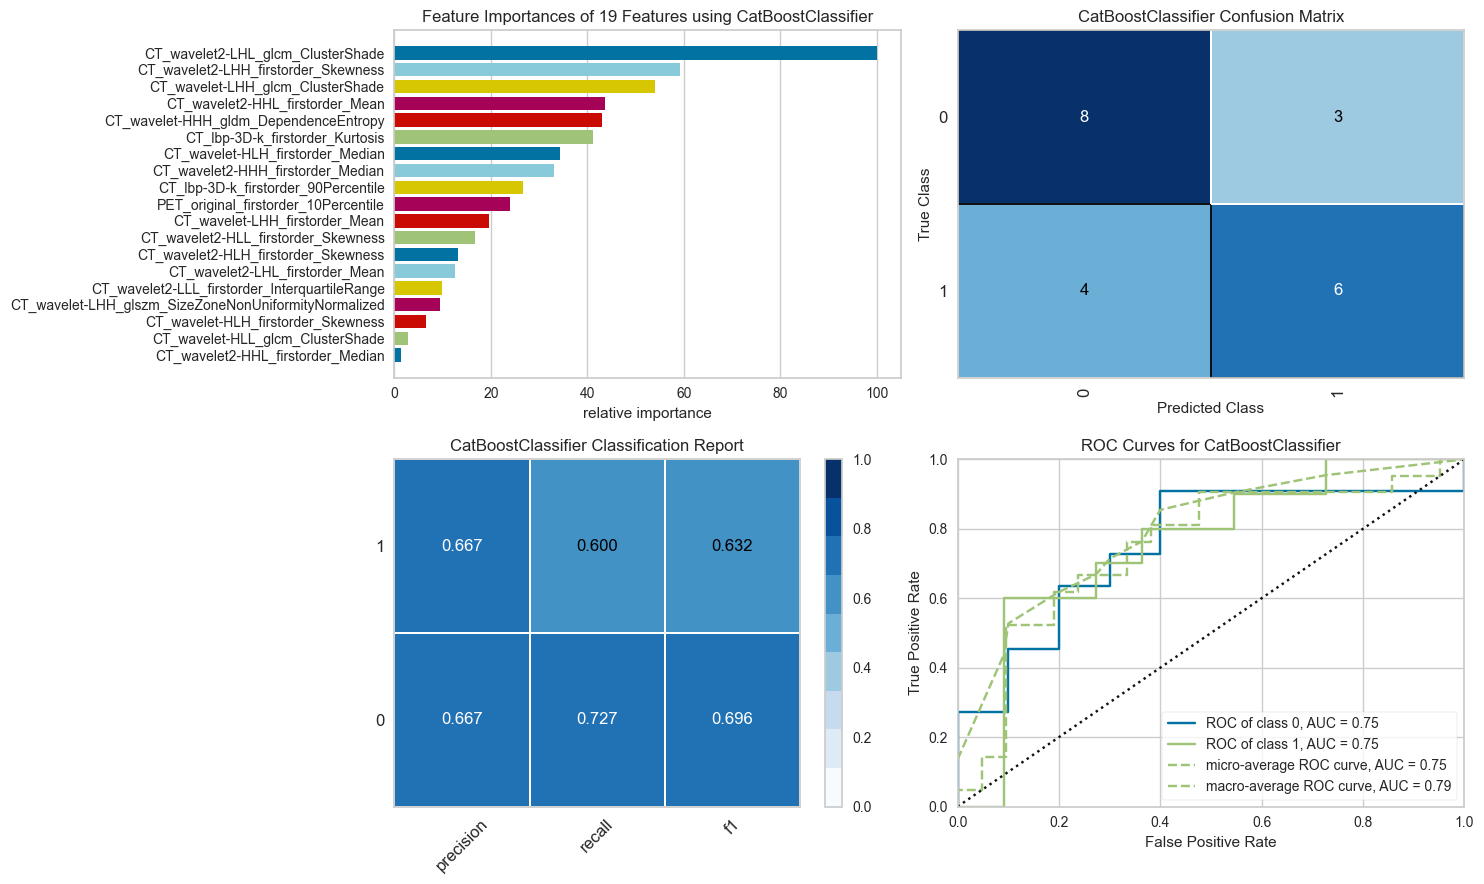

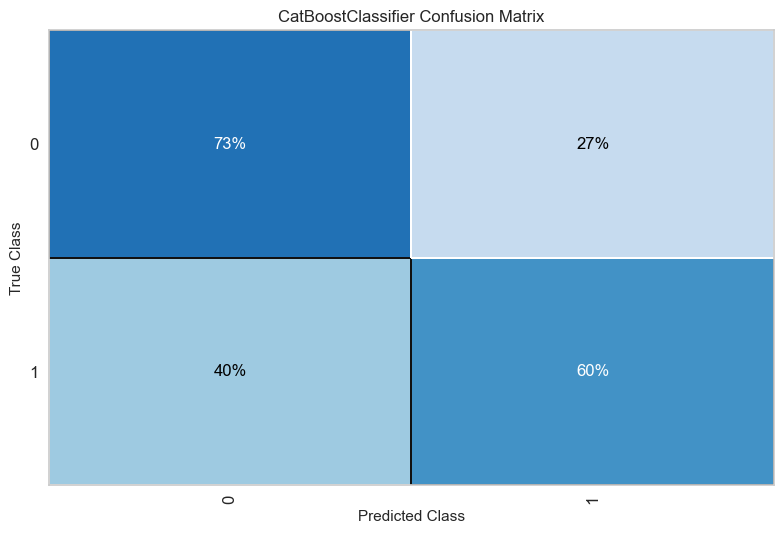

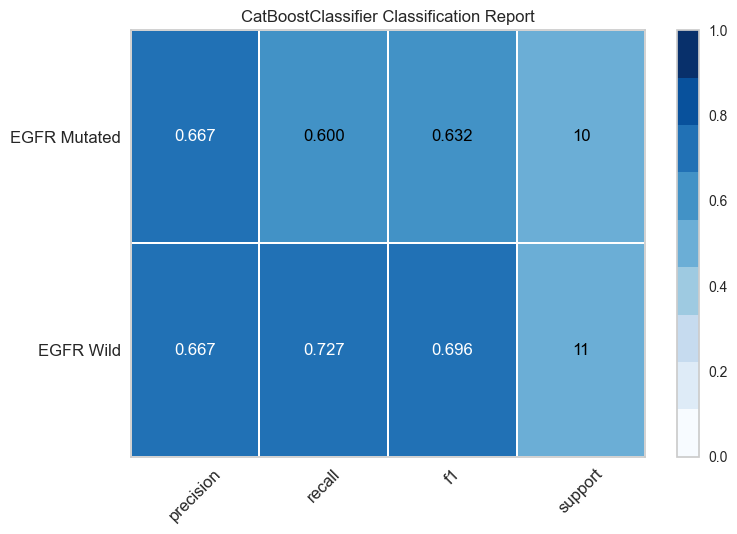

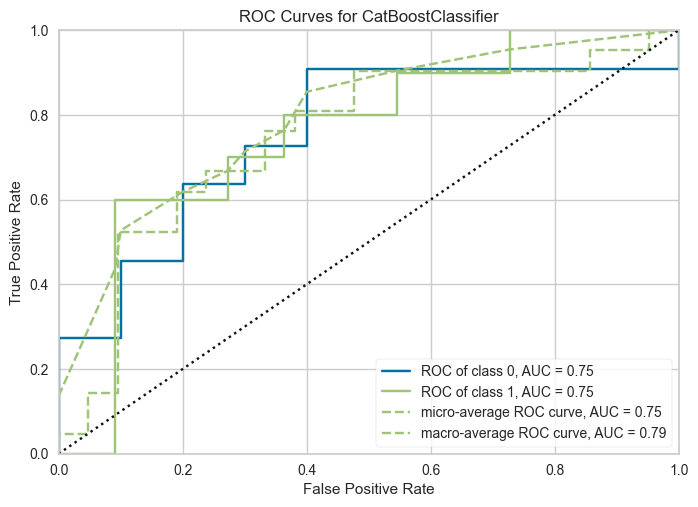

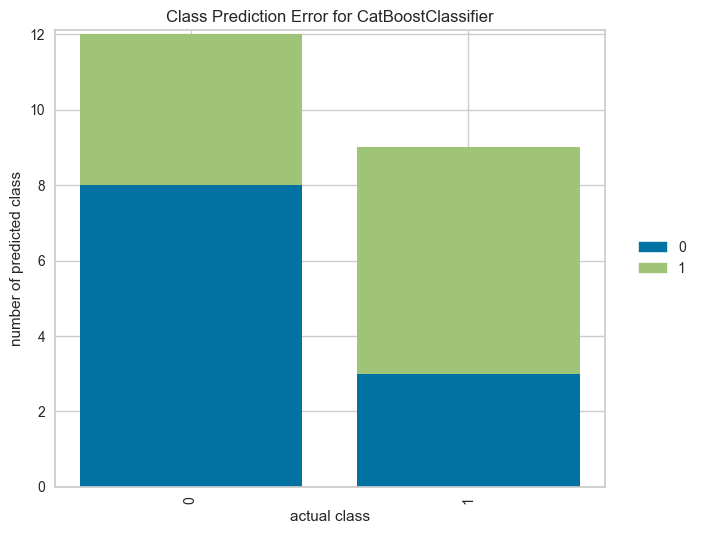

NameError: name 'X' is not defined

In [77]:
# Visualization of Results --> Feature Importances
cb_tuned1 = wrap(cb_tuned)
plot_feature_importances(cb_tuned1)
report_results_quickly(cb_tuned1)
plot_results(cb_tuned1)
plot_learning_curve(cb_tuned1)


In [83]:
# # AdaBoostClassifier # 0.883117

adb_model = AdaBoostClassifier()
adb_params = {"learning_rate": [0.001, 0.01,0.1, 0.2, 0.5],              
#               "subsample": [0.5, 0.9, 1.0],
              "n_estimators": [200,500,800,1000,2000,3000,5000]#,2000,3000,5000,10000
#               "max_features": [3,4,5],
#               "min_samples_split": [2, 5,7,8,9, 10,15,20, 30],
#               "max_depth": [1,2,3, None]
             } #,4, 5, 8

adb_cv_model = GridSearchCV(adb_model, adb_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
adb_cv_model.best_params_ # {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.9}

Fitting 10 folds for each of 35 candidates, totalling 350 fits


{'learning_rate': 0.2, 'n_estimators': 800}

In [84]:
# Final Model
adb_tuned = AdaBoostClassifier(**adb_cv_model.best_params_).fit(X_train, y_train)
y_pred = adb_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766

0.7142857142857143

In [85]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca--RF-ADB73', Save_format = 'csv',Save_type = 'col')

In [86]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca--RF-ADB73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR E19", "EGFR E21"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.69      0.82      0.75        11
    EGFR E21       0.75      0.60      0.67        10

    accuracy                           0.71        21
   macro avg       0.72      0.71      0.71        21
weighted avg       0.72      0.71      0.71        21

precision 0.75 accuracy 0.7142857142857143 recall 0.6 auc 0.7090909090909091


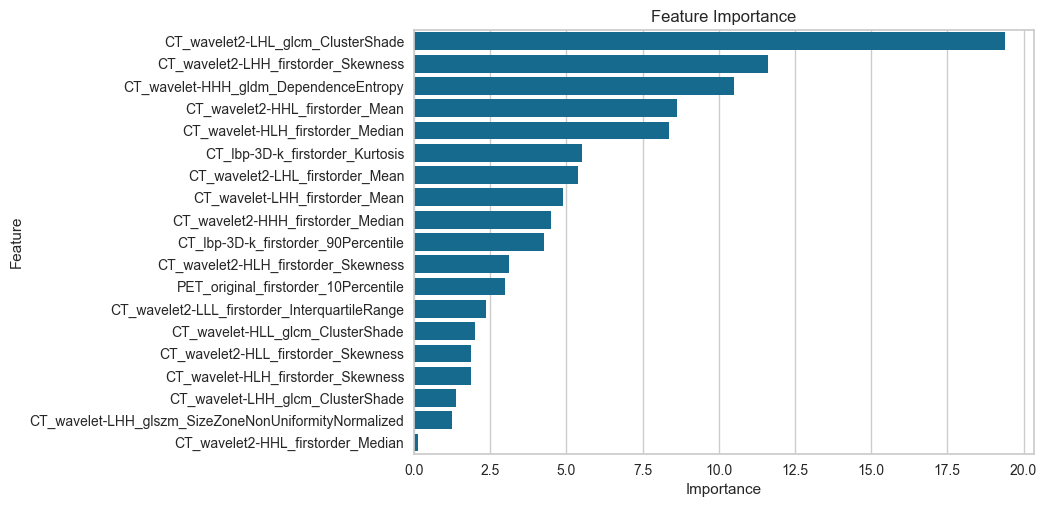

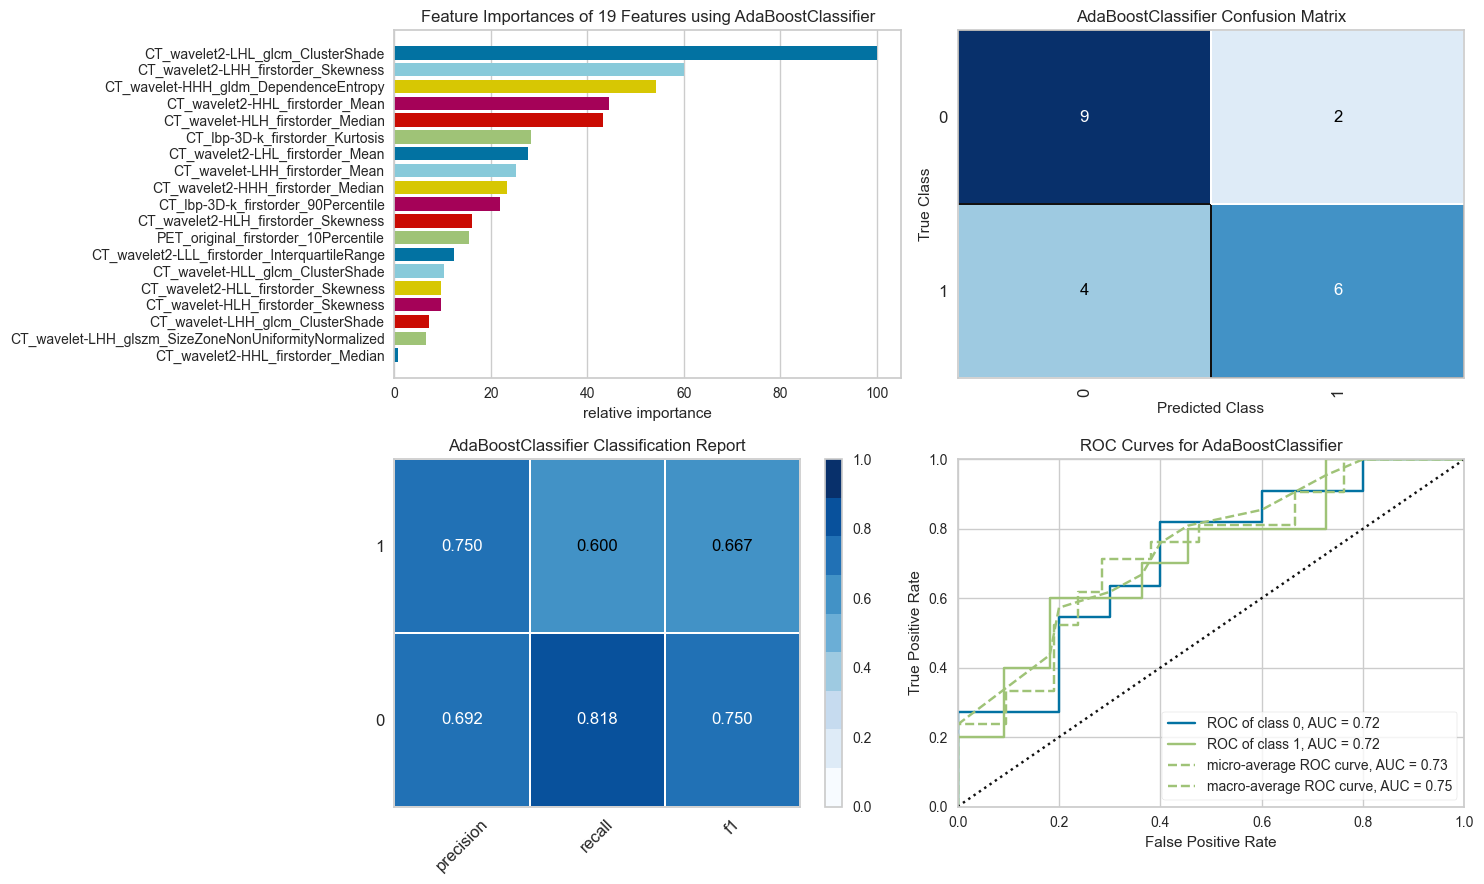

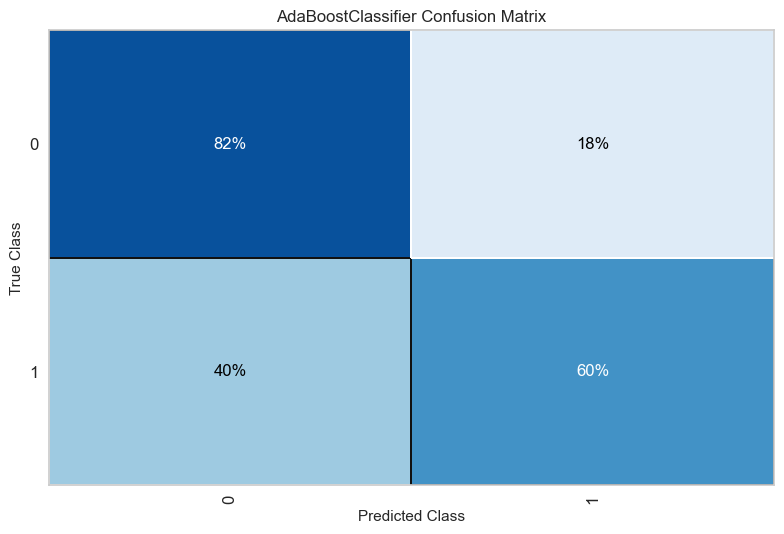

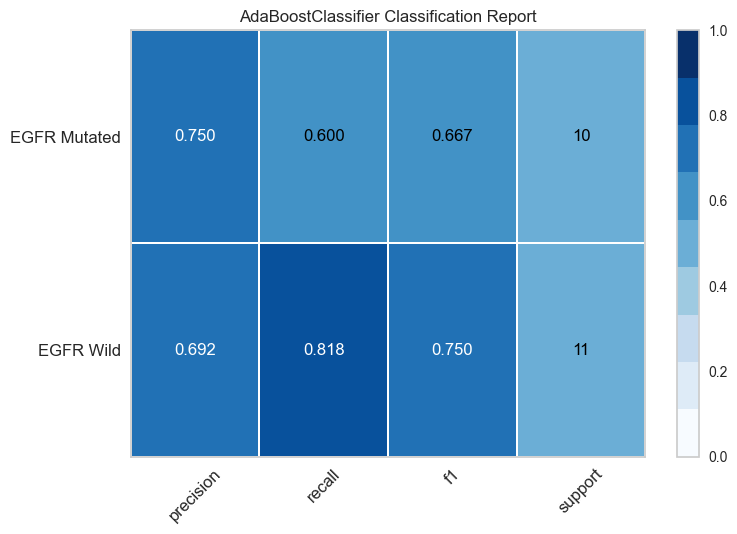

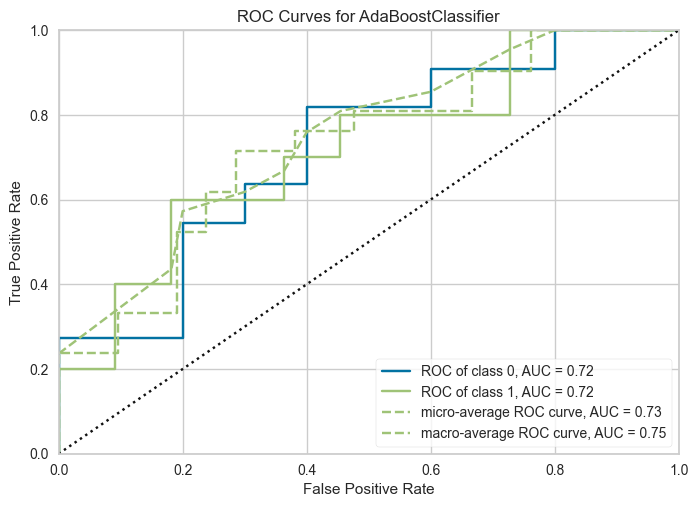

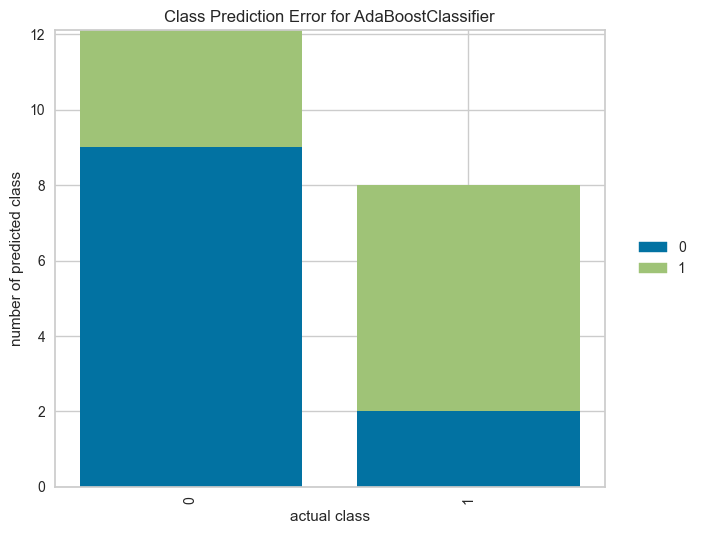

NameError: name 'X' is not defined

In [87]:
# # Visualization of Results --> Feature Importances
# # adb_tuned = wrap(adb_tuned)
plot_feature_importances(adb_tuned)
report_results_quickly(adb_tuned)
plot_results(adb_tuned)
plot_learning_curve(adb_tuned)

In [88]:
# # GradientBoostingClassifier # 0.883117

gbdt_model = GradientBoostingClassifier()
gbdt_params = {"learning_rate": [0.01, 0.1, 0.2, 0.5],              
              "subsample": [0.5, 0.6, 0.7,0.8],
              "n_estimators": [ 200,500,800,1000,2000,3000,5000]#
#               "max_features": [3,4,5],
#               "min_samples_split": [2, 5,7,8,9, 10,15,20, 30],
#               "max_depth": [1,2,3, None]
             } #,4, 5, 8

gbdt_cv_model = GridSearchCV(gbdt_model, gbdt_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
gbdt_cv_model.best_params_ # {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.9}

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


{'learning_rate': 0.2, 'n_estimators': 1000, 'subsample': 0.6}

In [89]:
# Final Model
gbdt_tuned = GradientBoostingClassifier(**gbdt_cv_model.best_params_).fit(X_train, y_train)
y_pred = gbdt_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766

0.6666666666666666

In [90]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca--RF-gbdt', Save_format = 'csv',Save_type = 'col')

In [91]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca--RF-gbdt.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR E19", "EGFR E21"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.67      0.73      0.70        11
    EGFR E21       0.67      0.60      0.63        10

    accuracy                           0.67        21
   macro avg       0.67      0.66      0.66        21
weighted avg       0.67      0.67      0.67        21

precision 0.6666666666666666 accuracy 0.6666666666666666 recall 0.6 auc 0.6636363636363637


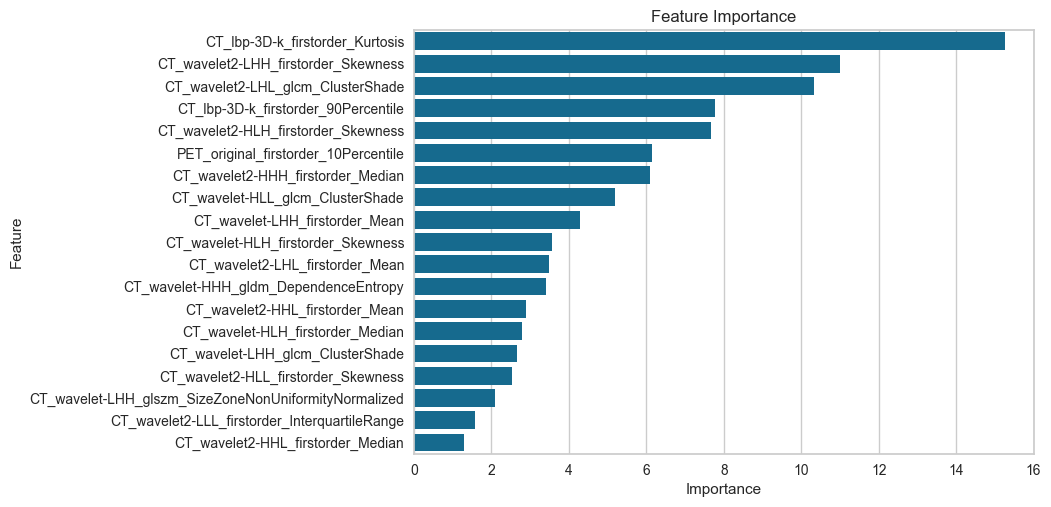

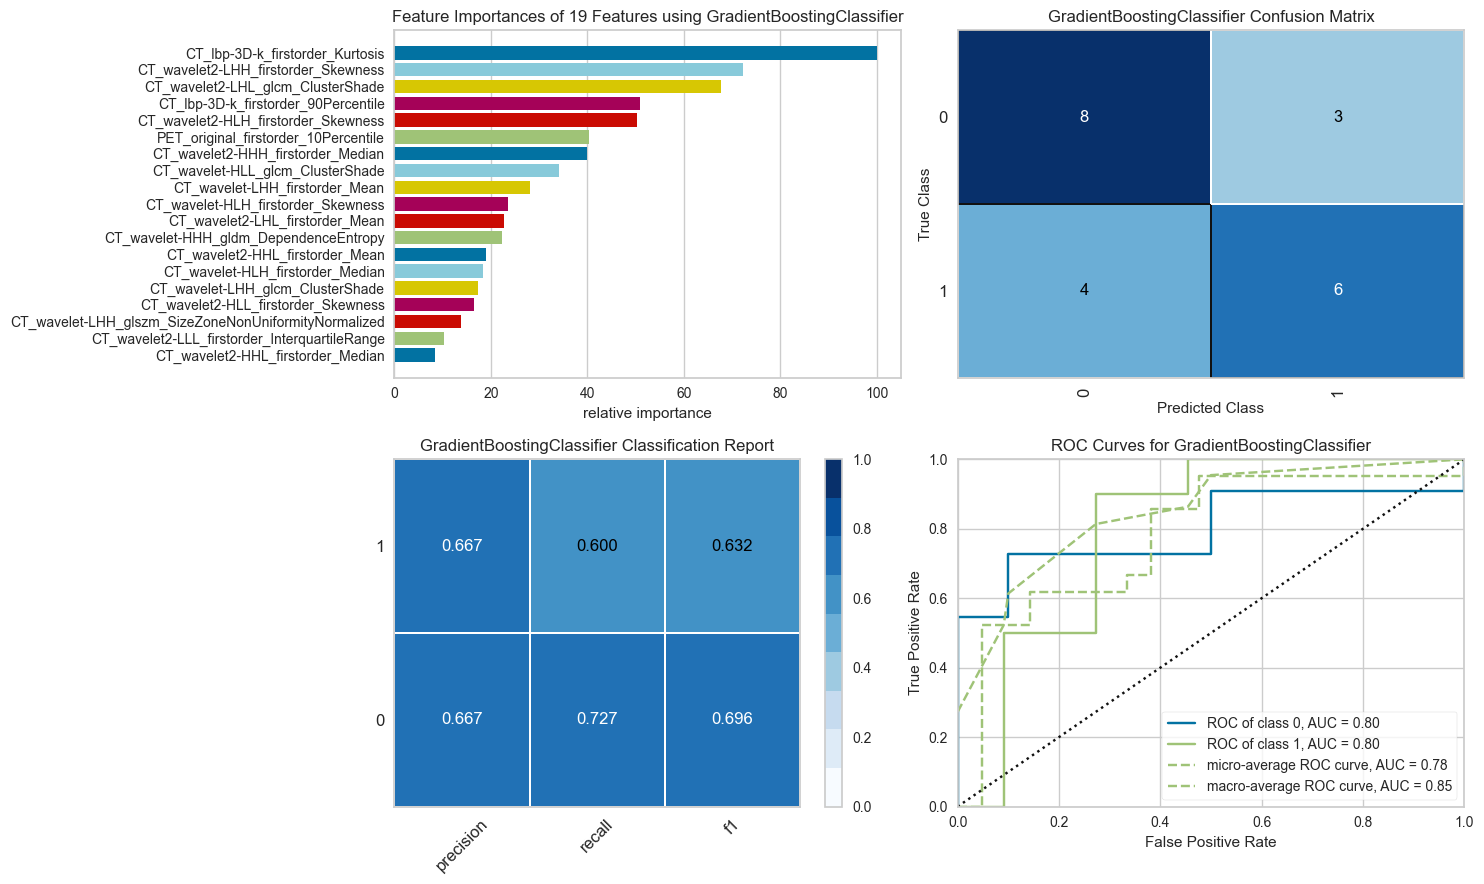

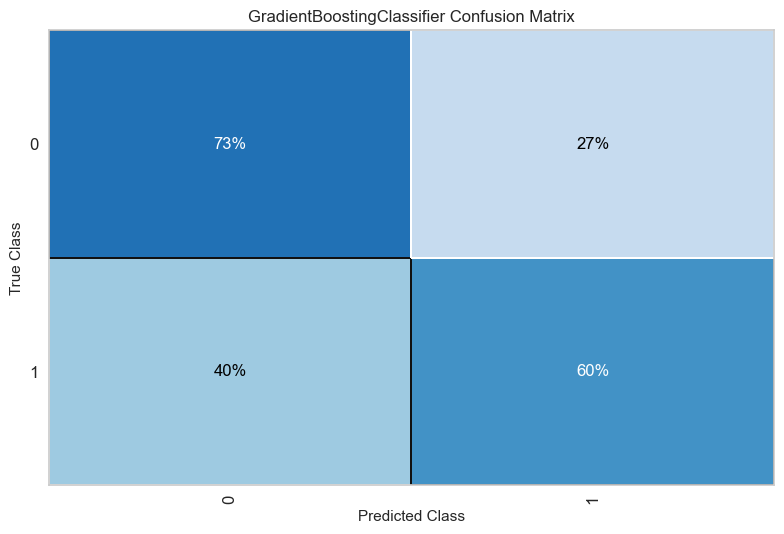

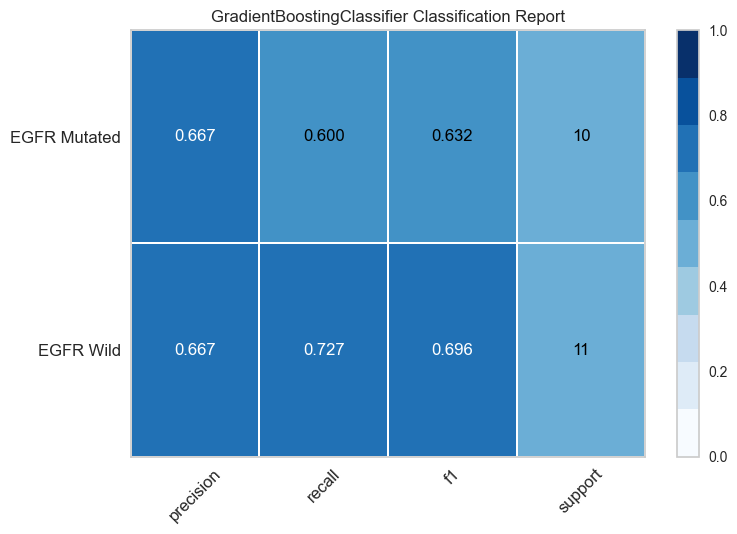

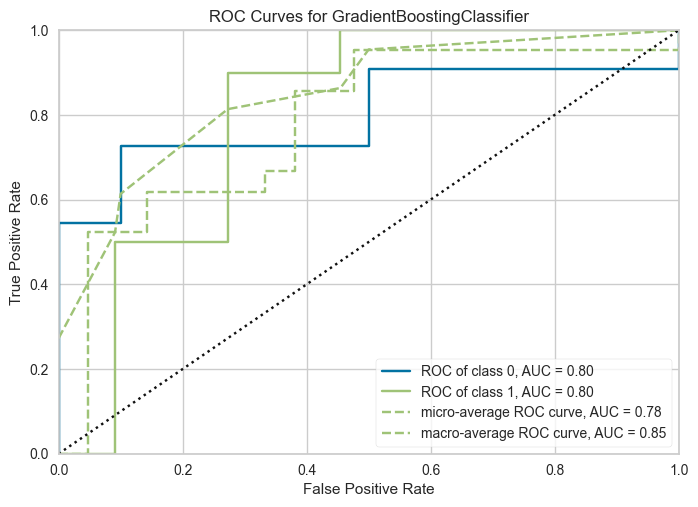

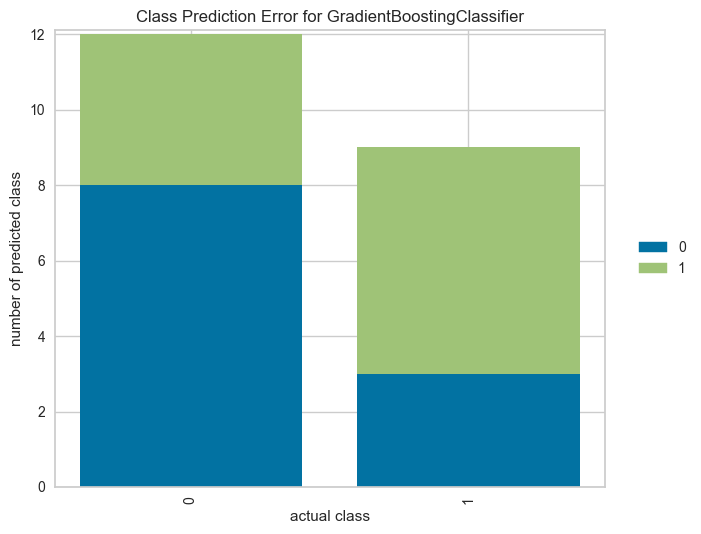

NameError: name 'X' is not defined

In [92]:
# # Visualization of Results --> Feature Importances
# # ngb_tuned = wrap(ngb_tuned)
plot_feature_importances(gbdt_tuned)

report_results_quickly(gbdt_tuned)
plot_results(gbdt_tuned)
plot_learning_curve(gbdt_tuned)

In [93]:
# XGBClassifier # 0.883117

xgb_model = XGBClassifier(random_state=42)
xgb_params = {"learning_rate": [0.01, 0.1, 0.2, 0.5],              
              "subsample": [0.5, 0.9, 1.0],
              "n_estimators": [ 500,1000,2000,3000,5000,10000],
#               "max_features": [3,4,5],
#               "min_samples_split": [2, 5,7,8,9, 10,15,20, 30],
              "max_depth": [1,2,3,4, 5, 8, None]}

xgb_cv_model = GridSearchCV(xgb_model, xgb_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
xgb_cv_model.best_params_ # {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 2000, 'subsample': 0.5}

Fitting 10 folds for each of 504 candidates, totalling 5040 fits


{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 2000, 'subsample': 1.0}

In [94]:
# Final Model
xgb_tuned = XGBClassifier(**xgb_cv_model.best_params_).fit(X_train, y_train)
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766


0.5714285714285714

In [95]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-RF-XGB73', Save_format = 'csv',Save_type = 'col')

In [96]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-RF-XGB73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR E19", "EGFR E21"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.57      0.73      0.64        11
    EGFR E21       0.57      0.40      0.47        10

    accuracy                           0.57        21
   macro avg       0.57      0.56      0.56        21
weighted avg       0.57      0.57      0.56        21

precision 0.5714285714285714 accuracy 0.5714285714285714 recall 0.4 auc 0.5636363636363636


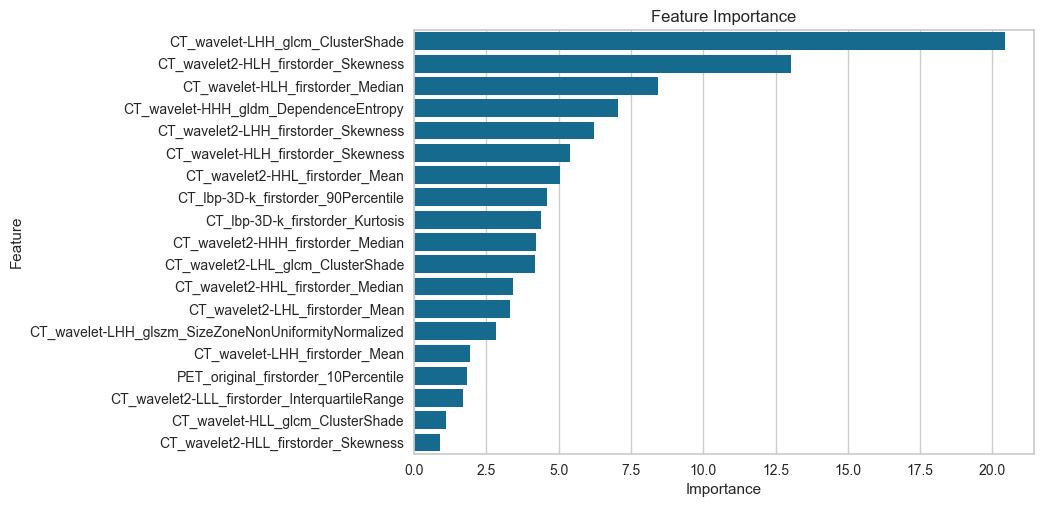

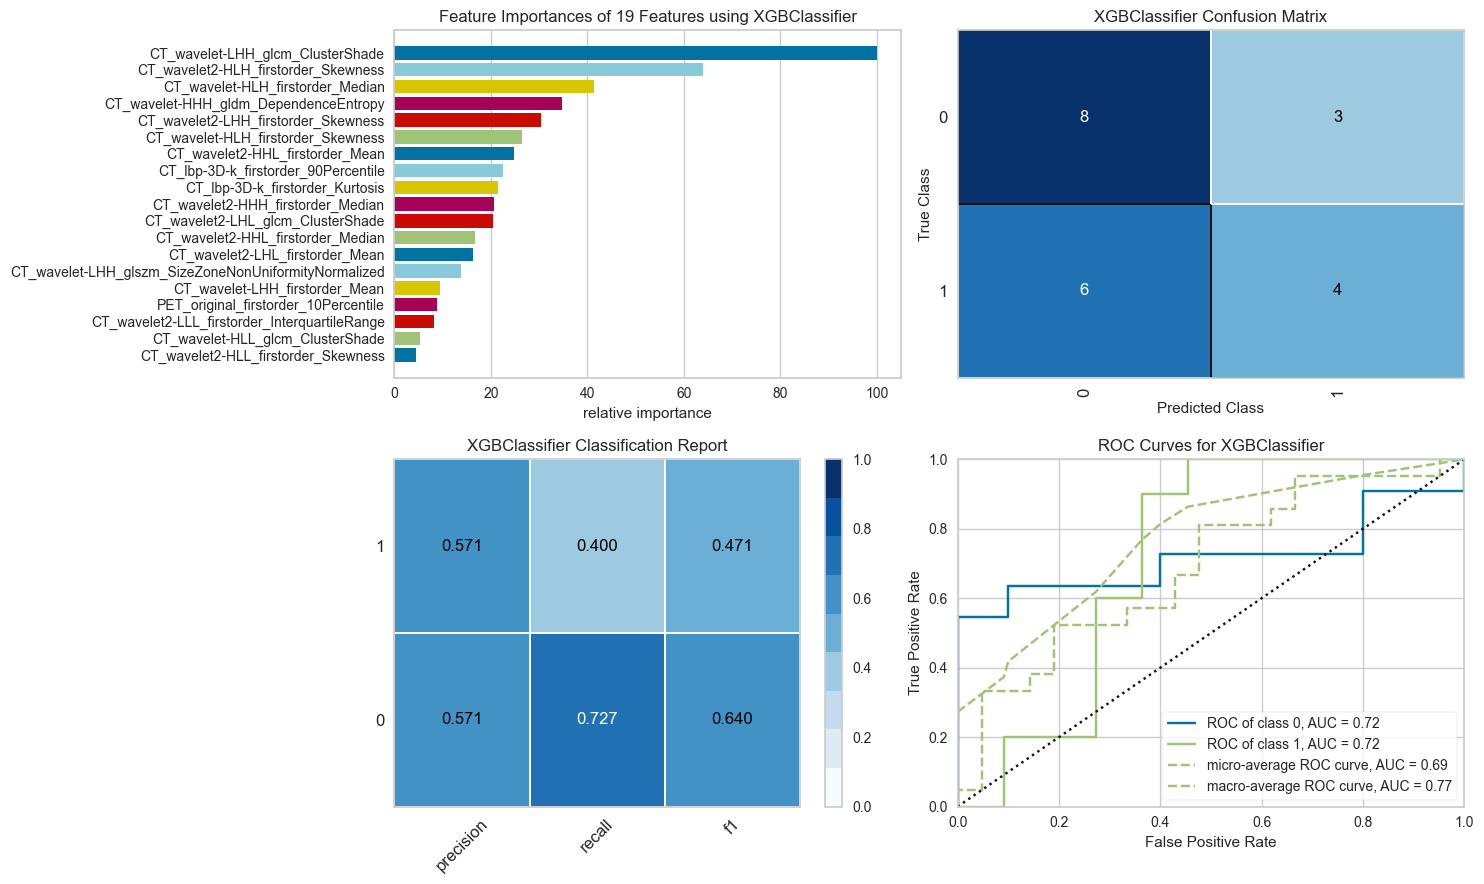

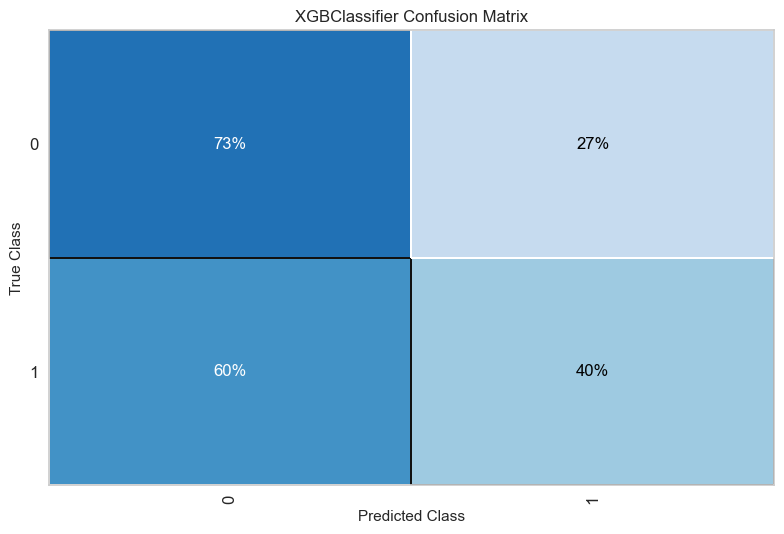

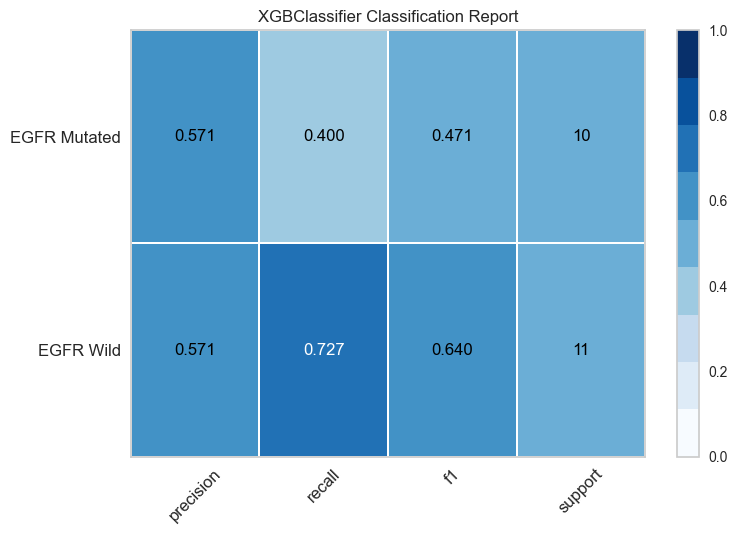

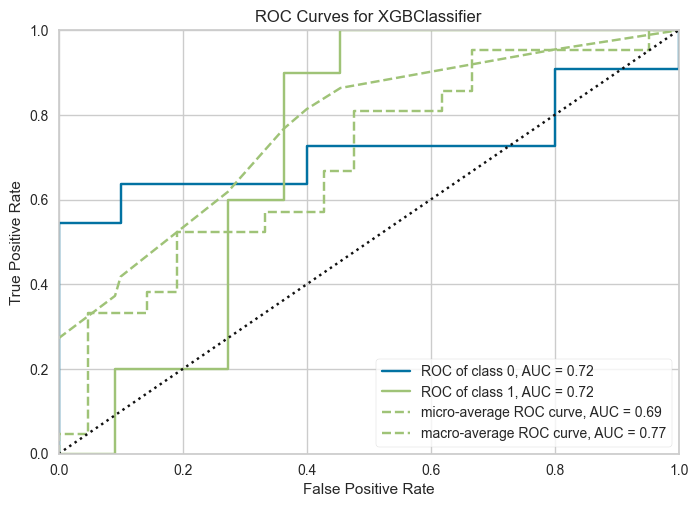

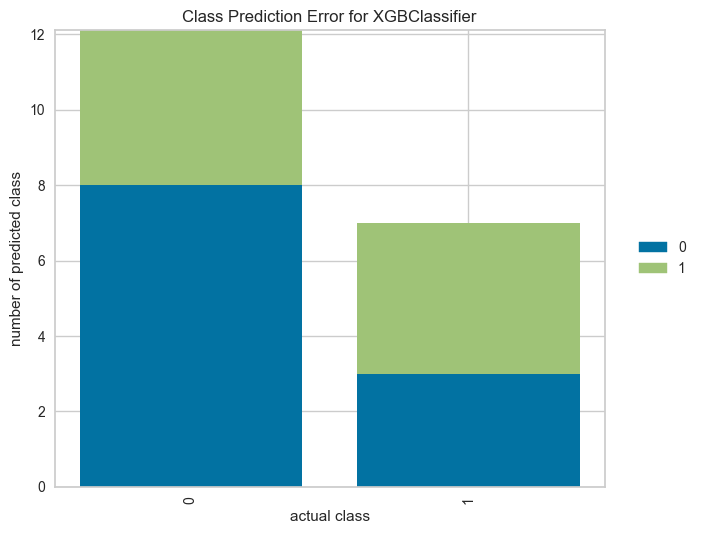

In [97]:
# Visualization of Results --> Feature Importances
plot_feature_importances(xgb_tuned)
report_results_quickly(xgb_tuned)
plot_results(xgb_tuned)
# plot_learning_curve(xgb_tuned)

In [98]:
# LightGBMClassifier # 0.857143

lgbm_model = LGBMClassifier(random_state=42)
lgbm_params = {"learning_rate": [0.01, 0.03, 0.05, 0.1, 0.2,0.5],
               "n_estimators": [200,500, 800,1000, 1500,2000,3000,5000],
               "max_depth": [1,2,3,4, 5,6, 8,None]}

lgbm_cv_model = GridSearchCV(lgbm_model, lgbm_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
lgbm_cv_model.best_params_ # {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 500}

Fitting 10 folds for each of 384 candidates, totalling 3840 fits
[LightGBM] [Info] Number of positive: 41, number of negative: 42
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000112 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 558
[LightGBM] [Info] Number of data points in the train set: 83, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.493976 -> initscore=-0.024098
[LightGBM] [Info] Start training from score -0.024098


{'learning_rate': 0.05, 'max_depth': 1, 'n_estimators': 800}

In [99]:
# Final Model
lgbm_tuned = LGBMClassifier(**lgbm_cv_model.best_params_).fit(X_train, y_train)
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766


[LightGBM] [Info] Number of positive: 41, number of negative: 42
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000103 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 558
[LightGBM] [Info] Number of data points in the train set: 83, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.493976 -> initscore=-0.024098
[LightGBM] [Info] Start training from score -0.024098


0.6190476190476191

In [100]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-RF-lgb73', Save_format = 'csv',Save_type = 'col')

In [101]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-RF-lgb73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR E19", "EGFR E21"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.62      0.73      0.67        11
    EGFR E21       0.62      0.50      0.56        10

    accuracy                           0.62        21
   macro avg       0.62      0.61      0.61        21
weighted avg       0.62      0.62      0.61        21

precision 0.625 accuracy 0.6190476190476191 recall 0.5 auc 0.6136363636363635


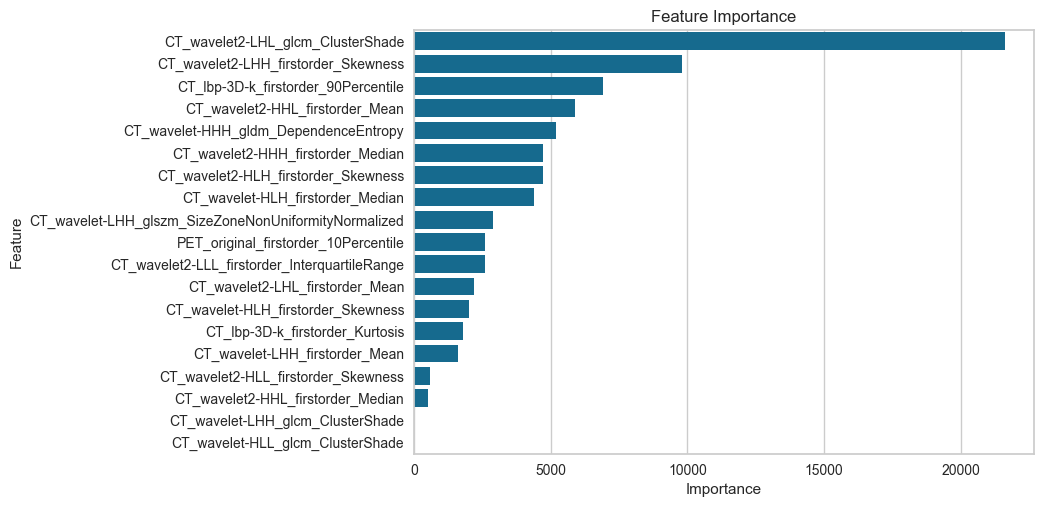

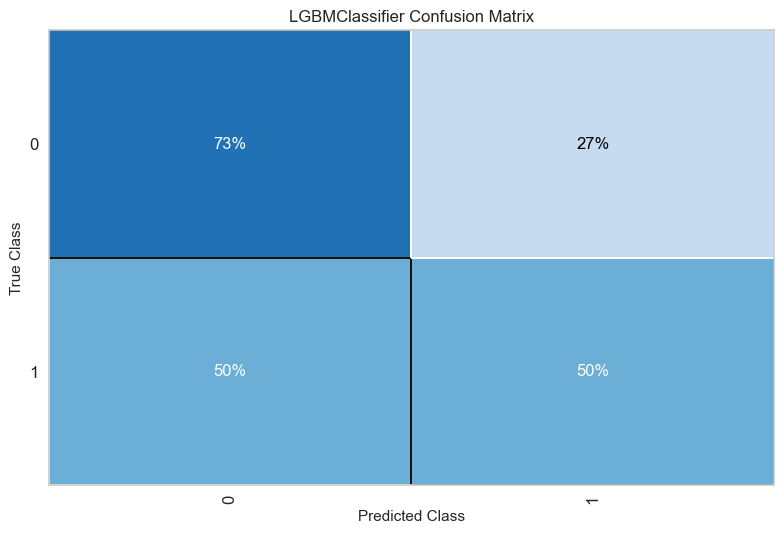

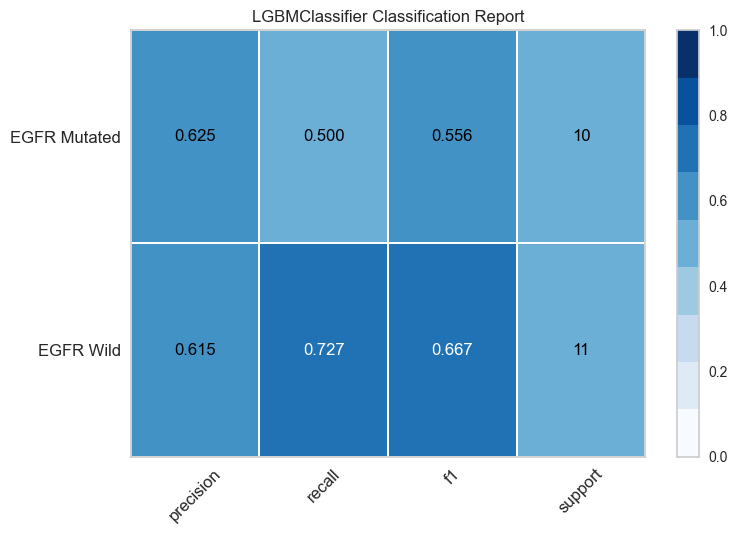

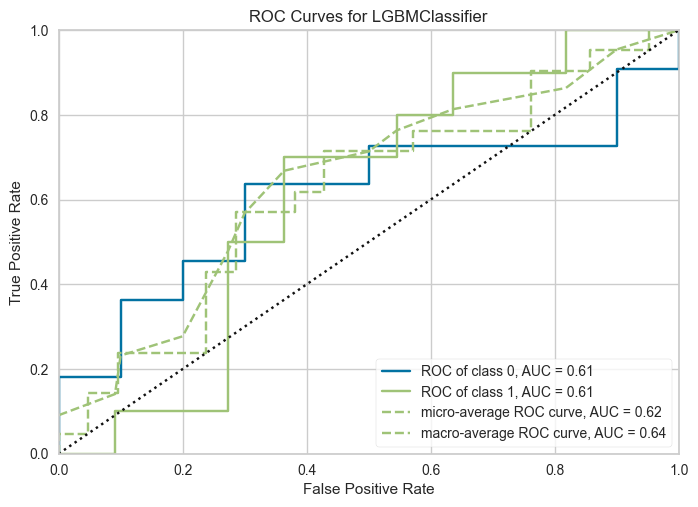

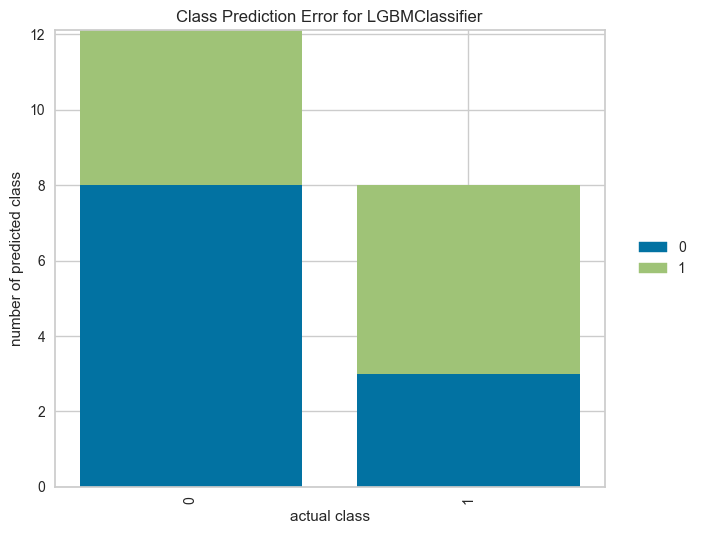

In [102]:
# Visualization of Results --> Feature Importances
plot_feature_importances(lgbm_tuned)
# report_results_quickly(lgbm_tuned)
plot_results(lgbm_tuned)
# plot_learning_curve(lgbm_tuned)

In [103]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(lgbm_tuned)
shap_values = explainer.shap_values(X_train)




In [104]:
# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

TypeError: list indices must be integers or slices, not tuple

In [105]:
shap.dependence_plot(y_train, shap_values, X_train)

TypeError: The passed shap_values are a list not an array! If you have a list of explanations try passing shap_values[0] instead to explain the first output class of a multi-output model.

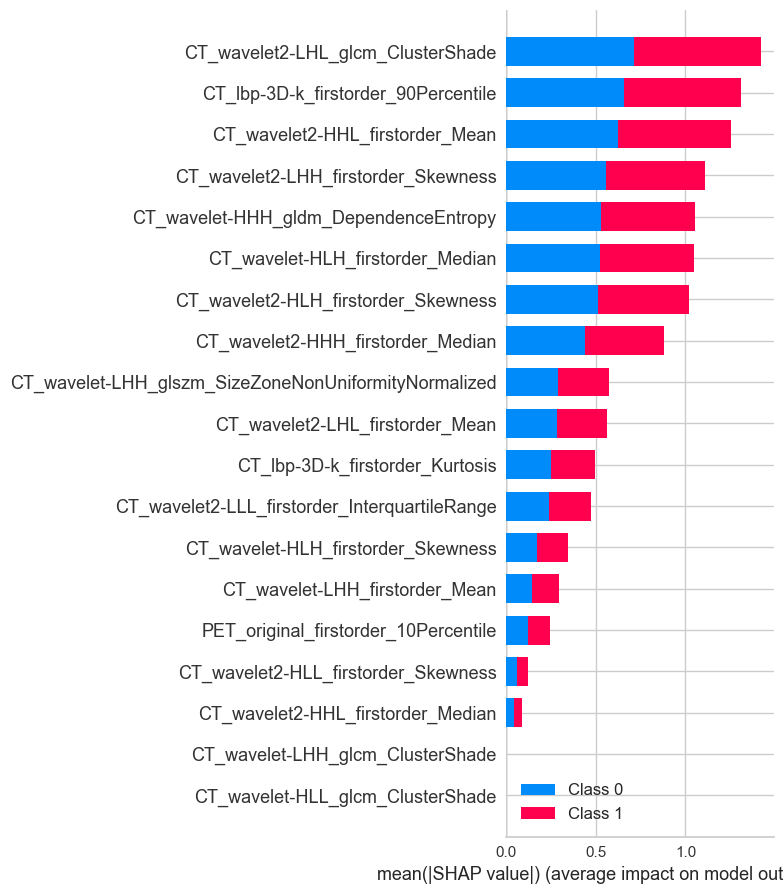

In [106]:
shap.summary_plot(shap_values, X_train)

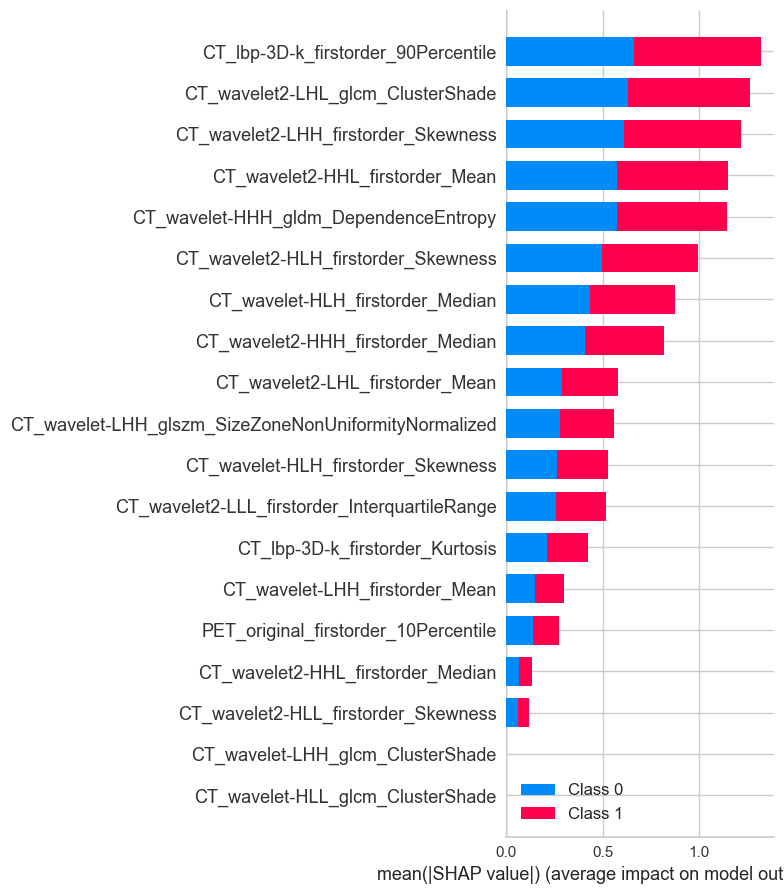

In [107]:
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [108]:
import shap
explainer = shap.TreeExplainer(lgbm_tuned)
shap_values = explainer.shap_values(X_test)


In [109]:
# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

TypeError: list indices must be integers or slices, not tuple

################ Accuracy scores for test set for the models: ################

LogisticRegression: 0.459091
RF: 0.568182
XGBoost: 0.563636
[LightGBM] [Info] Number of positive: 41, number of negative: 42
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000101 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 558
[LightGBM] [Info] Number of data points in the train set: 83, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.493976 -> initscore=-0.024098
[LightGBM] [Info] Start training from score -0.024098
LightGBM: 0.613636
0:	learn: 0.6861351	total: 1.12ms	remaining: 2.23s
1:	learn: 0.6796787	total: 2.31ms	remaining: 2.31s
2:	learn: 0.6634577	total: 3.37ms	remaining: 2.24s
3:	learn: 0.6556909	total: 4.36ms	remaining: 2.17s
4:	learn: 0.6527526	total: 5.46ms	remaining: 2.18s
5:	learn: 0.6459921	total: 6.46ms	remaining: 2.15s
6:	learn: 0.6365234	total: 7.41ms	remaining: 2.11s


157:	learn: 0.2724560	total: 150ms	remaining: 1.75s
158:	learn: 0.2714886	total: 151ms	remaining: 1.75s
159:	learn: 0.2704045	total: 152ms	remaining: 1.75s
160:	learn: 0.2691968	total: 154ms	remaining: 1.75s
161:	learn: 0.2687334	total: 155ms	remaining: 1.76s
162:	learn: 0.2665912	total: 156ms	remaining: 1.76s
163:	learn: 0.2653865	total: 157ms	remaining: 1.76s
164:	learn: 0.2641905	total: 158ms	remaining: 1.76s
165:	learn: 0.2628270	total: 159ms	remaining: 1.76s
166:	learn: 0.2618990	total: 161ms	remaining: 1.76s
167:	learn: 0.2607979	total: 162ms	remaining: 1.76s
168:	learn: 0.2598570	total: 163ms	remaining: 1.76s
169:	learn: 0.2594415	total: 164ms	remaining: 1.76s
170:	learn: 0.2582798	total: 165ms	remaining: 1.76s
171:	learn: 0.2572536	total: 166ms	remaining: 1.76s
172:	learn: 0.2568451	total: 167ms	remaining: 1.76s
173:	learn: 0.2558553	total: 168ms	remaining: 1.76s
174:	learn: 0.2554531	total: 169ms	remaining: 1.76s
175:	learn: 0.2544949	total: 170ms	remaining: 1.76s
176:	learn: 

486:	learn: 0.1001710	total: 503ms	remaining: 1.56s
487:	learn: 0.1000968	total: 504ms	remaining: 1.56s
488:	learn: 0.0998465	total: 505ms	remaining: 1.56s
489:	learn: 0.0997720	total: 506ms	remaining: 1.56s
490:	learn: 0.0994789	total: 507ms	remaining: 1.56s
491:	learn: 0.0991462	total: 508ms	remaining: 1.56s
492:	learn: 0.0990738	total: 509ms	remaining: 1.56s
493:	learn: 0.0990034	total: 510ms	remaining: 1.55s
494:	learn: 0.0987085	total: 511ms	remaining: 1.55s
495:	learn: 0.0984006	total: 512ms	remaining: 1.55s
496:	learn: 0.0981750	total: 513ms	remaining: 1.55s
497:	learn: 0.0979536	total: 514ms	remaining: 1.55s
498:	learn: 0.0977820	total: 515ms	remaining: 1.55s
499:	learn: 0.0977134	total: 516ms	remaining: 1.55s
500:	learn: 0.0976460	total: 517ms	remaining: 1.55s
501:	learn: 0.0974310	total: 518ms	remaining: 1.55s
502:	learn: 0.0971380	total: 519ms	remaining: 1.54s
503:	learn: 0.0967017	total: 520ms	remaining: 1.54s
504:	learn: 0.0963535	total: 521ms	remaining: 1.54s
505:	learn: 

793:	learn: 0.0539691	total: 866ms	remaining: 1.31s
794:	learn: 0.0538646	total: 868ms	remaining: 1.31s
795:	learn: 0.0537232	total: 869ms	remaining: 1.31s
796:	learn: 0.0537014	total: 870ms	remaining: 1.31s
797:	learn: 0.0535830	total: 872ms	remaining: 1.31s
798:	learn: 0.0534325	total: 873ms	remaining: 1.31s
799:	learn: 0.0533897	total: 874ms	remaining: 1.31s
800:	learn: 0.0532534	total: 875ms	remaining: 1.31s
801:	learn: 0.0531587	total: 877ms	remaining: 1.31s
802:	learn: 0.0530155	total: 878ms	remaining: 1.31s
803:	learn: 0.0528801	total: 879ms	remaining: 1.31s
804:	learn: 0.0527356	total: 881ms	remaining: 1.31s
805:	learn: 0.0526845	total: 882ms	remaining: 1.31s
806:	learn: 0.0525304	total: 884ms	remaining: 1.31s
807:	learn: 0.0523738	total: 886ms	remaining: 1.31s
808:	learn: 0.0522428	total: 887ms	remaining: 1.31s
809:	learn: 0.0520999	total: 889ms	remaining: 1.31s
810:	learn: 0.0519452	total: 891ms	remaining: 1.31s
811:	learn: 0.0517959	total: 893ms	remaining: 1.31s
812:	learn: 

1111:	learn: 0.0328144	total: 1.23s	remaining: 982ms
1112:	learn: 0.0328050	total: 1.23s	remaining: 981ms
1113:	learn: 0.0327874	total: 1.23s	remaining: 980ms
1114:	learn: 0.0327703	total: 1.23s	remaining: 979ms
1115:	learn: 0.0327611	total: 1.23s	remaining: 978ms
1116:	learn: 0.0327261	total: 1.24s	remaining: 977ms
1117:	learn: 0.0326444	total: 1.24s	remaining: 976ms
1118:	learn: 0.0326210	total: 1.24s	remaining: 974ms
1119:	learn: 0.0325563	total: 1.24s	remaining: 973ms
1120:	learn: 0.0325324	total: 1.24s	remaining: 972ms
1121:	learn: 0.0324616	total: 1.24s	remaining: 971ms
1122:	learn: 0.0323810	total: 1.24s	remaining: 970ms
1123:	learn: 0.0322988	total: 1.24s	remaining: 969ms
1124:	learn: 0.0322757	total: 1.24s	remaining: 967ms
1125:	learn: 0.0322080	total: 1.24s	remaining: 966ms
1126:	learn: 0.0321701	total: 1.25s	remaining: 965ms
1127:	learn: 0.0321473	total: 1.25s	remaining: 964ms
1128:	learn: 0.0320674	total: 1.25s	remaining: 963ms
1129:	learn: 0.0320120	total: 1.25s	remaining:

1283:	learn: 0.0266650	total: 1.41s	remaining: 788ms
1284:	learn: 0.0266593	total: 1.42s	remaining: 787ms
1285:	learn: 0.0266210	total: 1.42s	remaining: 787ms
1286:	learn: 0.0266150	total: 1.42s	remaining: 786ms
1287:	learn: 0.0265491	total: 1.42s	remaining: 785ms
1288:	learn: 0.0264927	total: 1.42s	remaining: 784ms
1289:	learn: 0.0264791	total: 1.42s	remaining: 783ms
1290:	learn: 0.0264558	total: 1.42s	remaining: 782ms
1291:	learn: 0.0263947	total: 1.42s	remaining: 780ms
1292:	learn: 0.0263915	total: 1.43s	remaining: 779ms
1293:	learn: 0.0263744	total: 1.43s	remaining: 778ms
1294:	learn: 0.0263685	total: 1.43s	remaining: 777ms
1295:	learn: 0.0263626	total: 1.43s	remaining: 776ms
1296:	learn: 0.0263567	total: 1.43s	remaining: 775ms
1297:	learn: 0.0263373	total: 1.43s	remaining: 774ms
1298:	learn: 0.0263072	total: 1.43s	remaining: 773ms
1299:	learn: 0.0262573	total: 1.43s	remaining: 771ms
1300:	learn: 0.0262128	total: 1.43s	remaining: 770ms
1301:	learn: 0.0262055	total: 1.43s	remaining:

1444:	learn: 0.0226537	total: 1.59s	remaining: 611ms
1445:	learn: 0.0226291	total: 1.59s	remaining: 610ms
1446:	learn: 0.0225988	total: 1.59s	remaining: 609ms
1447:	learn: 0.0225781	total: 1.59s	remaining: 608ms
1448:	learn: 0.0225393	total: 1.6s	remaining: 607ms
1449:	learn: 0.0225351	total: 1.6s	remaining: 606ms
1450:	learn: 0.0224815	total: 1.6s	remaining: 605ms
1451:	learn: 0.0224258	total: 1.6s	remaining: 604ms
1452:	learn: 0.0224128	total: 1.6s	remaining: 603ms
1453:	learn: 0.0224087	total: 1.6s	remaining: 602ms
1454:	learn: 0.0224088	total: 1.6s	remaining: 600ms
1455:	learn: 0.0224054	total: 1.6s	remaining: 599ms
1456:	learn: 0.0224017	total: 1.6s	remaining: 598ms
1457:	learn: 0.0223848	total: 1.6s	remaining: 597ms
1458:	learn: 0.0223801	total: 1.61s	remaining: 596ms
1459:	learn: 0.0223764	total: 1.61s	remaining: 595ms
1460:	learn: 0.0223724	total: 1.61s	remaining: 594ms
1461:	learn: 0.0223685	total: 1.61s	remaining: 593ms
1462:	learn: 0.0223140	total: 1.61s	remaining: 592ms
146

1630:	learn: 0.0205400	total: 1.77s	remaining: 401ms
1631:	learn: 0.0205400	total: 1.77s	remaining: 400ms
1632:	learn: 0.0205400	total: 1.77s	remaining: 399ms
1633:	learn: 0.0205400	total: 1.77s	remaining: 397ms
1634:	learn: 0.0205400	total: 1.77s	remaining: 396ms
1635:	learn: 0.0205400	total: 1.77s	remaining: 395ms
1636:	learn: 0.0205400	total: 1.78s	remaining: 394ms
1637:	learn: 0.0205400	total: 1.78s	remaining: 393ms
1638:	learn: 0.0205400	total: 1.78s	remaining: 392ms
1639:	learn: 0.0205400	total: 1.78s	remaining: 390ms
1640:	learn: 0.0205400	total: 1.78s	remaining: 389ms
1641:	learn: 0.0205400	total: 1.78s	remaining: 388ms
1642:	learn: 0.0205400	total: 1.78s	remaining: 387ms
1643:	learn: 0.0205400	total: 1.78s	remaining: 386ms
1644:	learn: 0.0205400	total: 1.78s	remaining: 385ms
1645:	learn: 0.0205400	total: 1.78s	remaining: 383ms
1646:	learn: 0.0205400	total: 1.78s	remaining: 382ms
1647:	learn: 0.0205400	total: 1.78s	remaining: 381ms
1648:	learn: 0.0205400	total: 1.78s	remaining:

1876:	learn: 0.0205400	total: 1.95s	remaining: 128ms
1877:	learn: 0.0205400	total: 1.95s	remaining: 127ms
1878:	learn: 0.0205400	total: 1.95s	remaining: 126ms
1879:	learn: 0.0205400	total: 1.95s	remaining: 124ms
1880:	learn: 0.0205400	total: 1.95s	remaining: 123ms
1881:	learn: 0.0205400	total: 1.95s	remaining: 122ms
1882:	learn: 0.0205400	total: 1.95s	remaining: 121ms
1883:	learn: 0.0205400	total: 1.95s	remaining: 120ms
1884:	learn: 0.0205400	total: 1.95s	remaining: 119ms
1885:	learn: 0.0205400	total: 1.95s	remaining: 118ms
1886:	learn: 0.0205400	total: 1.95s	remaining: 117ms
1887:	learn: 0.0205400	total: 1.96s	remaining: 116ms
1888:	learn: 0.0205400	total: 1.96s	remaining: 115ms
1889:	learn: 0.0205400	total: 1.96s	remaining: 114ms
1890:	learn: 0.0205400	total: 1.96s	remaining: 113ms
1891:	learn: 0.0205400	total: 1.96s	remaining: 112ms
1892:	learn: 0.0205400	total: 1.96s	remaining: 111ms
1893:	learn: 0.0205400	total: 1.96s	remaining: 110ms
1894:	learn: 0.0205400	total: 1.96s	remaining:

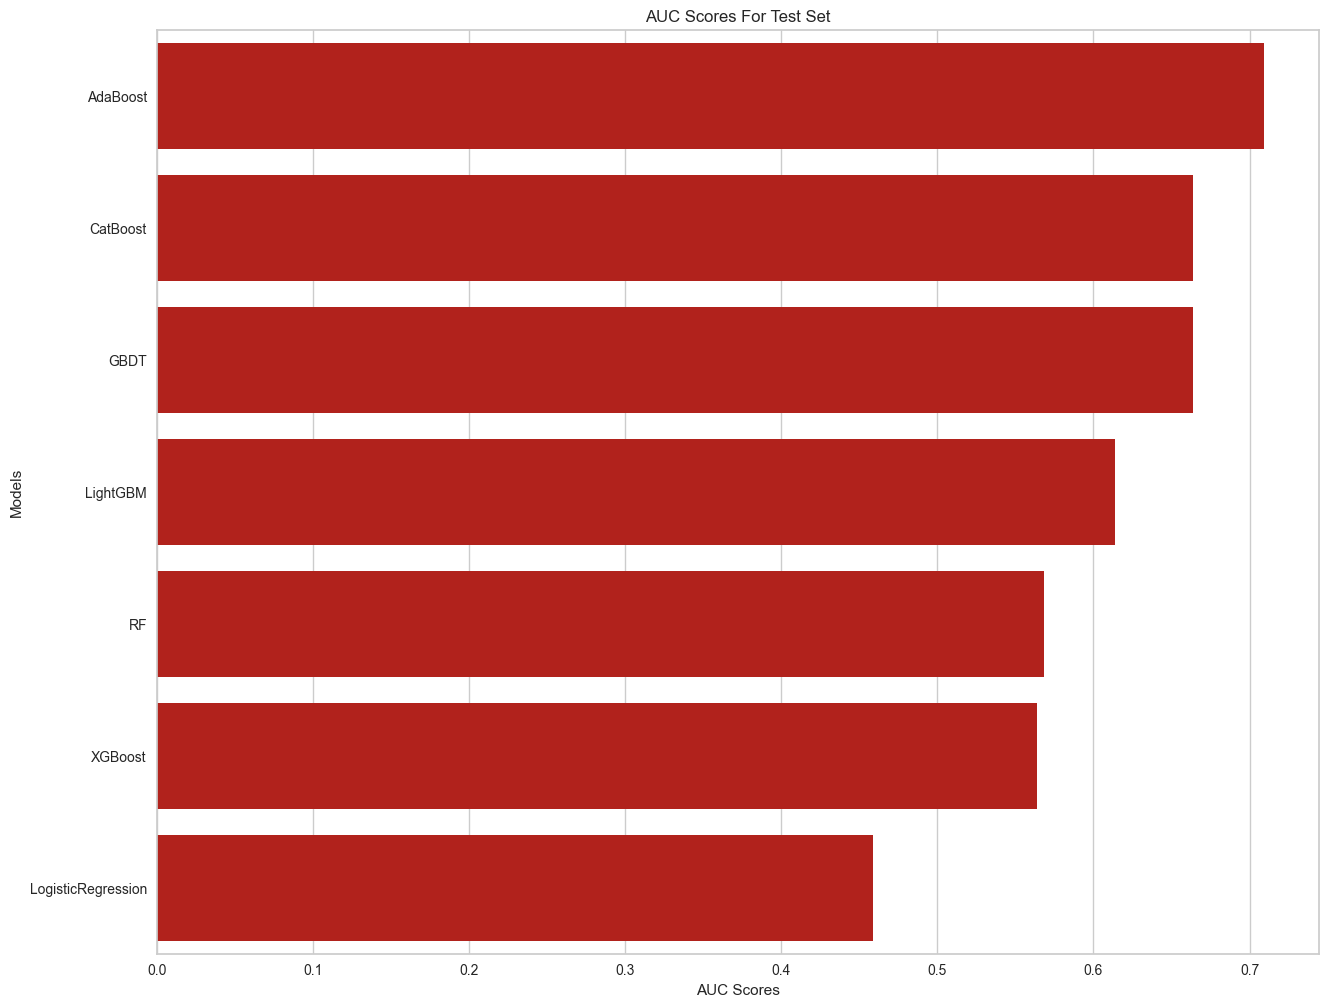

In [118]:
# Comparison of tuned models
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix
tuned_models = [
    ('LogisticRegression', logreg_tuned),
                ('RF', rf_tuned),
                ('XGBoost', xgb_tuned),
                ('LightGBM', lgbm_tuned),
               ('CatBoost', cb_tuned),
#                 ('SVM', svm_tuned),
                ('GBDT', gbdt_tuned),
#                 ('NGBoost', ngb_tuned),
#                 ('DT', dt_tuned),
                ('AdaBoost', adb_tuned)
               ]


evaluate_classification_model_holdout(tuned_models)

In [112]:
# Stack models
from mlxtend.classifier import StackingCVClassifier
stack_gen = StackingCVClassifier(classifiers=(logreg_tuned, rf_tuned, xgb_tuned, lgbm_tuned,cb_tuned,svm_tuned,gbdt_tuned,ngb_tuned,dt_tuned,adb_tuned), meta_classifier=xgb_tuned)
stack_gen_model = stack_gen.fit(X_train, y_train)

evaluate_classification_model_holdout([('stack model', stack_gen_model)]) # 0.890


ModuleNotFoundError: No module named 'mlxtend'

In [119]:
# Function ot blend models
def blend_models_predict(X_test):
    return ((0.05 * logreg_tuned.predict(X_test)) +
            (0.05 * dt_tuned.predict(X_test)) +
            (0.1 * gbdt_tuned.predict(X_test)) +
            (0.1 * rf_tuned.predict(X_test)) +
            (0.1 * svm_tuned.predict(X_test)) +
            (0.1 * adb_tuned.predict(X_test)) +
            (0.1 * xgb_tuned.predict(X_test)) +
            (0.1 * lgbm_tuned.predict(X_test)) +
            (0.1 * cb_tuned.predict(X_test)) +
             (0.1 * ngb_tuned.predict(X_test)) +
            (0.1 * stack_gen_model.predict(X_test)))

In [120]:
accuracy_score(y_test, blend_models_predict(X_test).round())# 0.8701298701298701
# aucroc_score(y_test, blend_models_predict(X_test).round())# 0.8701298701298701
roc_auc_score(y_test, blend_models_predict(X_test).round())

NameError: name 'dt_tuned' is not defined

In [121]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca--RF-stack73', Save_format = 'csv',Save_type = 'col')

In [122]:
# Pickle Models --> Saving tuned models

# Create a folder named 'Models'
# save working directory
#
# cur_dir = os.getcwd()
# cur_dir
#
# # change working directory:
os.chdir("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/3-teston-fuscc/split/RFE-RF-GB/RF")
#
# # Save the modelsD:/fangTESTONfuscc
for model in tuned_models:
    pickle.dump(model[1], open(str(model[0]) + ".pkl", 'wb'))


In [50]:
import numpy as np
import pandas as pd
import pickle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [51]:
# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/testZscore-RFERF17-1.csv",index=None)
# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/testZscore-RFEGB8.csv",index=None)
# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/testZscore-RFERF17-42.csv",index=None)

PATHDATA1 = "C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/3-teston-fuscc/split/ExternalTest-FS-ZSCORE-MI-RF.csv"
external_test=pd.read_csv(PATHDATA1)
external_test_label = external_test.label
# print(external_test_label)
external_test=external_test.drop(columns=['label'])


In [52]:
OSPath = "C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/3-teston-fuscc/split"

In [123]:
######CatBoost  测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/RF/CatBoost.pkl'
finalpkl =  OSPath + pathpkl
cgb = pickle.load(open(finalpkl, 'rb'))
external_test_pred=cgb.predict(external_test)
path = '/RFE-RF-GB/ex-test-cgb-RF-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# cgb = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/CatBoost.pkl', 'rb'))

# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-cgb-RFERF19-73.csv', external_test_pred, delimiter = ',')

auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR E19", "EGFR E21"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)


              precision    recall  f1-score   support

   EGFR Wild       0.53      0.55      0.54        31
EGFR Mutated       0.50      0.48      0.49        29

    accuracy                           0.52        60
   macro avg       0.52      0.52      0.52        60
weighted avg       0.52      0.52      0.52        60

precision 0.5 accuracy 0.5166666666666667 recall 0.4827586206896552 auc 0.5155728587319244


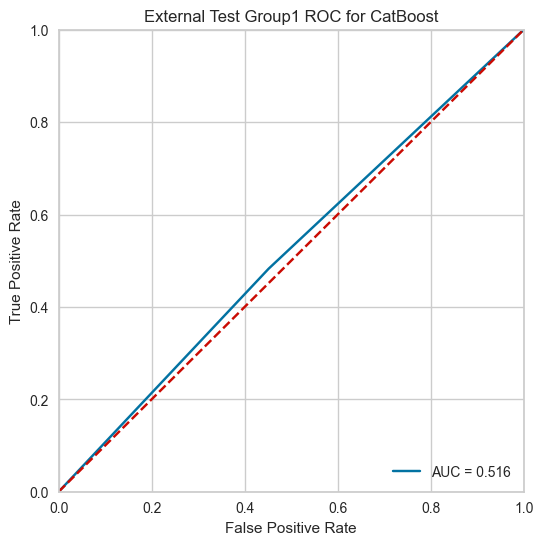

In [124]:
######CatBoost  测试集1
#############画图部分
# from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
import pylab as plt
import warnings;warnings.filterwarnings('ignore')
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for CatBoost')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [125]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[17 14]
 [15 14]]
Normalized confusion matrix
[[0.55 0.45]
 [0.52 0.48]]


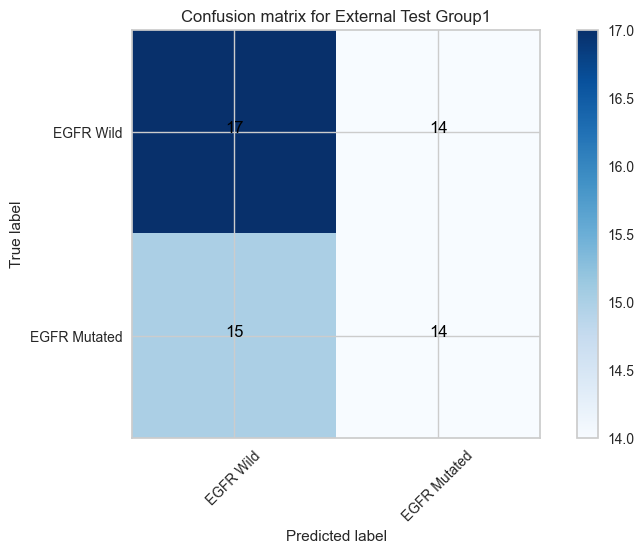

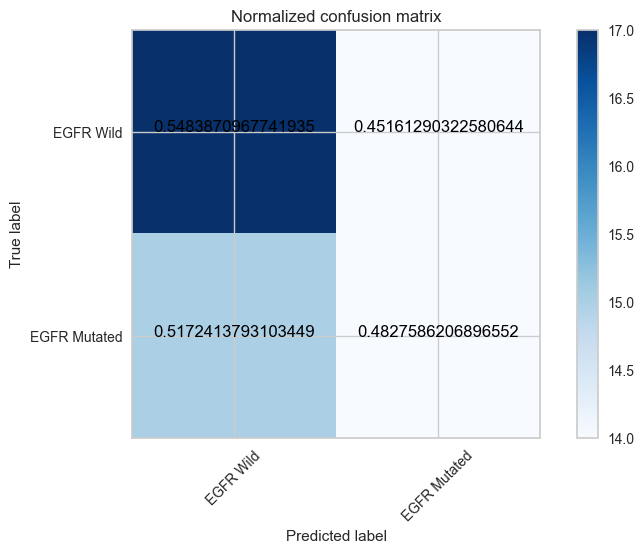

In [126]:
######CatBoost  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [79]:
######adaboost  测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/RF/AdaBoost.pkl'
finalpkl =  OSPath + pathpkl
adb = pickle.load(open(finalpkl, 'rb'))
external_test_pred=adb.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-adb-RF-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')


# adb = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/AdaBoost.pkl', 'rb'))
# external_test_pred=adb.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-adb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR E19", "EGFR E21"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)


              precision    recall  f1-score   support

   EGFR Wild       0.48      0.77      0.59        31
EGFR Mutated       0.30      0.10      0.15        29

    accuracy                           0.45        60
   macro avg       0.39      0.44      0.37        60
weighted avg       0.39      0.45      0.38        60

precision 0.3 accuracy 0.45 recall 0.10344827586206896 auc 0.43882091212458285


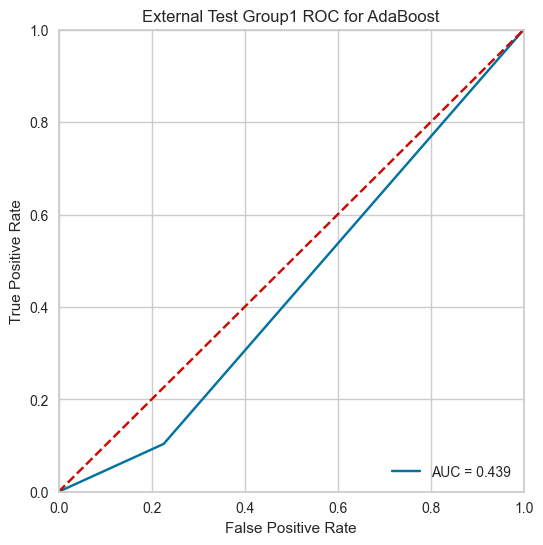

In [80]:
######adaboost  测试集1
#############画图部分
# from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
import pylab as plt
import warnings;warnings.filterwarnings('ignore')
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for AdaBoost')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [81]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[24  7]
 [26  3]]
Normalized confusion matrix
[[0.77 0.23]
 [0.9  0.1 ]]


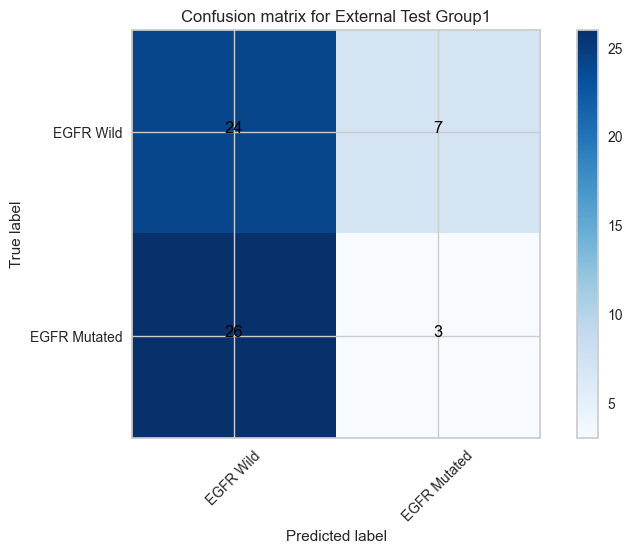

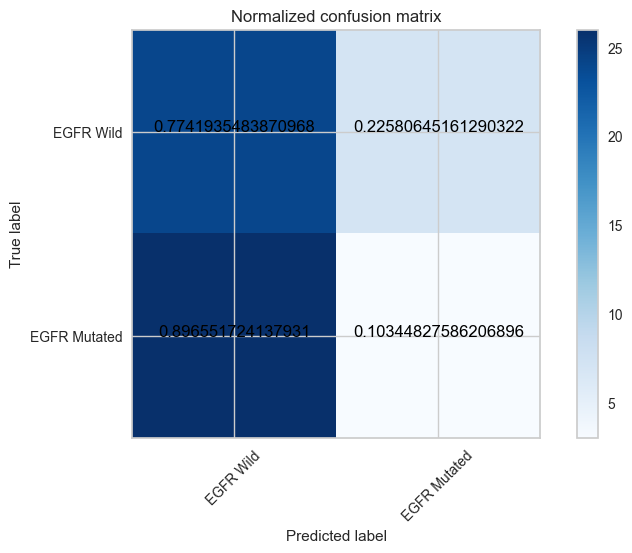

In [82]:
######adaboost  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [83]:
######XGB  测试集1
import numpy as np
import pickle
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances

# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/RF/XGBoost.pkl'
finalpkl =  OSPath + pathpkl
xgb = pickle.load(open(finalpkl, 'rb'))
external_test_pred=xgb.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-xgb-RF-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')


# xgb = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/XGBoost.pkl', 'rb'))
# external_test_pred=xgb.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-xgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='macro', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="macro", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR E19", "EGFR E21"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)
# precision 0.625 accuracy 0.6349206349206349 recall 0.7575757575757576 auc 0.6287878787878788
# precision    recall  f1-score   support

#     EGFR_E19       0.65      0.50      0.57        30
#     EGFR_E21       0.62      0.76      0.68        33

#     accuracy                           0.63        63
#    macro avg       0.64      0.63      0.63        63
# weighted avg       0.64      0.63      0.63        63


              precision    recall  f1-score   support

   EGFR Wild       0.57      0.65      0.61        31
EGFR Mutated       0.56      0.48      0.52        29

    accuracy                           0.57        60
   macro avg       0.57      0.56      0.56        60
weighted avg       0.57      0.57      0.56        60

precision 0.5657142857142857 accuracy 0.5666666666666667 recall 0.5639599555061179 auc 0.5639599555061179


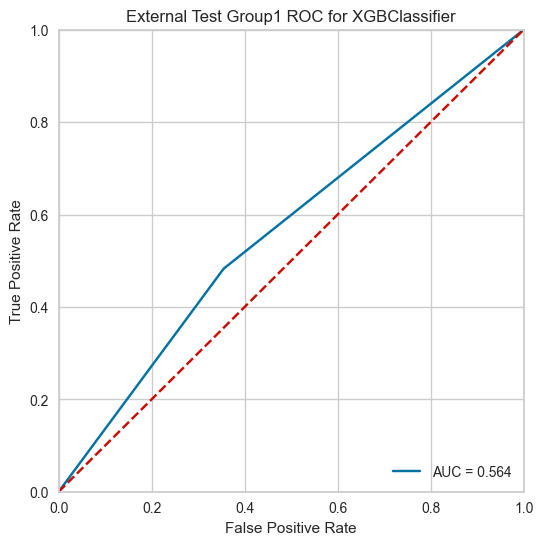

In [84]:
######XGB  测试集1
#############画图部分
# from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
import pylab as plt
import warnings;warnings.filterwarnings('ignore')
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for XGBClassifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [85]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[20 11]
 [15 14]]
Normalized confusion matrix
[[0.65 0.35]
 [0.52 0.48]]


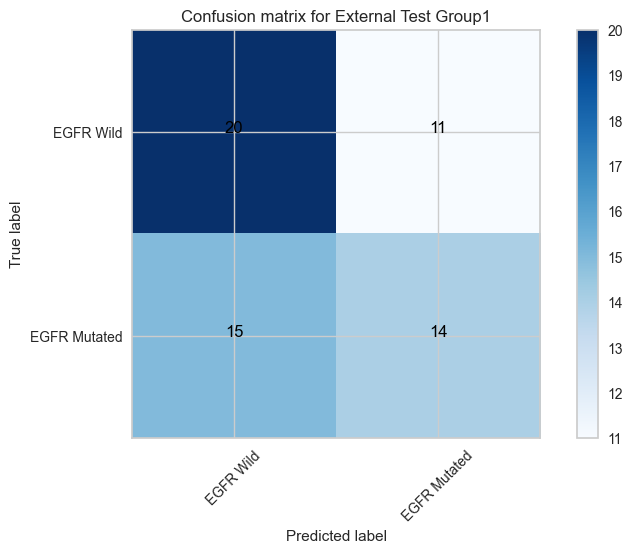

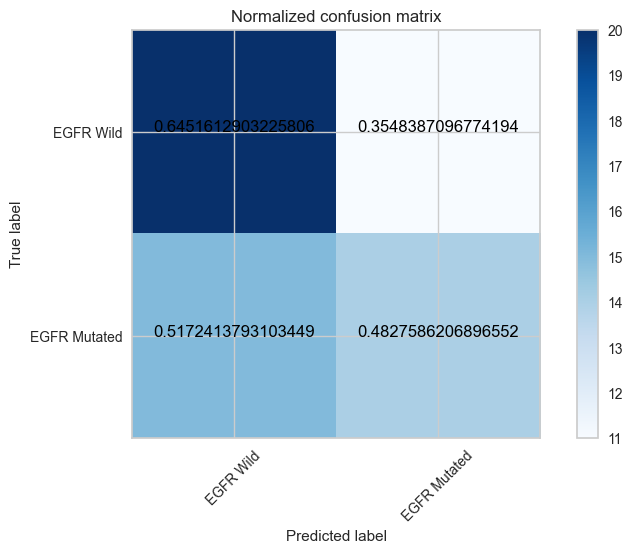

In [86]:
######XGB  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [87]:
#####RF  测试集1
import numpy as np
# # Load the model that we saved before
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/RF/RF.pkl'
finalpkl =  OSPath + pathpkl
rft = pickle.load(open(finalpkl, 'rb'))
external_test_pred=rft.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-RF-RF-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# rft = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/RF.pkl', 'rb'))
# external_test_pred=rft.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-RF-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR E19", "EGFR E21"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.53      0.55      0.54        31
EGFR Mutated       0.50      0.48      0.49        29

    accuracy                           0.52        60
   macro avg       0.52      0.52      0.52        60
weighted avg       0.52      0.52      0.52        60

precision 0.5 accuracy 0.5166666666666667 recall 0.4827586206896552 auc 0.5155728587319244


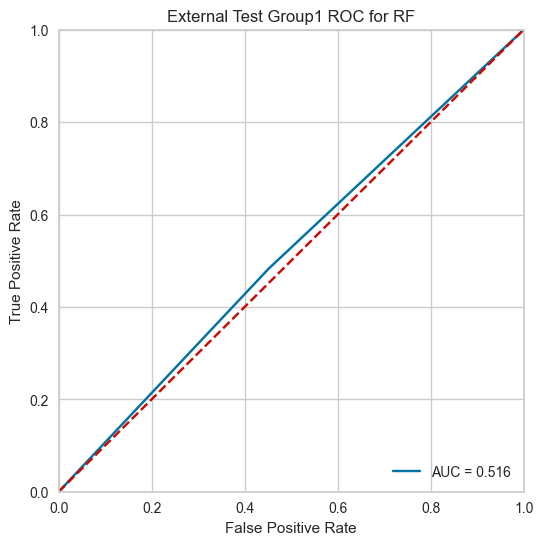

In [88]:
#####RF  测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[17 14]
 [15 14]]
Normalized confusion matrix
[[0.55 0.45]
 [0.52 0.48]]


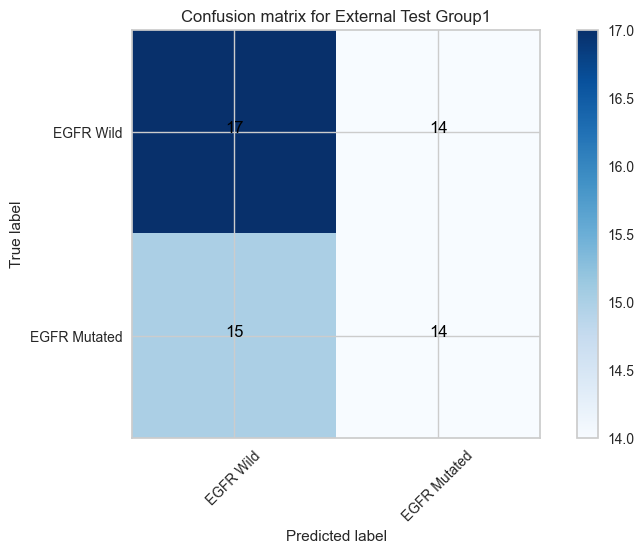

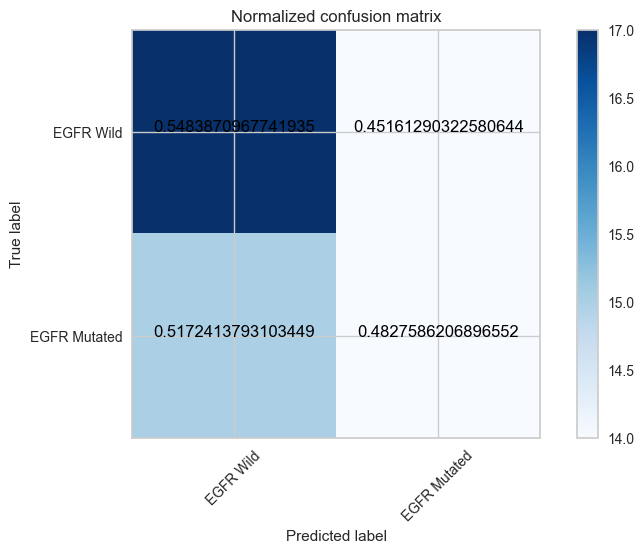

In [89]:
#####RF  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [90]:
######LR 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/RF/LogisticRegression.pkl'
finalpkl =  OSPath + pathpkl
lrt = pickle.load(open(finalpkl, 'rb'))
external_test_pred=lrt.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-lr-RF-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# lrt = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LogisticRegression.pkl', 'rb'))
# external_test_pred=lrt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lr-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR E19", "EGFR E21"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)


              precision    recall  f1-score   support

   EGFR Wild       0.53      0.65      0.58        31
EGFR Mutated       0.50      0.38      0.43        29

    accuracy                           0.52        60
   macro avg       0.51      0.51      0.51        60
weighted avg       0.51      0.52      0.51        60

precision 0.5 accuracy 0.5166666666666667 recall 0.3793103448275862 auc 0.5122358175750834


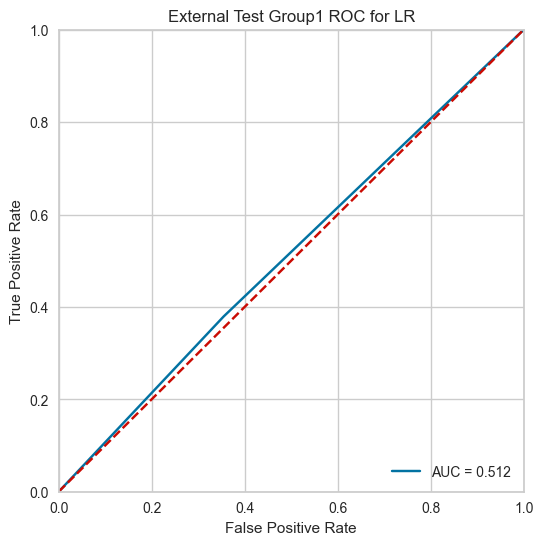

In [91]:
######LR 测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for LR')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[20 11]
 [18 11]]
Normalized confusion matrix
[[0.65 0.35]
 [0.62 0.38]]


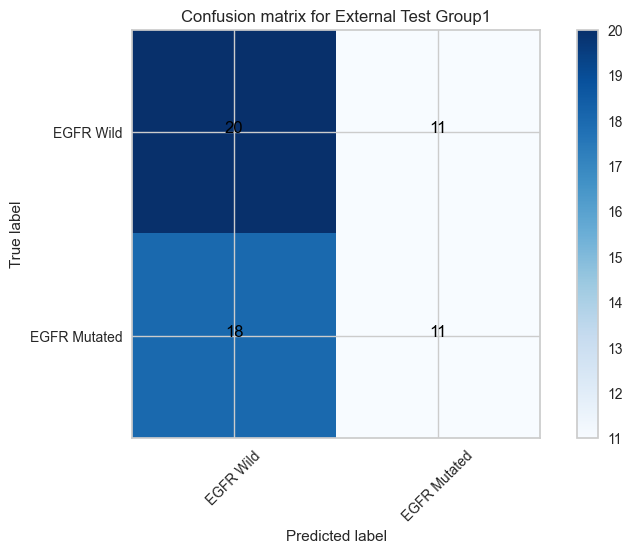

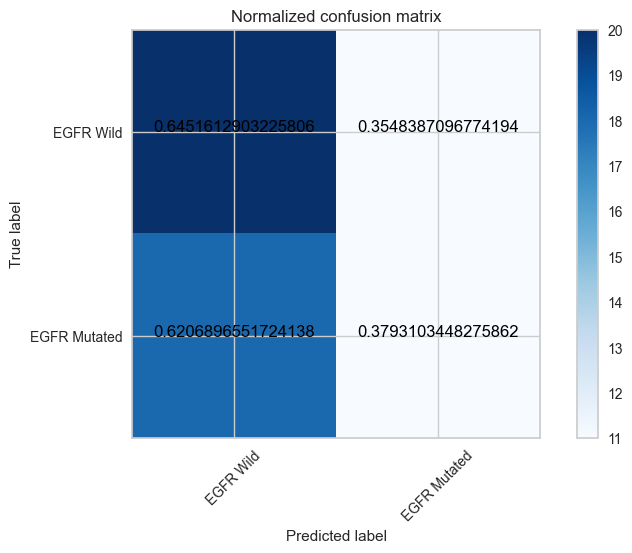

In [92]:
#####LR  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [99]:
##GBDT 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/RF/GBDT.pkl'
finalpkl =  OSPath + pathpkl
GBDT = pickle.load(open(finalpkl, 'rb'))
external_test_pred=GBDT.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-GBDT-RF-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# svm = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LightGBM.pkl', 'rb'))
# external_test_pred=lgbt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR E19", "EGFR E21"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.48      0.48      0.48        31
EGFR Mutated       0.45      0.45      0.45        29

    accuracy                           0.47        60
   macro avg       0.47      0.47      0.47        60
weighted avg       0.47      0.47      0.47        60

precision 0.4482758620689655 accuracy 0.4666666666666667 recall 0.4482758620689655 auc 0.4660734149054505


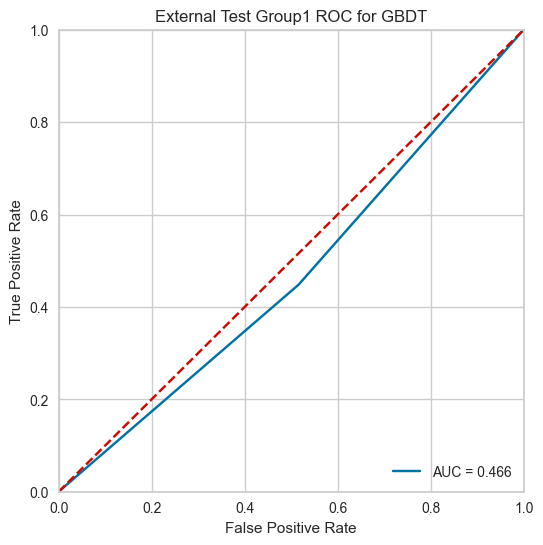

In [100]:
##GBDT 测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for GBDT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[15 16]
 [16 13]]
Normalized confusion matrix
[[0.48 0.52]
 [0.55 0.45]]


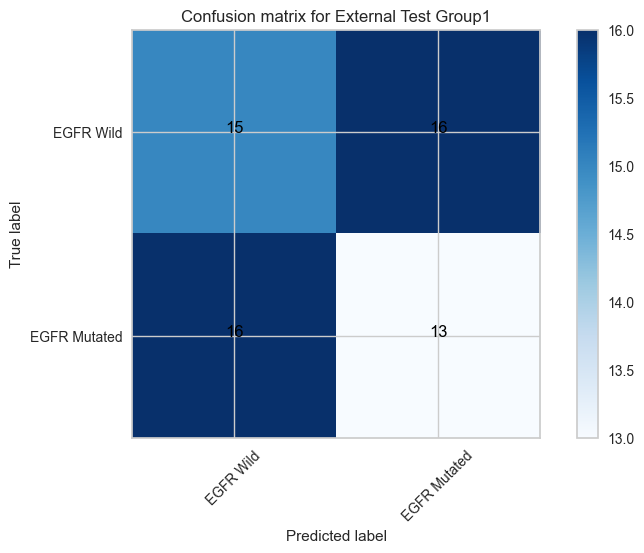

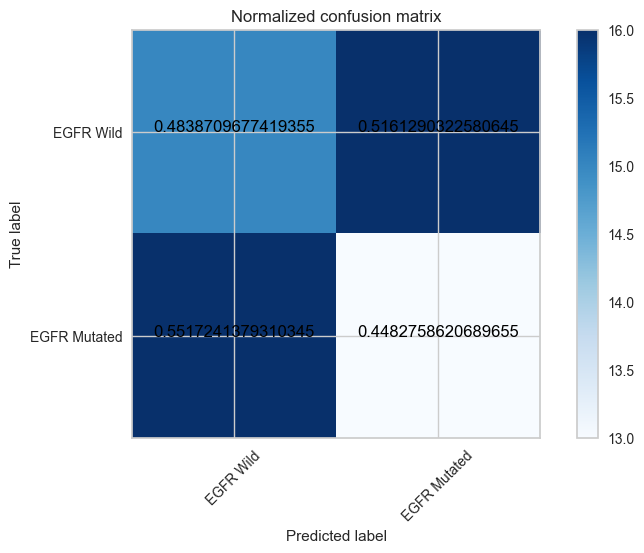

In [101]:
##GBDT 测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [105]:
##lgb 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/RF/LightGBM.pkl'
finalpkl =  OSPath + pathpkl
lgbt = pickle.load(open(finalpkl, 'rb'))
external_test_pred=lgbt.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-lgb-RF-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# lgbt = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LightGBM.pkl', 'rb'))
# external_test_pred=lgbt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR E19", "EGFR E21"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.62      0.65      0.63        31
EGFR Mutated       0.61      0.59      0.60        29

    accuracy                           0.62        60
   macro avg       0.62      0.62      0.62        60
weighted avg       0.62      0.62      0.62        60

precision 0.6071428571428571 accuracy 0.6166666666666667 recall 0.5862068965517241 auc 0.6156840934371524


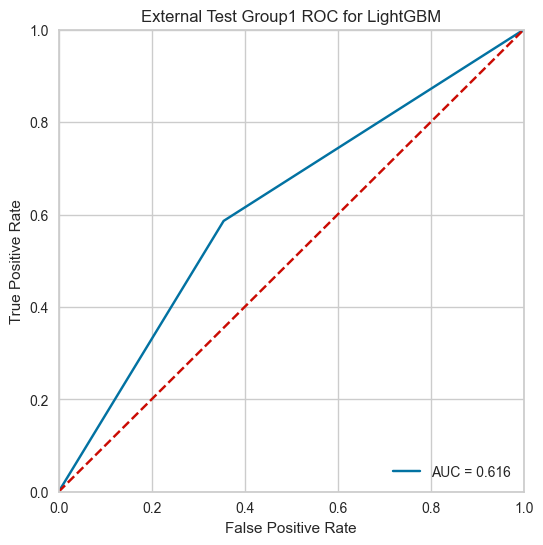

In [106]:
##lgb 测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for LightGBM')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[20 11]
 [12 17]]
Normalized confusion matrix
[[0.65 0.35]
 [0.41 0.59]]


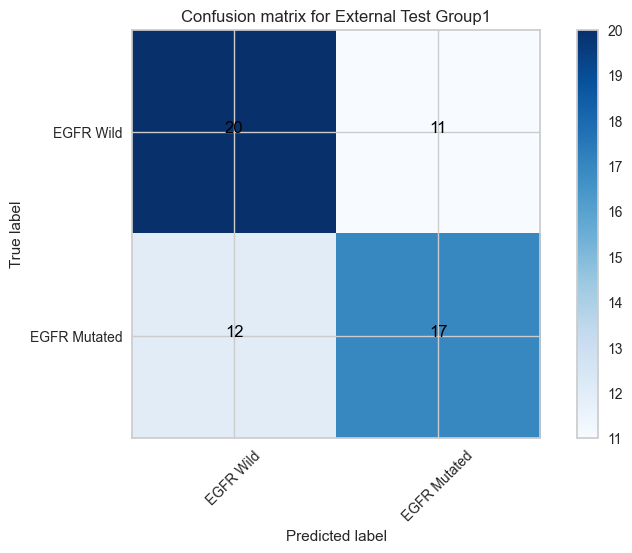

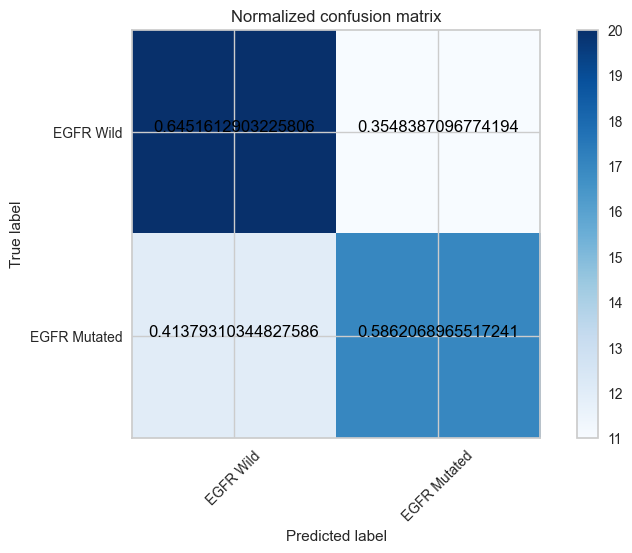

In [107]:
##lgb 测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()